#### The first step is to download the NOAA data and weather events data from the NOAA website, we are using below code to scrape the file names from the NOAA website and then downloading the files.

In [1]:
import requests
import os
import re
from urllib.parse import urljoin

# Base URL of the NOAA directory
BASE_URL = "https://www.ncei.noaa.gov/pub/data/swdi/stormevents/csvfiles/"

# Folder to save files
SAVE_DIR = "storm_data_csv_gz"
os.makedirs(SAVE_DIR, exist_ok=True)

# Fetch the HTML content
response = requests.get(BASE_URL)
response.raise_for_status()
html = response.text

# Use regex to extract all .csv.gz filenames
file_pattern = re.compile(r'href="(StormEvents_.*?\.csv\.gz)"')
file_list = file_pattern.findall(html)

print(f"Found {len(file_list)} .csv.gz files to download.")

# Download files
for i, filename in enumerate(file_list, start=1):
    file_url = urljoin(BASE_URL, filename)
    save_path = os.path.join(SAVE_DIR, filename)
    print(f"[{i}/{len(file_list)}] Downloading {filename}...")
    
    with requests.get(file_url, stream=True) as r:
        r.raise_for_status()
        with open(save_path, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192):
                f.write(chunk)

print("✅ All files downloaded successfully.")


Found 225 .csv.gz files to download.
[1/225] Downloading StormEvents_details-ftp_v1.0_d1950_c20250401.csv.gz...
[2/225] Downloading StormEvents_details-ftp_v1.0_d1951_c20250401.csv.gz...
[3/225] Downloading StormEvents_details-ftp_v1.0_d1952_c20250401.csv.gz...
[4/225] Downloading StormEvents_details-ftp_v1.0_d1953_c20250401.csv.gz...
[5/225] Downloading StormEvents_details-ftp_v1.0_d1954_c20250401.csv.gz...
[6/225] Downloading StormEvents_details-ftp_v1.0_d1955_c20250401.csv.gz...
[7/225] Downloading StormEvents_details-ftp_v1.0_d1956_c20250401.csv.gz...
[8/225] Downloading StormEvents_details-ftp_v1.0_d1957_c20250401.csv.gz...
[9/225] Downloading StormEvents_details-ftp_v1.0_d1958_c20250401.csv.gz...
[10/225] Downloading StormEvents_details-ftp_v1.0_d1959_c20250401.csv.gz...
[11/225] Downloading StormEvents_details-ftp_v1.0_d1960_c20250401.csv.gz...
[12/225] Downloading StormEvents_details-ftp_v1.0_d1961_c20250401.csv.gz...
[13/225] Downloading StormEvents_details-ftp_v1.0_d1962_c202

## Combining All data

In [1]:
import os
import gzip
import pandas as pd

# Define folder path where the files are stored
folder_path = "C:\Personal\Capstone final\storm_data_csv_gz"

# Function to read compressed CSV files
def read_gz_csv(file_path):
    with gzip.open(file_path, "rt") as f:
        return pd.read_csv(f, low_memory=False)

# Lists to store data
details_list = []
locations_list = []
fatalities_list = []

# Read each file and append to corresponding list
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)
    
    if "details" in file:
        df = read_gz_csv(file_path)
        df.columns = df.columns.str.strip().str.lower()  # Standardizing column names
        details_list.append(df)
    elif "locations" in file:
        df = read_gz_csv(file_path)
        df.columns = df.columns.str.strip().str.lower()
        locations_list.append(df)
    elif "fatalities" in file:
        df = read_gz_csv(file_path)
        df.columns = df.columns.str.strip().str.lower()
        fatalities_list.append(df)

# Concatenate all dataframes (append)
details_df = pd.concat(details_list, ignore_index=True) if details_list else pd.DataFrame()
locations_df = pd.concat(locations_list, ignore_index=True) if locations_list else pd.DataFrame()
fatalities_df = pd.concat(fatalities_list, ignore_index=True) if fatalities_list else pd.DataFrame()

# Print column names for debugging
print("Details Columns:", details_df.columns)
print("Locations Columns:", locations_df.columns)
print("Fatalities Columns:", fatalities_df.columns)

# Ensure 'event_id' exists in all DataFrames before merging
if "event_id" not in details_df.columns:
    raise KeyError("event_id missing from details dataset")
if "event_id" not in locations_df.columns:
    raise KeyError("event_id missing from locations dataset")
if "event_id" not in fatalities_df.columns:
    raise KeyError("event_id missing from fatalities dataset")

# Merge data using event_id
merged_df = details_df.merge(locations_df, on="event_id", how="left") \
                      .merge(fatalities_df, on="event_id", how="left")

# Save final dataframe to CSV
output_file = "final_storm_data.csv"
merged_df.to_csv(output_file, index=False)

print(f"Final consolidated dataset saved as {output_file}")

C:\Users\naman\AppData\Local\Temp\ipykernel_40288\3041944712.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  locations_df = pd.concat(locations_list, ignore_index=True) if locations_list else pd.DataFrame()


Details Columns: Index(['begin_yearmonth', 'begin_day', 'begin_time', 'end_yearmonth',
       'end_day', 'end_time', 'episode_id', 'event_id', 'state', 'state_fips',
       'year', 'month_name', 'event_type', 'cz_type', 'cz_fips', 'cz_name',
       'wfo', 'begin_date_time', 'cz_timezone', 'end_date_time',
       'injuries_direct', 'injuries_indirect', 'deaths_direct',
       'deaths_indirect', 'damage_property', 'damage_crops', 'source',
       'magnitude', 'magnitude_type', 'flood_cause', 'category', 'tor_f_scale',
       'tor_length', 'tor_width', 'tor_other_wfo', 'tor_other_cz_state',
       'tor_other_cz_fips', 'tor_other_cz_name', 'begin_range',
       'begin_azimuth', 'begin_location', 'end_range', 'end_azimuth',
       'end_location', 'begin_lat', 'begin_lon', 'end_lat', 'end_lon',
       'episode_narrative', 'event_narrative', 'data_source'],
      dtype='object')
Locations Columns: Index(['yearmonth', 'episode_id', 'event_id', 'location_index', 'range',
       'azimuth', 'loca

In [2]:
import pandas as pd
storm_df = pd.read_csv("final_storm_data.csv")


import pandas as pd
import numpy as np

# Function to convert damage strings (e.g., "10.00K", "10.00M") to a numeric value
def convert_damage(damage_str):
    try:
        if pd.isnull(damage_str):
            return 0.0
        damage_str = str(damage_str).strip()
        if damage_str.endswith('K'):
            return float(damage_str[:-1]) * 1e3
        elif damage_str.endswith('M'):
            return float(damage_str[:-1]) * 1e6
        else:
            return float(damage_str)
    except Exception:
        return 0.0

# Function to categorize an event as extreme (1) or non-extreme (0)
def categorize_extreme(row):
    # Get the event type and ensure no extra spaces
    event_type = str(row.get('event_type', '')).strip()
    
    # Convert damages to numeric values
    damage_property = convert_damage(row.get('damage_property', '0.00K'))
    damage_crops = convert_damage(row.get('damage_crops', '0.00K'))
    total_damage = damage_property + damage_crops
    
    # Sum injuries and deaths from direct and indirect counts
    total_injuries = (row.get('injuries_direct', 0) or 0) + (row.get('injuries_indirect', 0) or 0)
    total_deaths = (row.get('deaths_direct', 0) or 0) + (row.get('deaths_indirect', 0) or 0)
    
    # Set default thresholds (adjust these based on your domain knowledge)
    damage_threshold = 60000       # Example: $100K damage threshold
    injury_threshold = 10           # Example: 20 or more injuries
    death_threshold = 5             # Example: 5 or more deaths
    wind_speed_threshold = 50       # Wind speed in knots for extreme wind events
    hail_size_threshold = 1.5       # Hail size in inches considered extreme
    
    # Overall impact: if damage, injuries, or deaths exceed thresholds, mark as extreme.
    if total_damage >= damage_threshold or total_injuries >= injury_threshold or total_deaths >= death_threshold:
        return 1
    
    # Specific rules per event type
    if event_type == 'Tornado':
        # Use the Enhanced Fujita Scale: EF2 or higher is considered extreme.
        tor_scale = str(row.get('tor_f_scale', 'EF0')).strip()
        try:
            scale_value = int(tor_scale.replace('EF', ''))
        except Exception:
            scale_value = 0
        if scale_value >= 2:
            return 1

    if event_type in ['Thunderstorm Wind', 'High Wind', 'Strong Wind', 'Marine Thunderstorm Wind']:
        # For wind events, use the magnitude (assumed to be in knots)
        try:
            magnitude = float(row.get('magnitude', 0))
        except Exception:
            magnitude = 0
        if magnitude >= wind_speed_threshold:
            return 1

    if event_type == 'Hail':
        # For hail events, use the magnitude (assumed to be in inches)
        try:
            magnitude = float(row.get('magnitude', 0))
        except Exception:
            magnitude = 0
        if magnitude >= hail_size_threshold:
            return 1

    if event_type in ['Flash Flood', 'Flood', 'Coastal Flood']:
        # Flood events may be extreme if they cause high damage (already checked above) 
        if total_damage >= damage_threshold:
            return 1

    if event_type in ['Heavy Rain', 'Excessive Heat', 'Heat']:
        # These events may be extreme if they result in significant injuries or damage.
        if total_injuries >= injury_threshold or total_damage >= damage_threshold:
            return 1

    if event_type in ['Winter Storm', 'Winter Weather', 'Blizzard']:
        # Winter events are flagged based on impact
        if total_damage >= damage_threshold or total_injuries >= injury_threshold:
            return 1

    # Additional event-specific rules can be added here

    # If none of the conditions are met, mark as non-extreme.
    return 0

# Load your consolidated dataset (ensure that column names are standardized, e.g., lower-case and stripped)
df = pd.read_csv("final_storm_data.csv")
df.columns = df.columns.str.strip().str.lower()  # e.g., converting "Event_Type" to "event_type"

# Apply the categorization function to each row in the DataFrame
df['extreme'] = df.apply(categorize_extreme, axis=1)

# Save the updated DataFrame with the extreme flag to a new CSV file
output_file = "final_storm_data_with_extreme_flag.csv"
df.to_csv(output_file, index=False)

print(f"Categorization complete. Saved final file as '{output_file}'.")


C:\Users\naman\AppData\Local\Temp\ipykernel_40288\2182375256.py:2: DtypeWarning: Columns (16,25,26,28,29,34,35,37,39,40,42,43,48,49,55,56,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  storm_df = pd.read_csv("final_storm_data.csv")
C:\Users\naman\AppData\Local\Temp\ipykernel_40288\2182375256.py:98: DtypeWarning: Columns (16,25,26,28,29,34,35,37,39,40,42,43,48,49,55,56,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_storm_data.csv")


Categorization complete. Saved final file as 'final_storm_data_with_extreme_flag.csv'.


## Getting only last few years data and fixing date time

In [3]:
import pandas as pd
from datetime import datetime
import pytz

# Load and filter dataset
final_extreme_event_dataset = pd.read_csv("final_storm_data_with_extreme_flag.csv")
filtered_df = final_extreme_event_dataset[
    final_extreme_event_dataset["year"].isin([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
]
filtered_df.drop(columns=[
    "episode_id_x", "event_id", "state_fips", "cz_type", "cz_fips", "cz_name", "wfo",
    "source", "tor_other_wfo", "tor_other_cz_state", "tor_other_cz_fips", "tor_other_cz_name",
    "episode_narrative", "event_narrative", "data_source", "episode_id_y", "azimuth"
], inplace=True)
filtered_df = filtered_df[[
    "begin_day", "begin_time", "end_day", "end_time", "event_type",
    "begin_date_time", "cz_timezone", "end_date_time",
    "begin_lat", "begin_lon", "end_lat", "end_lon", "extreme"
]]
filtered_df.dropna(inplace=True)
filtered_df.drop(columns=["begin_day", "begin_time", "end_day", "end_time"], inplace=True)

# Timezone conversion setup
timezone_offsets = {
    'CST-6': -6,
    'EST-5': -5,
    'MST-7': -7,
    'PST-8': -8,
    'AST-4': -4,
    'HST-10': -10,
    'AKST-9': -9,
    'SST-11': -11,
    'GST10': 10
}

# Function to convert local time to UTC
def convert_to_utc(local_time_str, timezone):
    try:
        local_time = datetime.strptime(local_time_str, '%d-%b-%y %H:%M:%S')
        offset = timezone_offsets.get(timezone, 0)
        local_time = local_time.replace(tzinfo=pytz.FixedOffset(offset * 60))
        return local_time.astimezone(pytz.utc)
    except Exception as e:
        print(f"Failed to convert: {local_time_str} | Timezone: {timezone} | Error: {e}")
        return pd.NaT

# Apply UTC conversion
df = filtered_df.copy()
df['begin_date_time_utc'] = df.apply(lambda row: convert_to_utc(row['begin_date_time'], row['cz_timezone']), axis=1)
df['end_date_time_utc'] = df.apply(lambda row: convert_to_utc(row['end_date_time'], row['cz_timezone']), axis=1)

# Drop any rows where UTC conversion failed
df.dropna(subset=['begin_date_time_utc', 'end_date_time_utc'], inplace=True)

# Split into date and time components
df['begin_date_utc'] = df['begin_date_time_utc'].dt.date
df['begin_time_utc'] = df['begin_date_time_utc'].dt.time
df['end_date_utc'] = df['end_date_time_utc'].dt.date
df['end_time_utc'] = df['end_date_time_utc'].dt.time

# Drop original local time and intermediate UTC datetime columns
df.drop(columns=[
    'begin_date_time', 'end_date_time',
    'begin_date_time_utc', 'end_date_time_utc',
    'cz_timezone'
], inplace=True)

# Define a 120-minute threshold
time_threshold = pd.Timedelta(minutes=120)

# Calculate duration for filtering
df['duration'] = pd.to_datetime(df['end_date_utc'].astype(str) + ' ' + df['end_time_utc'].astype(str)) - \
                 pd.to_datetime(df['begin_date_utc'].astype(str) + ' ' + df['begin_time_utc'].astype(str))

filtered_df = df[df['duration'] > time_threshold].copy()

# Count instantaneous events (0 duration)
same_time_count = df[df['duration'] == pd.Timedelta(0)].shape[0]

# Final cleanup
filtered_df.drop(columns=["duration"], inplace=True)
filtered_df.drop_duplicates(inplace=True)

# Output
print("Filtered events (lasting more than 120 minutes):")
print(filtered_df)
print("\nNumber of rows with identical start and end times on the same day:", same_time_count)


C:\Users\naman\AppData\Local\Temp\ipykernel_40288\1900491375.py:6: DtypeWarning: Columns (16,25,26,28,29,34,35,37,39,40,42,43,48,49,55,56,68,69) have mixed types. Specify dtype option on import or set low_memory=False.
  final_extreme_event_dataset = pd.read_csv("final_storm_data_with_extreme_flag.csv")
C:\Users\naman\AppData\Local\Temp\ipykernel_40288\1900491375.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=[


Filtered events (lasting more than 120 minutes):
          event_type  begin_lat  begin_lon  end_lat   end_lon  extreme  \
1255216        Flood    36.8800   -94.9759  36.9704  -95.0323        0   
1255381        Flood    41.4608   -79.6989  41.4757  -79.6440        0   
1255715  Flash Flood    34.2446  -112.3318  34.2693 -112.2072        0   
1255827  Flash Flood    33.8790  -109.1300  33.8602 -109.1423        0   
1255848  Flash Flood    39.4878   -79.1745  39.5067  -79.1567        0   
...              ...        ...        ...      ...       ...      ...   
2037770        Flood    39.0043   -92.7851  39.0087  -92.8045        0   
2037775        Flood    39.2161   -92.6450  39.1786  -92.6467        0   
2037779        Flood    39.8730   -92.6298  39.9000  -92.6500        0   
2037788        Flood    39.3739   -92.7749  39.3429  -92.7767        0   
2037792        Flood    39.1500   -92.5400  39.1454  -92.5341        0   

        begin_date_utc begin_time_utc end_date_utc end_time_ut

<Axes: title={'center': 'Extreme Event Count'}, xlabel='extreme'>

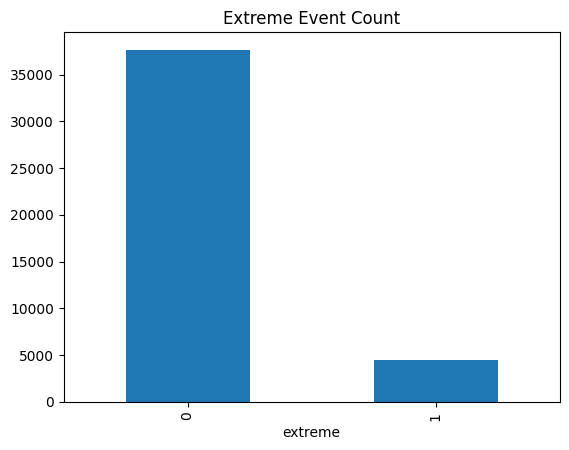

In [4]:
filtered_df["extreme"].value_counts().plot(kind="bar", title="Extreme Event Count")

In [5]:
# Define grid size based on satellite resolution
import pandas as pd
import numpy as np
GRID_SIZE = 0.02  # approximately 2km in decimal degrees
filtered_df['begin_date_time'] = pd.to_datetime(filtered_df['begin_date_utc'].astype(str) + ' ' + filtered_df['begin_time_utc'].astype(str))
filtered_df['end_date_time'] = pd.to_datetime(filtered_df['end_date_utc'].astype(str) + ' ' + filtered_df['end_time_utc'].astype(str))

# Round coordinates to match satellite data resolution
filtered_df['begin_lat'] = np.round(filtered_df['begin_lat'] / GRID_SIZE) * GRID_SIZE
filtered_df['begin_lon'] = np.round(filtered_df['begin_lon'] / GRID_SIZE) * GRID_SIZE
filtered_df['end_lat'] = np.round(filtered_df['end_lat'] / GRID_SIZE) * GRID_SIZE
filtered_df['end_lon'] = np.round(filtered_df['end_lon'] / GRID_SIZE) * GRID_SIZE

# Remove duplicates based on gridded coordinates
filtered_df = filtered_df.drop_duplicates(subset=[
    'event_type',
    'begin_date_time',
    'begin_lat',
    'begin_lon',
    'end_lat',
    'end_lon'
])

In [6]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41895 entries, 1255216 to 2037792
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   event_type       41895 non-null  object        
 1   begin_lat        41895 non-null  float64       
 2   begin_lon        41895 non-null  float64       
 3   end_lat          41895 non-null  float64       
 4   end_lon          41895 non-null  float64       
 5   extreme          41895 non-null  int64         
 6   begin_date_utc   41895 non-null  object        
 7   begin_time_utc   41895 non-null  object        
 8   end_date_utc     41895 non-null  object        
 9   end_time_utc     41895 non-null  object        
 10  begin_date_time  41895 non-null  datetime64[ns]
 11  end_date_time    41895 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(5)
memory usage: 4.2+ MB


In [7]:
extreme_df = filtered_df[filtered_df["extreme"] == 1]
non_extreme_df = filtered_df[filtered_df["extreme"] == 0].sample(extreme_df.shape[0], random_state=42)
filtered_df = pd.concat([extreme_df, non_extreme_df], ignore_index=True)
filtered_df["extreme"].value_counts()

extreme
1    4429
0    4429
Name: count, dtype: int64

## K means clustering and visualization

In [8]:
from sklearn.cluster import KMeans
import folium
import numpy as np
from folium.plugins import MarkerCluster

# Extract coordinates for clustering
coordinates = filtered_df[['begin_lat', 'begin_lon']].values

# Perform KMeans clustering
kmeans = KMeans(n_clusters=50, random_state=42)
filtered_df['cluster'] = kmeans.fit_predict(coordinates)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a base map centered on the mean coordinates
center_lat = filtered_df['begin_lat'].mean()
center_lon = filtered_df['begin_lon'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=4)

# Add a MarkerCluster layer for all points
marker_cluster = MarkerCluster().add_to(m)

# Plot all points with cluster colors
colors = [f'#{hash(str(c)) % 0xFFFFFF:06x}' for c in range(50)]  # Generate unique colors

# Add individual points with cluster colors
for idx, row in filtered_df.iterrows():
    folium.CircleMarker(
        location=[row['begin_lat'], row['begin_lon']],
        radius=3,
        color=colors[row['cluster']],
        fill=True,
        popup=f"Cluster: {row['cluster']}<br>Event: {row['event_type']}"
    ).add_to(marker_cluster)

# Add cluster centers with larger markers
for i, center in enumerate(cluster_centers):
    folium.CircleMarker(
        location=[center[0], center[1]],
        radius=8,
        color='red',
        fill=True,
        popup=f'Cluster Center {i}'
    ).add_to(m)

# Save the map
m.save('weather_clusters.html')

# Print cluster statistics
print("\nCluster Statistics:")
cluster_stats = filtered_df.groupby('cluster').agg({
    'event_type': 'count',
    'begin_lat': ['mean', 'std'],
    'begin_lon': ['mean', 'std']
}).round(4)
print(cluster_stats)

c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\subp


Cluster Statistics:
        event_type begin_lat         begin_lon        
             count      mean     std      mean     std
cluster                                               
0              214   31.6250  1.0711  -89.5104  1.0708
1              198   39.4905  1.1326 -121.6637  1.4874
2              165   40.2994  0.9243  -90.4350  0.7989
3              353   41.5708  1.2848  -75.6589  0.9905
4              158   20.9763  0.8668 -157.1403  1.4816
5                3   13.4800  0.0917  144.7933  0.1332
6              304   43.4178  0.7041  -97.2039  0.9546
7               10   65.0260  2.3019 -145.1600  1.9564
8              147   18.2732  0.1608  -66.3099  0.5347
9              175   40.9064  0.7416  -82.4142  0.9648
10             215   32.7875  0.9733  -97.1148  1.1900
11             367   38.0361  1.0495  -77.1389  0.8791
12             116   33.5617  1.1247 -111.0507  1.4500
13              82   44.2720  1.7745 -114.3280  1.3461
14             209   34.7341  0.8923  -85.36

In [9]:
def get_unique_locations(filtered_df):
    """Extract unique locations and dates from events dataframe"""
    locations = filtered_df.groupby(['begin_lat', 'begin_lon']).agg({
        'begin_date_time': ['min', 'max']
    }).reset_index()
    
    locations.columns = ['lat', 'lon', 'start_date', 'end_date']
    locations['start_date'] = pd.to_datetime(locations['start_date']).dt.strftime('%Y-%m-%d')
    locations['end_date'] = pd.to_datetime(locations['end_date']).dt.strftime('%Y-%m-%d')
    
    return locations.to_dict('records')

# Get unique locations from the filtered dataset
unique_locations = get_unique_locations(filtered_df)

In [10]:
len(unique_locations)  # Number of unique locations

7755

In [11]:
filtered_df["extreme"].value_counts()  # Count of extreme vs non-extreme events

extreme
1    4429
0    4429
Name: count, dtype: int64

## Collecting open meteo data

In [ ]:
import os
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import time
import pickle
from tqdm import tqdm
import logging

# Setup logging to output errors and progress.
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Setup API client with caching and retry logic.
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)
url = "https://archive-api.open-meteo.com/v1/archive"

# Load the extreme event data.
extreme_df = filtered_df.copy()
# extreme_t = extreme_df[extreme_df['extreme'] == 1].sample(50).copy()
# non_extreme_t = extreme_df[extreme_df['extreme'] == 0].sample(extreme_t.shape[0], random_state=42).copy()
# extreme_df = pd.concat([extreme_t, non_extreme_t], ignore_index=True)

extreme_df['event_datetime'] = extreme_df["begin_date_time"]

# Define the hourly weather variables.
hourly_vars = [
    "temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature",
    "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl",
    "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high",
    "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m",
    "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm",
    "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm",
    "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm",
    "soil_moisture_100_to_255cm"
]

# Attempt to load previous progress if available
if os.path.exists("prev_weather_partial.pkl"):
    with open("prev_weather_partial.pkl", "rb") as f:
        prev_weather_list = pickle.load(f)
    logging.info(f"Resuming from checkpoint. Processed events: {len(prev_weather_list)}.")
else:
    prev_weather_list = []

failed_rows = []

def save_progress(data, filename):
    with open(filename, "wb") as f:
        pickle.dump(data, f)
    logging.info(f"Progress saved to '{filename}'.")

# Determine starting index based on previously processed rows.
start_index = len(prev_weather_list)

# Resume processing from the start_index.
for idx, row in tqdm(extreme_df.iloc[start_index:].iterrows(), total=len(extreme_df) - start_index, desc="Processing events"):
    lat = row['begin_lat']
    lon = row['begin_lon']
    event_dt = row['event_datetime']
    event_dt = pd.to_datetime(event_dt)
    if event_dt.tzinfo is None:
        event_dt = event_dt.tz_localize("UTC")
    else:
        event_dt = event_dt.tz_convert("UTC")
    start_dt = event_dt - pd.Timedelta(hours=72)

    start_dt = event_dt - pd.Timedelta(hours=72)
    start_date_str = start_dt.strftime('%Y-%m-%d')
    end_date_str = event_dt.strftime('%Y-%m-%d')
    
    params = {
        "latitude": lat,
        "longitude": lon,
        "start_date": start_date_str,
        "end_date": end_date_str,
        "hourly": hourly_vars
    }
    
    try:
        responses = openmeteo.weather_api(url, params=params)
        if not responses:
            raise ValueError("Empty response received")
        response = responses[0]

        hourly = response.Hourly()
        
        # Create a date_range from the hourly data timestamps.
        date_range = pd.date_range(
            start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
            end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
            freq=pd.Timedelta(seconds=hourly.Interval()),
            inclusive="left"
        )
        
        # Build a DataFrame from the hourly data.
        weather_data = {"date": date_range}
        for i, var in enumerate(hourly_vars):
            weather_data[var] = hourly.Variables(i).ValuesAsNumpy()
        weather_df = pd.DataFrame(weather_data)
        
        # Filter for records within the previous 72 hours.
        mask = (weather_df['date'] >= start_dt) & (weather_df['date'] < event_dt)
        history_df = weather_df.loc[mask]
        history_records = history_df.to_dict(orient="records")
        prev_weather_list.append(history_records)
        
    except Exception as e:
        failed_rows.append({
            "index": idx + start_index,  # adjust index to account for skipped rows
            "latitude": lat,
            "longitude": lon,
            "start_date": start_date_str,
            "end_date": end_date_str,
            "error": str(e)
        })
        prev_weather_list.append(None)
        logging.error(f"Error at row {idx + start_index}: {e}. Saving partial data.")
        save_progress(prev_weather_list, "prev_weather_partial.pkl")
        # time.sleep(5)
        continue
    
    # Sleep to control API call frequency.

    time.sleep(2)
    # Optionally save progress every N events.
    if (idx + start_index) % 50 == 0:
        save_progress(prev_weather_list, "prev_weather_partial.pkl")

extreme_df['prev_72h_weather'] = prev_weather_list
extreme_df.to_pickle("extreme_events_with_prev_weather.pkl")
logging.info("Final data saved to 'extreme_events_with_prev_weather.pkl'.")

if failed_rows:
    pd.DataFrame(failed_rows).to_csv("failed_rows.csv", index=False)
    logging.info("Some API calls failed. Details saved to 'failed_rows.csv'.")
else:
    logging.info("All API calls succeeded.")


2025-04-25 08:05:57,089 - INFO - Resuming from checkpoint. Processed events: 1601.
Processing events:   1%|▏         | 104/7257 [04:10<4:59:01,  2.51s/it]

In [9]:
len(extreme_df["prev_72h_weather"].iloc[0])  # Check the length of the weather data for the first event

72

#### combining all data
```python

In [8]:
extreme_df["extreme"].value_counts()  # Check the distribution of extreme events

extreme
0    4
1    1
Name: count, dtype: int64

In [2]:
import pickle


extreme_events_10001_15000 = pickle.load(open(r"C:\Personal\Capstone project\Capstone project\\extreme_events_10001_15000.pkl", "rb"))
extreme_events_15001_19448 = pickle.load(open(r"C:\Personal\Capstone project\Capstone project\\extreme_events_15001_19448.pkl", "rb"))
extreme_events_19449_20000 = pickle.load(open(r"C:\Personal\Capstone project\Capstone project\\extreme_events_19449_20000.pkl", "rb"))
extreme_events_20001_30000 = pickle.load(open(r"C:\Personal\Capstone project\Capstone project\\extreme_events_with_prev_weather (1)_20001_30000.pkl", "rb"))
extreme_events_30001_40000 = pickle.load(open(r"C:\Personal\Capstone project\Capstone project\\extreme_events_with_prev_weather (30000 - 40000).pkl", "rb"))

C:\Users\naman\AppData\Local\Temp\ipykernel_30624\741654561.py:7: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  extreme_events_20001_30000 = pickle.load(open(r"C:\Personal\Capstone project\Capstone project\\extreme_events_with_prev_weather (1)_20001_30000.pkl", "rb"))


In [3]:
import pandas as pd
import pandas as pd
import pickle

with open(r"C:\Personal\Capstone project\Capstone project\\extreme_events_with_prev_weather (1).pkl", "rb") as f:
    bhavya = pd.read_pickle(f)
final_ds = pd.concat([extreme_events_10001_15000, extreme_events_15001_19448, extreme_events_19449_20000, extreme_events_20001_30000, extreme_events_30001_40000, bhavya], ignore_index=True)

In [4]:
final_ds["extreme"].value_counts()  # Check the count of extreme events

extreme
0    31916
1     3488
Name: count, dtype: int64

## Collecting satellite data

#### Helper functions

In [4]:
from owslib.wms import WebMapService
from datetime import datetime, timedelta

def get_layer_info(layer_name, wms_url):
    wms = WebMapService(wms_url, version='1.3.0')
    layer = wms.contents[layer_name]
    
    time_info = {}
    if 'time' in layer.dimensions:
        time_dim = layer.dimensions['time']
        if time_dim['values']:
            time_range = time_dim['values'][0].split('/')
            if len(time_range) == 3:
                start_date = datetime.strptime(time_range[0], '%Y-%m-%d')
                end_date = datetime.strptime(time_range[1], '%Y-%m-%d')
                interval = time_range[2]
                
                time_info['start_date'] = start_date.strftime('%Y-%m-%d')
                time_info['end_date'] = end_date.strftime('%Y-%m-%d')
                time_info['interval'] = interval
                
                if interval == 'P1D':
                    time_info['resolution'] = 'Daily'
                elif interval == 'P1M':
                    time_info['resolution'] = 'Monthly'
                elif interval == 'PT1H':
                    time_info['resolution'] = 'Hourly'
                else:
                    time_info['resolution'] = f'Custom ({interval})'
    
    return time_info

# Example usage
wms_url = "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi"
layers = [
    "MERRA2_2m_Air_Temperature_Monthly",
    "IMERG_Precipitation_Rate",
    "MERRA2_Relative_Humidity_After_Moist_700hPa_Monthly",
    "MERRA2_Surface_Wind_Speed_Monthly",
    "MODIS_Aqua_Cloud_Fraction_Day",
    "MODIS_Terra_Aerosol",
    "MODIS_Aqua_L3_SST_Thermal_9km_Day_Monthly",
    "SMAP_L3_Passive_Enhanced_Day_Soil_Moisture",
    "MODIS_Terra_L3_NDVI_Monthly"
]

for layer_name in layers:
    info = get_layer_info(layer_name, wms_url)
    print(f"Layer: {layer_name}")
    if info:
        print(f"  Resolution: {info['resolution']}")
        print(f"  Date Range: {info['start_date']} to {info['end_date']}")
    else:
        print("  No time information available")
    print()


Layer: MERRA2_2m_Air_Temperature_Monthly
  Resolution: Monthly
  Date Range: 1980-01-01 to 2023-11-01

Layer: IMERG_Precipitation_Rate
  Resolution: Daily
  Date Range: 2000-06-01 to 2025-04-29

Layer: MERRA2_Relative_Humidity_After_Moist_700hPa_Monthly
  Resolution: Monthly
  Date Range: 1980-01-01 to 2023-11-01

Layer: MERRA2_Surface_Wind_Speed_Monthly
  Resolution: Monthly
  Date Range: 1980-01-01 to 2023-11-01

Layer: MODIS_Aqua_Cloud_Fraction_Day
  Resolution: Daily
  Date Range: 2002-07-03 to 2002-07-30

Layer: MODIS_Terra_Aerosol
  Resolution: Daily
  Date Range: 2000-02-24 to 2000-08-06

Layer: MODIS_Aqua_L3_SST_Thermal_9km_Day_Monthly
  Resolution: Monthly
  Date Range: 2002-07-01 to 2022-10-01

Layer: SMAP_L3_Passive_Enhanced_Day_Soil_Moisture
  Resolution: Daily
  Date Range: 2015-03-31 to 2015-05-12

Layer: MODIS_Terra_L3_NDVI_Monthly
  Resolution: Monthly
  Date Range: 2000-03-01 to 2025-03-01



In [5]:
from owslib.wms import WebMapService
from datetime import datetime

# Define the WMS URL
wms_url = "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi"
wms = WebMapService(wms_url, version="1.3.0")

# Define the years to check for data
years_to_check = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Function to check if daily or hourly data is available for all specified years
def check_data_availability(layer_name):
    layer = wms.contents[layer_name]
    if 'time' in layer.dimensions:
        time_dim = layer.dimensions['time']
        if time_dim['values']:
            time_range = time_dim['values'][0].split('/')
            if len(time_range) == 3:
                start_date = datetime.strptime(time_range[0][:10], '%Y-%m-%d')
                end_date = datetime.strptime(time_range[1][:10], '%Y-%m-%d')
                interval = time_range[2]
                if interval in ['P1D', 'PT1H']:  # Check if interval is daily or hourly
                    if all(start_date.year <= year <= end_date.year for year in years_to_check):
                        return interval
    return None

# Check each layer and print those with daily or hourly data for all specified years
print("Layers with daily or hourly data available for all specified years:")
for layer_name in wms.contents:
    availability = check_data_availability(layer_name)
    if availability:
        print(f"{layer_name}: {'Daily' if availability == 'P1D' else 'Hourly'}")


Layers with daily or hourly data available for all specified years:
VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11: Daily
VIIRS_SNPP_Cirrus_Reflectance_VIS_NIR: Daily
CALIPSO_Imaging_Infrared_Radiometer_Brightness_Temperature_Day_CH3: Daily
CALIPSO_Imaging_Infrared_Radiometer_Brightness_Temperature_Difference_Day_CH2_CH3: Daily
CALIPSO_Imaging_Infrared_Radiometer_Brightness_Temperature_Difference_Day_CH1_CH3: Daily
CALIPSO_Imaging_Infrared_Radiometer_Brightness_Temperature_Difference_Night_CH2_CH3: Daily
CALIPSO_Imaging_Infrared_Radiometer_Brightness_Temperature_Difference_Night_CH1_CH3: Daily
CALIPSO_Imaging_Infrared_Radiometer_Brightness_Temperature_Night_CH3: Daily
VIIRS_CrIS_SNPP_BT_Band33_Fusion_Day: Daily
VIIRS_CrIS_SNPP_BT_Band33_Fusion_Night: Daily
MOPITT_CO_Daily_Surface_Mixing_Ratio_Day: Daily
MOPITT_CO_Daily_Total_Column_Day: Daily
MOPITT_CO_Daily_Surface_Mixing_Ratio_Night: Daily
MOPITT_CO_Daily_Total_Column_Night: Daily
IMERG_Precipitation_Rate: Daily
GHRSST_L4_MUR_Sea_Ice_Concent

In [10]:
import os
import pickle
import pandas as pd
import numpy as np
from PIL import Image
import io
import requests
from datetime import datetime, timedelta
from concurrent.futures import ThreadPoolExecutor, as_completed
import multiprocessing
from tqdm import tqdm

# Load the dataset
df = extreme_df.copy()
# NASA GIBS WMS endpoint for EPSG:4326
wms_url = "https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?"

# Define relevant layers for extreme weather prediction
layers = [
    "IMERG_Precipitation_Rate",
    "VIIRS_SNPP_Ice_Surface_Temp_Day",
    "VIIRS_SNPP_Ice_Surface_Temp_Night",
    "GHRSST_L4_MUR_Sea_Surface_Temperature",
    "VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11",
    "VIIRS_SNPP_Cirrus_Reflectance_VIS_NIR",
    "CALIPSO_Imaging_Infrared_Radiometer_Brightness_Temperature_Day_CH3",
    "MODIS_Terra_CorrectedReflectance_TrueColor"
]

# Image size and output directory
img_size = (512, 512)
output_dir = "satellite_images"
os.makedirs(output_dir, exist_ok=True)
margin = 3

# Checkpoint file to track processed events
checkpoint_file = "processed_events.pkl"
if os.path.exists(checkpoint_file):
    with open(checkpoint_file, "rb") as f:
        processed_events = pickle.load(f)
else:
    processed_events = set()

def is_image_empty(img_data):
    """Check if the downloaded image is empty (all pixels are the same)."""
    img = Image.open(io.BytesIO(img_data))
    img_array = np.array(img)
    return np.all(img_array == 0) or np.all(img_array == 255)

def get_wms_image(layer, bbox, date):
    """Retrieve an image from the WMS service for a specific layer, bounding box, and date."""
    params = {
        'SERVICE': 'WMS',
        'VERSION': '1.3.0',
        'REQUEST': 'GetMap',
        'LAYERS': layer,
        'STYLES': '',
        'CRS': 'EPSG:4326',
        'BBOX': ','.join(map(str, bbox)),
        'WIDTH': img_size[0],
        'HEIGHT': img_size[1],
        'FORMAT': 'image/png',
        'TIME': date,
        'TRANSPARENT': False
    }
    response = requests.get(wms_url, params=params)
    if response.status_code == 200 and response.headers['Content-Type'] == 'image/png':
        return response.content
    else:
        return None

def process_event(idx, row, processed_events):
    """
    Process a single event row:
      - Calculate the bounding box with margin.
      - For each of 3 days (0, 1, 2 days before the event), and for each layer,
        download the image, check if it's empty, save it, and record metadata.
    """
    if idx in processed_events:
        return []  # Skip already processed events

    local_metadata = []
    # Compute the bounding box based on event coordinates
    min_lon = min(row["begin_lon"], row["end_lon"]) - margin
    max_lon = max(row["begin_lon"], row["end_lon"]) + margin
    min_lat = min(row["begin_lat"], row["end_lat"]) - margin
    max_lat = max(row["begin_lat"], row["end_lat"]) + margin
    bbox = [min_lat, min_lon, max_lat, max_lon]

    event_date = datetime.strptime(str(row['begin_date_utc']), "%Y-%m-%d").date()
    
    # Loop through the three days before the event
    for days_before in range(3):
        current_date = event_date - timedelta(days=days_before)
        date_str = current_date.strftime("%Y-%m-%d")

        for layer in layers:
            safe_event_type = row["event_type"].replace(" ", "_")
            safe_layer_name = layer.replace(" ", "_")
            filename = os.path.join(output_dir, f"event{idx}_{safe_event_type}_{safe_layer_name}_{date_str}.png")
            try:
                img_data = get_wms_image(layer, bbox, date_str)
                if img_data is None or is_image_empty(img_data):
                    continue
                with open(filename, "wb") as f:
                    f.write(img_data)
                local_metadata.append({
                    "event_id": idx,
                    "event_type": row["event_type"],
                    "layer": layer,
                    "image_filename": os.path.basename(filename),
                    "download_time": datetime.utcnow().strftime("%Y-%m-%d"),
                    "image_date": date_str,
                    "days_before_event": days_before,
                    "bbox": bbox,
                    "event_date": event_date.strftime("%Y-%m-%d")
                })
            except Exception as e:
                print(f"Error processing event {idx}, layer {layer}, date {date_str}: {e}")
                continue

    # After successfully processing the event
    processed_events.add(idx)
    with open(checkpoint_file, "wb") as f:
        pickle.dump(processed_events, f)
    
    return local_metadata

# Main execution block
all_metadata = []
num_cores = multiprocessing.cpu_count()

# Use ThreadPoolExecutor for parallel processing of events
with ThreadPoolExecutor(max_workers=num_cores) as executor:
    futures = {
        executor.submit(process_event, idx, row, processed_events): idx
        for idx, row in df.iterrows() if idx not in processed_events
    }
    for future in tqdm(as_completed(futures), total=len(futures), desc="Processing events"):
        try:
            result = future.result()
            all_metadata.extend(result)
        except Exception as exc:
            print(f"Event processing generated an exception: {exc}")

# Combine new metadata with existing metadata, if any
metadata_csv = os.path.join(output_dir, "satellite_images_metadata.csv")
if os.path.exists(metadata_csv):
    existing_metadata_df = pd.read_csv(metadata_csv)
    metadata_df = pd.DataFrame(all_metadata)
    combined_metadata_df = pd.concat([existing_metadata_df, metadata_df], ignore_index=True)
else:
    combined_metadata_df = pd.DataFrame(all_metadata)

# Save combined metadata to CSV
combined_metadata_df.to_csv(metadata_csv, index=False)
print(f"Saved metadata to {metadata_csv}")


Processing events: 100%|██████████| 100/100 [02:28<00:00,  1.49s/it]

Saved metadata to satellite_images\satellite_images_metadata.csv


## Integrating final data

In [6]:
import pandas as pd
metdata = pd.read_csv(r"C:\Personal\Capstone project\Capstone project\satellite_images\\satellite_images\\satellite_images_metadata.csv")  
metdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167993 entries, 0 to 167992
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   event_id           167993 non-null  int64 
 1   event_type         167993 non-null  object
 2   layer              167993 non-null  object
 3   image_filename     167993 non-null  object
 4   download_time      167993 non-null  object
 5   image_date         167993 non-null  object
 6   days_before_event  167993 non-null  int64 
 7   bbox               167993 non-null  object
 8   event_date         167993 non-null  object
dtypes: int64(2), object(7)
memory usage: 11.5+ MB


In [5]:
import pandas as pd

# Load the final dataset
final_df = final_ds.copy()

# Load the metadata CSV containing image filenames
metadata_df_1 = pd.read_csv(r"C:\Personal\Capstone project\Capstone project\satellite_images\\satellite_images\\satellite_images_metadata.csv")
merged_df_2 = pd.read_csv(r"C:\Personal\Capstone\satellite_images\\satellite_images_metadata.csv")
metadata_df = pd.concat([metadata_df_1, merged_df_2], ignore_index=True)
# If your final_df does not have an explicit event identifier,
# add one based on its index.
if 'event_id' not in final_df.columns:
    final_df["event_id"] = final_df.index

# Group metadata by event_id and aggregate image filenames into a list.
filenames_by_event = metadata_df.groupby("event_id")["image_filename"].apply(list).reset_index()
filenames_by_event.rename(columns={"image_filename": "filenames"}, inplace=True)
# print(filenames_by_event)
# Merge the aggregated filenames with the final dataset.
merged_df = pd.merge(final_df, filenames_by_event, on="event_id", how="left")
merged_df.head()
# # Optionally, if you don't need the event_id column, you can drop it:
# # merged_df.drop("event_id", axis=1, inplace=True)

# # Save the merged DataFrame to a new CSV
merged_df.to_csv("final_ds_with_filenames.csv", index=False)

# print("Merged dataset saved as final_ds_with_filenames.csv")


In [6]:
len(merged_df["prev_72h_weather"].iloc[0])  # Check the length of the first row's list


72

In [7]:
merged_df.dropna(inplace=True)  # Drop rows with NaN values

In [8]:
merged_df["extreme"].value_counts()  # Check the DataFrame info after dropping NaN values

extreme
0    31430
1     3432
Name: count, dtype: int64

In [9]:
extreme_df = merged_df[merged_df["extreme"] == 1]
non_extreme_df = merged_df[merged_df["extreme"] == 0].sample(int(extreme_df.shape[0]*1.3), random_state=42)
import pandas as pd
merged_df_new = pd.concat([extreme_df, non_extreme_df], ignore_index=True)
merged_df_new.to_csv("final_ds_with_filenames.csv", index=False)

In [10]:
merged_df_new["extreme"].value_counts()  # Check the distribution of extreme vs non-extreme events

extreme
0    4461
1    3432
Name: count, dtype: int64

In [16]:
import os
from tqdm import tqdm
from PIL import Image
import numpy as np
# Function to check if an image is empty (all pixels are either 0 or 255)
def is_image_empty(img_path, threshold=0.70):
    """
    Check if an image is empty or non-informative.
    Args:
        img_path: Path to the image file
        threshold: Percentage of same-colored pixels to consider image empty (0.0 to 1.0)
    Returns:
        bool: True if image is considered empty/non-informative
    """
    try:
        with Image.open(img_path) as img:
            # Convert to grayscale to simplify analysis
            gray_img = img.convert('L')
            img_array = np.array(gray_img)
            
            # Check if image is predominantly white
            white_ratio = np.sum(img_array > 250) / img_array.size
            # Check if image is predominantly black
            black_ratio = np.sum(img_array < 5) / img_array.size
            
            return white_ratio > threshold or black_ratio > threshold
            
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return True  # Consider unreadable images as empty
    
def is_image_informative(img_path, threshold=0.05):
    """
    Check if the image contains sufficient non-white (informative) content.
    
    Parameters:
    - img_path: str, path to the image file.
    - threshold: float, proportion of non-white pixels required to consider the image informative.
    
    Returns:
    - bool: True if the image is informative, False otherwise.
    """
    try:
        with Image.open(img_path) as img:
            # Convert image to grayscale
            gray_img = img.convert('L')
            img_array = np.array(gray_img)
            
            # Calculate the number of non-blank pixels (pixels that are not white)
            non_blank_pixels = np.sum(img_array < 255)  # Changed from '== 0' to '< 255'
            total_pixels = img_array.size
            
            # Calculate the proportion of non-blank pixels
            proportion_non_blank = non_blank_pixels / total_pixels
            
            # Determine if the image is informative based on the threshold
            return proportion_non_blank >= threshold
            
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return False  # Consider unreadable images as non-informative
    
# Load the final dataset
# Folder where images are stored
image_folder = r"C:\Personal\Capstone project\Capstone project\satellite_images\satellite_images"

# Iterate through all files in the folder and count empty images
informative = 0
total_image_count = 0

for filename in tqdm(os.listdir(image_folder)):
    image_path = os.path.join(image_folder, filename)
    if os.path.isfile(image_path):
        total_image_count += 1
        if is_image_empty(image_path):
            informative += 1

print(f"Total images checked: {total_image_count}")
print(f"Number of empty images: {informative}")

  8%|▊         | 14674/180101 [00:51<09:39, 285.46it/s]


KeyboardInterrupt: 

In [18]:
# Function to check if an image is empty (all pixels are either 0 or 255)
def is_image_empty(img_path, threshold=0.70):
    """
    Check if an image is empty or non-informative.
    Args:
        img_path: Path to the image file
        threshold: Percentage of same-colored pixels to consider image empty (0.0 to 1.0)
    Returns:
        bool: True if image is considered empty/non-informative
    """
    try:
        with Image.open(img_path) as img:
            # Convert to grayscale to simplify analysis
            gray_img = img.convert('L')
            img_array = np.array(gray_img)
            
            # Check if image is predominantly white
            white_ratio = np.sum(img_array > 250) / img_array.size
            # Check if image is predominantly black
            black_ratio = np.sum(img_array < 5) / img_array.size
            
            return white_ratio > threshold or black_ratio > threshold
            
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return True  # Consider unreadable images as empty

def count_empty_images_by_layer(image_folder, layers):
    """
    Count empty images for each layer in the dataset.
    
    Args:
        image_folder: Path to the folder containing images
        layers: List of layer names to analyze
    """
    # Dictionary to store counts of empty images for each layer
    empty_counts = {layer: 0 for layer in layers}
    total_counts = {layer: 0 for layer in layers}
    
    # Iterate through all images in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith('.png'):
            # Find which layer this image belongs to
            for layer in layers:
                if layer in filename:
                    img_path = os.path.join(image_folder, filename)
                    total_counts[layer] += 1
                    
                    if is_image_empty(img_path):
                        empty_counts[layer] += 1
                    break
    
    # Print results sorted by number of empty images
    print("\nEmpty Image Statistics by Layer:")
    print("-" * 50)
    sorted_layers = sorted(layers, key=lambda x: empty_counts[x], reverse=True)
    
    for layer in sorted_layers:
        if total_counts[layer] > 0:
            empty_ratio = (empty_counts[layer] / total_counts[layer]) * 100
            print(f"{layer}:")
            print(f"  Empty images: {empty_counts[layer]}/{total_counts[layer]} ({empty_ratio:.1f}%)")

# Usage
image_folder = r"C:\Personal\Capstone project\Capstone project\satellite_images\satellite_images"  # Replace with your image folder path
count_empty_images_by_layer(image_folder, layers)


Empty Image Statistics by Layer:
--------------------------------------------------
IMERG_Precipitation_Rate:
  Empty images: 8024/22517 (35.6%)


## helper function to read the data

In [11]:
import re
import pandas as pd

def func(s):
    if not isinstance(s, str):
        return []  # Return empty list for non-string inputs
    
    dict_pattern = r'\{[^}]+\}'
    dict_matches = re.findall(dict_pattern, s)
    kv_pattern = r"'([^']+)':\s([^,}]+)"
    extracted_data = []

    for dict_str in dict_matches[:]:  # Limit to first 10 dictionaries
        kv_matches = re.findall(kv_pattern, dict_str)
        extracted_dict = {key: value.strip() for key, value in kv_matches}
        extracted_data.append(extracted_dict)
    
    return extracted_data
result = []
# Read the CSV in chunks
chunk_size = 10000  # Adjust this based on your available memory
for chunk in pd.read_csv("final_ds_with_filenames.csv", chunksize=chunk_size):
    chunk["prev_72h_weather"] = chunk['prev_72h_weather'].apply(func)
    result.append(chunk)
    # Process or save the chunk here
    print("Processed chunk")
merged_df = pd.concat(result, ignore_index=True)
print("All chunks processed")


Processed chunk
All chunks processed


In [20]:
merged_df

event_type      begin_date_time cz_timezone        end_date_time  \
0     Flash Flood  2014-09-27 16:00:00       MST-7  2014-09-27 23:00:00   
1     Flash Flood  2014-09-21 12:30:00       MST-7  2014-09-21 23:30:00   
2     Flash Flood  2014-09-27 09:30:00       MST-7  2014-09-27 20:00:00   
3     Flash Flood  2014-09-09 17:40:00       CST-6  2014-09-10 05:15:00   
4     Flash Flood  2014-09-09 18:47:00       CST-6  2014-09-10 05:00:00   
...           ...                  ...         ...                  ...   
7888  Flash Flood  2019-10-01 20:00:00       CST-6  2019-10-01 22:30:00   
7889        Flood  2014-06-16 18:25:00       CST-6  2014-06-18 18:30:00   
7890  Flash Flood  2014-08-12 17:00:00       MST-7  2014-08-12 19:15:00   
7891        Flood  2020-02-13 08:00:00       EST-5  2020-02-13 13:00:00   
7892        Flood  2018-07-13 03:00:00       CST-6  2018-07-13 14:00:00   

      begin_lat  begin_lon  end_lat  end_lon  extreme begin_date_utc  \
0         39.70    -110.88    39.54  -110.92        1     2014-09-27   
1         33.56    -105.58    33.44  -104.62        1     2014-09-21   
2         37.54    -112.86    37.66  -114.04        1     2014-09-27   
3         41.50     -93.68    41.50   -93.66        1     2014-09-09   
4         40.94     -94.38    40.90   -94.38        1     2014-09-10   
...         ...        ...      ...      ...      ...            ...   
7888      43.64     -89.00    43.20   -89.00        0     2019-10-02   
7889      42.92     -96.80    42.72   -96.80        0     2014-06-17   
7890      33.50    -112.06    33.50  -112.02        0     2014-08-13   
7891      39.58     -81.46    39.58   -81.32        0     2020-02-13   
7892      43.48     -97.96    43.46   -98.12        0     2018-07-13   

     begin_time_utc end_date_utc end_time_utc  cluster start_date_72h  \
0          23:00:00   2014-09-28     06:00:00       48     2014-09-24   
1          19:30:00   2014-09-22     06:30:00       19     2014-09-18   
2          16:30:00   2014-09-28     03:00:00       48     2014-09-24   
3          23:40:00   2014-09-10     11:15:00       43     2014-09-06   
4          00:47:00   2014-09-10     11:00:00       43     2014-09-06   
...             ...          ...          ...      ...            ...   
7888       02:00:00   2019-10-02     04:30:00       33     2019-09-28   
7889       00:25:00   2014-06-19     00:30:00        9     2014-06-13   
7890       00:00:00   2014-08-13     02:15:00       26     2014-08-09   
7891       13:00:00   2020-02-13     18:00:00       18     2020-02-10   
7892       09:00:00   2018-07-13     20:00:00        9     2018-07-10   

        end_date             event_datetime  \
0     2014-09-27  2014-09-27 23:00:00+00:00   
1     2014-09-21  2014-09-21 19:30:00+00:00   
2     2014-09-27  2014-09-27 16:30:00+00:00   
3     2014-09-09  2014-09-09 23:40:00+00:00   
4     2014-09-09  2014-09-10 00:47:00+00:00   
...          ...                        ...   
7888  2019-10-01  2019-10-02 02:00:00+00:00   
7889  2014-06-16  2014-06-17 00:25:00+00:00   
7890  2014-08-12  2014-08-13 00:00:00+00:00   
7891  2020-02-13  2020-02-13 13:00:00+00:00   
7892  2018-07-13  2018-07-13 09:00:00+00:00   

                                       prev_72h_weather  event_id  \
0     [{'date': 'Timestamp('2014-09-24 23:00:00+0000...         4   
1     [{'date': 'Timestamp('2014-09-18 20:00:00+0000...        10   
2     [{'date': 'Timestamp('2014-09-24 17:00:00+0000...        12   
3     [{'date': 'Timestamp('2014-09-07 00:00:00+0000...        18   
4     [{'date': 'Timestamp('2014-09-07 01:00:00+0000...        21   
...                                                 ...       ...   
7888  [{'date': 'Timestamp('2019-09-29 02:00:00+0000...     18058   
7889  [{'date': 'Timestamp('2014-06-14 01:00:00+0000...      1480   
7890  [{'date': 'Timestamp('2014-08-10 00:00:00+0000...     31513   
7891  [{'date': 'Timestamp('2020-02-10 13:00:00+0000...      5338   
7892  [{'date': 'Timestamp('2018-07-10 0

#### Expanding the 72 hourly data

In [12]:
merged_df.dropna(inplace=True)  # Check the DataFrame info after dropping NaN values

In [13]:
def expand_weather_data(row):
    
    weather_data = row['prev_72h_weather']
    for key in weather_data[0].keys():
        if key != 'date':
            row[f'prev_72h_{key}'] = [entry[key] for entry in weather_data]
    return row

merged_df = merged_df.apply(expand_weather_data, axis=1)


#### Filtering based on empty image statistics

In [14]:
import ast

def clean_and_filter_layers(df, column_name='filename'):
    # Step 1: Convert string representation of list to actual list if needed
    def parse_if_string(x):
        if isinstance(x, str):
            try:
                return ast.literal_eval(x)
            except:
                return x
        return x
    
    # Apply parsing if the column contains string representations of lists
    df[column_name] = df[column_name].apply(parse_if_string)
    
    # Step 2: Filter for specific layers
    patterns = [
        'VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11',
        'VIIRS_SNPP_Cirrus_Reflectance_VIS_NIR',
        'MODIS_Terra_CorrectedReflectance_TrueColor'
    ]
    
    # If the column contains lists, we need to filter elements within each list
    def filter_specific_layers(file_list):
        if isinstance(file_list, list):
            return [f for f in file_list if any(pattern in f for pattern in patterns)]
        return file_list
    
    df[column_name] = df[column_name].apply(filter_specific_layers)
    
    # Remove rows where the filtered list is empty
    df = df[df[column_name].apply(lambda x: len(x) > 0 if isinstance(x, list) else True)]
    
    return df

filtered_df = clean_and_filter_layers(merged_df, column_name='filenames')

In [15]:
len(filtered_df["prev_72h_wind_direction_100m"].iloc[0])

72

In [16]:
filtered_df.info()  # Check the DataFrame info after cleaning and filtering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7893 entries, 0 to 7892
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   event_type                              7893 non-null   object 
 1   begin_date_time                         7893 non-null   object 
 2   cz_timezone                             7893 non-null   object 
 3   end_date_time                           7893 non-null   object 
 4   begin_lat                               7893 non-null   float64
 5   begin_lon                               7893 non-null   float64
 6   end_lat                                 7893 non-null   float64
 7   end_lon                                 7893 non-null   float64
 8   extreme                                 7893 non-null   int64  
 9   begin_date_utc                          7893 non-null   object 
 10  begin_time_utc                          7893 non-null   obje

In [17]:
from PIL import Image
import numpy as np
from pathlib import Path

# Function to check if an image is empty (all pixels are either 0 or 255)
def is_image_empty(img_path, threshold=0.70):
    """
    Check if an image is empty or non-informative.
    Args:
        img_path: Path to the image file
        threshold: Percentage of same-colored pixels to consider image empty (0.0 to 1.0)
    Returns:
        bool: True if image is considered empty/non-informative
    """
    try:
        with Image.open(img_path) as img:
            # Convert to grayscale to simplify analysis
            gray_img = img.convert('L')
            img_array = np.array(gray_img)
            
            # Check if image is predominantly white
            white_ratio = np.sum(img_array > 250) / img_array.size
            # Check if image is predominantly black
            black_ratio = np.sum(img_array < 5) / img_array.size
            
            return white_ratio > threshold or black_ratio > threshold
            
    except Exception as e:
        print(f"Error processing {img_path}: {e}")
        return True  # Consider unreadable images as empty

def check_and_filter_empty_images(df, base_path, column_name='filenames', threshold=0.70):
    """
    Check filtered images for emptiness and remove rows containing any empty images.
    
    Args:
        df: DataFrame containing lists of image filenames
        base_path: Base directory path where images are stored
        column_name: Name of the column containing image filenames
        threshold: Threshold for determining empty images
        
    Returns:
        DataFrame with rows removed where any image in the list is empty
    """
    def check_image_list(image_list):
        for img_name in image_list:
            img_path = Path(base_path) / img_name
            if is_image_empty(img_path, threshold):
                return False  # If any image is empty, return False
        return True  # All images are valid
    
    # Apply the check to each row and keep only rows where all images are valid
    mask = df[column_name].apply(check_image_list)
    filtered_df = df[mask]
    
    # Print statistics
    removed_count = len(df) - len(filtered_df)
    print(f"Removed {removed_count} rows containing empty images")
    print(f"Remaining rows: {len(filtered_df)}")
    
    return filtered_df

# Usage example:

In [ ]:
# # Assuming you have already filtered for the three specific layers
# base_path = "satellite_images"  # Replace with your actual path
# final_df = check_and_filter_empty_images(filtered_df, base_path)

Error processing satellite_images\event4_Flash_Flood_VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11_2014-09-27.png: [Errno 2] No such file or directory: 'satellite_images\\event4_Flash_Flood_VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11_2014-09-27.png'
Error processing satellite_images\event10_Flash_Flood_VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11_2014-09-21.png: [Errno 2] No such file or directory: 'satellite_images\\event10_Flash_Flood_VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11_2014-09-21.png'
Error processing satellite_images\event12_Flash_Flood_VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11_2014-09-27.png: [Errno 2] No such file or directory: 'satellite_images\\event12_Flash_Flood_VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11_2014-09-27.png'
Error processing satellite_images\event18_Flash_Flood_VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11_2014-09-09.png: [Errno 2] No such file or directory: 'satellite_images\\event18_Flash_Flood_VIIRS_SNPP_Cirrus_Reflectance_SWIR_M11_2014-09-09.png'
Error processing satellite_images\event21_

#### Doing statistical test

In [ ]:
# import pandas as pd
# import numpy as np
# from scipy.stats import mannwhitneyu
# import ast
# df = final_df.copy()
# # Step 1: Clean the 'prev_' columns
# def clean_prev_column(column):
#     def safe_convert(value):
#         try:
#             if isinstance(value, str):
#                 return ast.literal_eval(value)
#             elif isinstance(value, list):
#                 return value
#             else:
#                 print(f"Unexpected type: {type(value)}")
#                 return []  # Replace invalid entries with an empty list
#         except:
#             return []  # Handle any parsing errors

#     return column.apply(safe_convert)

# # Clean all columns starting with 'prev_'
# prev_columns = [col for col in df.columns if col.startswith('prev_') and col != 'prev_72h_weather']
# for col in prev_columns:
#     df[col] = clean_prev_column(df[col])

# # Step 2: Perform Mann-Whitney U test with balanced sampling
# results = {}

# for event in ['Flood', 'Heavy Rain', 'Flash Flood', 'Debris Flow']:
#     results[event] = {}
    
#     # Filter data for this event type
#     event_df = df[df['event_type'] == event]
#     extreme_event_df = event_df[event_df['extreme'] == 1]
#     non_extreme_event_df = event_df[event_df['extreme'] == 0]

#     print(extreme_df)
    
#     for col in prev_columns:
#         # Flatten lists into single arrays for comparison
#         extreme_values = np.concatenate(extreme_event_df[col].values).astype(float)
#         non_extreme_values = np.concatenate(non_extreme_event_df[col].values).astype(float)

#         # Remove NaN or invalid values from both arrays
#         extreme_values = extreme_values[~np.isnan(extreme_values)]
#         non_extreme_values = non_extreme_values[~np.isnan(non_extreme_values)]

#         # Balance sampling (sample equal sizes from both groups)
#         min_size = min(len(extreme_values), len(non_extreme_values))
#         if min_size > 0:
#             extreme_sample = np.random.choice(extreme_values, min_size, replace=False)
#             non_extreme_sample = np.random.choice(non_extreme_values, min_size, replace=False)

#             # Perform Mann-Whitney U test (use exact method when appropriate)
#             method = 'exact' if min_size < 50 else 'asymptotic'
#             stat, p_value = mannwhitneyu(extreme_sample, non_extreme_sample, alternative='two-sided', method=method)
#             results[event][col] = {
#                 'p_value': p_value,
#                 'significant': p_value < 0.05
#             }
#         else:
#             results[event][col] = {'p_value': None, 'significant': False}

# # Step 3: Display significant results clearly
# for event_type, cols in results.items():
#     print(f"\nEvent Type: {event_type}")
#     for col_name, result in cols.items():
#         if result['significant']:
#             print(f"Column: {col_name}, p-value: {result['p_value']:.4f} --> Significant difference detected")
#         else:
#             print(f"Column: {col_name}, p-value: {result['p_value']:.4f} --> No significant difference")


        event_type      begin_date_time cz_timezone        end_date_time  \
4      Flash Flood  2014-09-27 16:00:00       MST-7  2014-09-27 23:00:00   
10     Flash Flood  2014-09-21 12:30:00       MST-7  2014-09-21 23:30:00   
12     Flash Flood  2014-09-27 09:30:00       MST-7  2014-09-27 20:00:00   
18     Flash Flood  2014-09-09 17:40:00       CST-6  2014-09-10 05:15:00   
21     Flash Flood  2014-09-09 18:47:00       CST-6  2014-09-10 05:00:00   
...            ...                  ...         ...                  ...   
35100  Flash Flood  2012-08-29 21:00:00       CST-6  2012-08-30 06:00:00   
35103    Lightning  2012-08-29 17:00:00       MST-7  2012-08-31 23:59:00   
35106  Flash Flood  2012-09-11 12:00:00       PST-8  2012-09-11 17:30:00   
35108  Flash Flood  2012-08-29 21:00:00       CST-6  2012-08-30 06:00:00   
35136        Flood  2012-07-12 12:00:00       CST-6  2012-07-15 18:00:00   

       begin_lat  begin_lon  end_lat  end_lon  extreme begin_date_utc  \
4          39.

ValueError: need at least one array to concatenate

#### Trying pre trained model to extract features

In [ ]:
# import satlaspretrain_models
# import torch

# weights_manager = satlaspretrain_models.Weights()
# model = weights_manager.get_pretrained_model(model_identifier="Sentinel2_SwinB_SI_RGB", device="cpu")

# # Load the model weights onto the CPU

# model.eval()

# import torch
# from torchvision import transforms
# from PIL import Image
# import numpy as np
# import pandas as pd
# import ast
# import logging
# from tqdm.auto import tqdm
# from concurrent.futures import ThreadPoolExecutor, as_completed
# from tqdm.auto import tqdm

# tqdm.pandas()  # Registers progress_apply for pandas

# # ==========================
# # SET UP LOGGING
# # ==========================
# logging.basicConfig(level=logging.INFO,
#                     format='%(asctime)s - %(levelname)s - %(message)s')

# # ==========================
# # LOAD DATAFRAME
# # ==========================
# df = final_df.copy()
# extreme = df[df["extreme"] == 1]
# non_extreme = df[df["extreme"] == 0].sample(extreme.shape[0], random_state=42)
# df = pd.concat([extreme, non_extreme])

# def safe_literal_eval(x):
#     """Safely evaluate a string representation of a list."""
#     if isinstance(x, list):
#         return x
#     try:
#         return ast.literal_eval(x)
#     except Exception:
#         return []
# df['filenames'] = df['filenames'].apply(safe_literal_eval)

# # ==========================
# # DEFINE IMAGE TRANSFORMATIONS
# # ==========================
# preprocess = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225]),
# ])

# # ==========================
# # DEFINE THE ROW PROCESSING FUNCTION
# # ==========================
# def process_row(filenames):
#     """
#     Process a list of image filenames (for one row): load images,
#     extract features from each, and concatenate them.
#     """
#     features = []
#     for file in filenames:
#         try:
#             full_path = "satellite_images/" + file
#             image = Image.open(full_path).convert('RGB')
#             image = preprocess(image)
#             image = image.unsqueeze(0)  # Add batch dimension
#             with torch.no_grad():
#                 x = image
#                 row_features = []
#                 # Iterate over layers in your model's backbone
#                 for i, layer in enumerate(model.backbone.backbone.features):
#                     x = layer(x)
#                     if i in selected_layers:
#                         pooled_feature = torch.mean(x, dim=(2, 3))
#                         row_features.append(pooled_feature)
#                 if row_features:
#                     concatenated_features = torch.cat(row_features, dim=1)
#                     features.append(concatenated_features.squeeze(0).numpy())
#         except Exception as e:
#             logging.error(f"Error processing file {file}: {e}")
#             features.append(np.zeros(98))
#     if features:
#         return np.concatenate(features)
#     else:
#         return np.zeros(98)

# # ==========================
# # LOAD YOUR MODEL
# # ==========================
# # Make sure your model is loaded and in evaluation mode.
# # For example, using timm:
# # import timm
# # model = timm.create_model('swin_base_patch4_window7_224', pretrained=True)
# # model.eval()

# try:
#     model
# except NameError:
#     raise NameError("Model is not defined. Please load your pre-trained model before running.")

# selected_layers = [1, 3, 5]  # Adjust these indices as needed

# # ==========================
# # PARALLEL PROCESSING WITH THREADPOOL
# # ==========================
# logging.info("Starting parallel image feature extraction across rows using threads.")
# results = [None] * len(df)  # Preallocate list for ordered results

# with ThreadPoolExecutor(max_workers=8) as executor:  # Adjust max_workers if needed
#     # Submit one task per row (each row's filenames list)
#     future_to_index = {executor.submit(process_row, row): idx for idx, row in enumerate(df['filenames'])}
#     for future in tqdm(as_completed(future_to_index), total=len(future_to_index), desc="Rows processed"):
#         idx = future_to_index[future]
#         try:
#             results[idx] = future.result()
#         except Exception as e:
#             logging.error(f"Error processing row {idx}: {e}")
#             results[idx] = np.zeros(98)
            
# df['image_features'] = results
# logging.info("Completed parallel image feature extraction.")

2025-04-24 14:20:56,352 - INFO - Starting parallel image feature extraction across rows using threads.


Rows processed:   0%|          | 0/90 [00:00<?, ?it/s]

2025-04-24 14:24:47,134 - INFO - Completed parallel image feature extraction.


#### Helper function

In [18]:
import numpy as np
import ast
df = filtered_df.copy()
def safe_literal_eval(x):
    if isinstance(x, list):
        x = [float(i) for i in x]
        return x
    try:
        temp = ast.literal_eval(x)
        temp = [float(i) for i in temp]
        return temp

    except Exception as e:
        print(e, x)
        return np.nan
prev_cols = [col for col in df.columns if col.startswith('prev_') and col != 'prev_72h_weather']
for col in prev_cols:
    df[col] = df[col].apply(safe_literal_eval)



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7893 entries, 0 to 7892
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   event_type                              7893 non-null   object 
 1   begin_date_time                         7893 non-null   object 
 2   cz_timezone                             7893 non-null   object 
 3   end_date_time                           7893 non-null   object 
 4   begin_lat                               7893 non-null   float64
 5   begin_lon                               7893 non-null   float64
 6   end_lat                                 7893 non-null   float64
 7   end_lon                                 7893 non-null   float64
 8   extreme                                 7893 non-null   int64  
 9   begin_date_utc                          7893 non-null   object 
 10  begin_time_utc                          7893 non-null   obje

In [19]:
extreme_df = df[df["extreme"] == 1]
non_extreme_df = df[df["extreme"] == 0].sample(int(extreme_df.shape[0]*1.3), random_state=42)
df = pd.concat([extreme_df, non_extreme_df], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7893 entries, 0 to 7892
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype              
---  ------                                  --------------  -----              
 0   event_type                              7893 non-null   object             
 1   begin_date_time                         7893 non-null   object             
 2   cz_timezone                             7893 non-null   object             
 3   end_date_time                           7893 non-null   object             
 4   begin_lat                               7893 non-null   float64            
 5   begin_lon                               7893 non-null   float64            
 6   end_lat                                 7893 non-null   float64            
 7   end_lon                                 7893 non-null   float64            
 8   extreme                                 7893 non-null   int64              
 9

In [ ]:
# import numpy as np

# # Assuming final_df_images_features["image_features"].iloc[0] contains the string

# def apply_string_cleaning(array_str):
#     # Clean the string by removing unwanted characters
#     try:
#         print(type(array_str))
#         cleaned_str = array_str.replace('[', '').replace(']', '').replace('\n', ' ')
#         array = np.fromstring(cleaned_str, sep=' ')
#         return array
#     except Exception as e:
#         print(array_str)
# # Clean the string by removing unwanted characters
# df["image_features"] = df["image_features"].apply(apply_string_cleaning)

In [ ]:
# tqdm.pandas()
# # Expand the image features into separate columns (each feature as a column)
# def expand_features(feat_array):
#     if isinstance(feat_array, np.ndarray):
#         return pd.Series(feat_array)
#     else:
#         return pd.Series()

# df_image_features = df['image_features'].progress_apply(expand_features)
# df_image_features.columns = [f'img_feat_{i}' for i in range(df_image_features.shape[1])]

# # ==========================
# # 5. COMBINE IMAGE FEATURES WITH OTHER DATA
# # ==========================
# # Drop columns not needed for modeling
# cols_to_drop = ['event_type', 'begin_date_time', 'cz_timezone', 'end_date_time',
#                 'begin_date_utc', 'begin_time_utc', 'end_date_utc', 'end_time_utc',
#                 'start_date_72h', 'end_date', 'event_datetime', 'prev_72h_weather',
#                 'filenames', 'image_features']
# df_model = df.drop(columns=cols_to_drop, errors='ignore')

# # Concatenate the expanded image features with the rest of the data
# df_model = pd.concat([df_model, df_image_features], axis=1)

## Code for investigation

In [ ]:
# from datetime import datetime, timedelta, timezone
# import pandas as pd
# import matplotlib.pyplot as plt
# import openmeteo_requests
# import requests_cache
# from retry_requests import retry
# import numpy as np

# # ---------------------------
# # Setup caching and Open-Meteo client
# # ---------------------------
# cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
# retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
# openmeteo = openmeteo_requests.Client(session=retry_session)

# # ---------------------------
# # Load NOAA Dataset
# # ---------------------------
# # Replace 'noaa_data.csv' with the path to your NOAA dataset CSV file.
# # df = pd.read_csv("noaa_data.csv")

# # ---------------------------
# # Filter for Thunderstorm Wind events
# # ---------------------------
# extreme = df[(df["event_type"] == "Thunderstorm Wind") & (df["magnitude"] >=70)].iloc[0].to_dict()

# non_extreme = df[(df["event_type"] == "Thunderstorm Wind") & (df["magnitude"] <=5)].iloc[5].to_dict()

# # ---------------------------
# # Helper function to parse timezone from NOAA field
# # ---------------------------
# def parse_timezone(tz_str):
#     """
#     Parse a timezone string from NOAA dataset (e.g., "PST-8", "CST-6")
#     and return a datetime.timezone object.
#     """
#     # Check if tz_str contains '-' or '+'
#     if '-' in tz_str:
#         parts = tz_str.split('-')
#         offset = -abs(int(parts[1]))
#     elif '+' in tz_str:
#         parts = tz_str.split('+')
#         offset = abs(int(parts[1]))
#     else:
#         offset = 0  # default to UTC if not specified
#     return timezone(timedelta(hours=offset))

# # ---------------------------
# # Define a function to fetch weather data for an event
# # ---------------------------
# def fetch_weather_data(event):
#     """
#     Given an event dictionary, fetch weather data from Open-Meteo for the 72 hours prior 
#     to the event's end_date_time.
#     The function converts the local event time (using cz_timezone) to UTC.
#     """
#     latitude = event["latitude"]
#     longitude = event["longitude"]
#     end_date_time_str = event["end_date_time"]  # e.g., "04-FEB-24 17:09:00"
#     tz_str = event.get("cz_timezone", "UTC")     # default to UTC if not provided

#     event_tz = parse_timezone(tz_str)
    
#     # Parse the end_date_time in local time and assign the proper timezone
#     end_local = datetime.strptime(end_date_time_str, '%d-%b-%y %H:%M:%S').replace(tzinfo=event_tz)
    
#     # Convert the local time to UTC - *** REMOVED THE INCORRECT +timedelta(hours=5) ***
#     end_date_utc = end_local.astimezone(timezone.utc) 
    
#     # Define the start of the window (72 hours prior to the END time)
#     start_date_utc = end_date_utc - timedelta(hours=72) 
    
#     print(f"Event Local End Time: {end_local}")
#     print(f"Fetching Data Window (UTC): {start_date_utc} to {end_date_utc}")

#     # Prepare parameters for the API request - Fetch one extra day on end_date
#     # because the API end_date is inclusive of the day but we want hourly data up to the specific time.
#     # Fetching data up to the *day* of end_date_utc ensures we get the hour of the event.
#     params = {
#         "latitude": latitude,
#         "longitude": longitude,
#         "start_date": start_date_utc.strftime('%Y-%m-%d'),
#         # Fetch data up to and including the day the event ends
#         "end_date": end_date_utc.strftime('%Y-%m-%d'), 
#         "hourly": [
#             "temperature_2m", "relative_humidity_2m", "dew_point_2m", 
#             "apparent_temperature", "precipitation", "rain", "snowfall", 
#             "snow_depth", "weather_code", "pressure_msl", "surface_pressure", 
#             "cloud_cover", "wind_speed_10m", "wind_direction_10m", 
#             "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_moisture_0_to_7cm"
#         ],
#         "wind_speed_unit": "kn" # Requesting knots
#     }
    
#     responses = openmeteo.weather_api("https://archive-api.open-meteo.com/v1/archive", params=params)
#     response = responses[0]
    
#     hourly = response.Hourly()
    
#     times = pd.date_range(
#         start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
#         end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
#         freq=pd.Timedelta(seconds=hourly.Interval()),
#         inclusive="left"
#     )
    
#     data = { "date": times }
#     # Map response variables directly using the order in params['hourly']
#     hourly_variables = params["hourly"]
#     for i, var_name in enumerate(hourly_variables):
#          data[var_name] = hourly.Variables(i).ValuesAsNumpy()

#     weather_df = pd.DataFrame(data)
    
#     # Filter the dataframe to the precise 72-hour window ending at the event time
#     # because the API might return full days.
#     weather_df = weather_df[(weather_df['date'] > start_date_utc) & (weather_df['date'] <= end_date_utc)].copy() # Use > for start to exclude exact start if needed, <= for end
#     # Add lat/lon back after filtering if needed, or keep them from the start if preferred
#     weather_df["latitude"] = latitude
#     weather_df["longitude"] = longitude

#     return weather_df

# # ---------------------------
# # Fetch weather data for extreme and non-extreme events
# # ---------------------------
# weather_extreme = fetch_weather_data(extreme)
# weather_non_extreme = fetch_weather_data(non_extreme)

# # ---------------------------
# # Plotting the time-series wind speed data for comparison
# # ---------------------------
# plt.figure(figsize=(14, 6))

# # Plot extreme event wind speed
# plt.subplot(1, 2, 1)
# plt.plot(weather_extreme["date"], weather_extreme["wind_gusts_10m"], label="Wind Speed")
# plt.title("Extreme Thunderstorm Wind Event")
# plt.xlabel("Date (UTC)")
# plt.ylabel("Wind Speed (m/s)")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()

# # Plot non-extreme event wind speed
# plt.subplot(1, 2, 2)
# plt.plot(weather_non_extreme["date"], weather_non_extreme["wind_gusts_10m"], label="Wind Speed", color='orange')
# plt.title("Non-Extreme Thunderstorm Wind Event")
# plt.xlabel("Date (UTC)")
# plt.ylabel("Wind Speed (m/s)")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.legend()

# plt.tight_layout()
# plt.show()

# # ---------------------------
# # Additional Analysis
# # ---------------------------
# # You can add further analysis and visualization (e.g., temperature, humidity) to understand other meteorological factors.


## model training

#### scaling the data

In [20]:
prev_cols = [col for col in df.columns if col.startswith('prev_') and col != 'prev_72h_weather' and col != "prev_72h_snowfall" and col != "prev_72h_snow_depth" and col != "prev_72h_weather_code"]

#### Splitting the data

In [21]:
from sklearn.model_selection import train_test_split

X = df[prev_cols]
y = df["extreme"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [81]:
X_train.index

Index([2526, 2105, 7251, 5601, 7054, 6709, 4543, 7516, 4752, 6299,
       ...
       7048, 5289, 7000,  329,  506, 3533,  858, 2543, 1569,  182],
      dtype='int64', length=5682)

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

data_3d_X_train = np.stack(X_train.values.tolist(), axis=0)
# Reshape for scaling: (35000 * 27, 72)
reshaped_data_X_train = data_3d_X_train.reshape(-1, data_3d_X_train.shape[-1])
# Fit and transform
standardized_data_X_train = scaler.fit_transform(reshaped_data_X_train)


# Reshape back to (35000, 27, 72)
standardized_data_3d_train = standardized_data_X_train.reshape(data_3d_X_train.shape)


In [23]:
standardized_data_3d_train.shape

(5682, 27, 72)

#### Model building

##### 1. simple transformer encoder

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = layers.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(input_shape[0] * input_shape[1], activation="sigmoid")(x)
    outputs = layers.Reshape((input_shape[0], input_shape[1]))(outputs)
    return models.Model(inputs, outputs)


# Parameters
input_shape = (27, 72)

head_size = 256
num_heads = 4
ff_dim = 4
num_transformer_blocks = 4
mlp_units = [128]
dropout = 0.25
mlp_dropout = 0.4

model = build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=dropout,
    mlp_dropout=mlp_dropout,
)

model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
)

# Assuming 'data' is your dataset with shape (35000, 27, 72)
history = model.fit(
    standardized_data_3d_train,
    standardized_data_3d_train,
    epochs=50,
    batch_size=64,
    validation_split=0.1,
)


In [ ]:
# import ast
# import concurrent.futures
# import numpy as np
# import torch
# from transformers import ViTFeatureExtractor, ViTModel
# from PIL import Image
# import pandas as pd

# # Assume final_merged_df, standardized_time_series_data, and image_paths are already defined.
# # Example:
# # final_merged_df = pd.DataFrame({'filenames': [['img1.jpg', 'img2.jpg'], ['img3.jpg'], ...], 'extreme': [...]})
# # image_paths = [
# #     "C:/Personal/Capstone/satellite_images/",
# #     "C:\\Personal\\Capstone project\\Capstone project\\satellite_images\\satellite_images\\"
# # ]
# final_list = [f for f in ast.literal_eval(df["filenames"].iloc[0]) if "MODIS_Terra_CorrectedReflectance_TrueColor" in f]
# # Load feature extractor and model
# model_name = 'DunnBC22/vit-base-patch16-224-in21k-weather-images-classification'
# feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)
# model = ViTModel.from_pretrained(model_name)
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)
# model.eval() 
# def load_image(filename, image_paths):
#     """
#     Attempts to load an image from the provided paths.
#     """

#     for path in image_paths:
#         try:
#             full_path = path + filename
#             image = Image.open(full_path).convert('RGB')
#             return image
#         except Exception as e:
#             continue
#     print(f"Error loading image {filename}")
#     return None

# def extract_features_for_row(image_list, image_paths, feature_extractor, model, device):
#     """
#     Given a list of image filenames for one row, extract features for each image,
#     then concatenate the features into a single vector.
#     """
#     features_list = []
#     for img in image_list:
#         if img is None:
#             feat = np.zeros(768)
#         else:
#             image = load_image(img, image_paths)
#             if image is None:
#                 feat = np.zeros(768)
#             else:
#                 inputs = feature_extractor(images=image, return_tensors="pt")
#                 inputs = {k: v.to(device) for k, v in inputs.items()}
#                 with torch.no_grad():
#                     outputs = model(**inputs)
#                 # Extract the [CLS] token embedding which is of shape (1, 768)
#                 cls_embedding = outputs.last_hidden_state[:, 0, :]
#                 feat = cls_embedding.cpu().numpy().flatten()
#         features_list.append(feat)
#     # Concatenate features from all images (e.g., 3 images each of 768 dims become 2304 dims)
#     return np.concatenate(features_list)

# image_paths = [
#     "C:/Personal/Capstone/satellite_images/",
#     "C:\\Personal\\Capstone project\\Capstone project\\satellite_images\\satellite_images\\"
# ]
# # Extract features in parallel and store them in the DataFrame.
# first = extract_features_for_row(final_list, image_paths, feature_extractor, model, device)

## Extarcting weather related features

In [24]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
from tqdm.auto import tqdm
import multiprocessing as mp
import os

# Configuration
N_JOBS = min(os.cpu_count(), 8)  # Limit cores for memory safety
CHUNK_SIZE = 100  # Optimal for most datasets

# Feature calculation functions
def calculate_statistical(values):
    return {
        'mean': np.nanmean(values),
        'median': np.nanmedian(values),
        'min': np.nanmin(values),
        'max': np.nanmax(values),
        'std': np.nanstd(values),
        'variance': np.nanvar(values),
        'skewness': pd.Series(values).skew(),
        'kurtosis': pd.Series(values).kurt()
    }

def calculate_temporal(values):
    features = {}
    if len(values) >= 24:
        slope, intercept = np.polyfit(range(len(values)), values, 1)
        features.update({
            'trend_slope': slope,
            'trend_intercept': intercept,
            'lag_24h': values[-24],
            'lag_48h': values[-48] if len(values) >= 48 else np.nan,
            'lag_72h': values[-72] if len(values) >= 72 else np.nan
        })
    else:
        features.update({k: np.nan for k in ['trend_slope', 'trend_intercept', 
                                           'lag_24h', 'lag_48h', 'lag_72h']})
    return features

def calculate_rolling(values):
    features = {}
    if len(values) >= 24:
        s = pd.Series(values)
        window = s.rolling(24)
        features.update({
            'rolling_mean_24h': window.mean().iloc[-1],
            'rolling_std_24h': window.std().iloc[-1],
            'rolling_max_24h': window.max().iloc[-1],
            'rolling_min_24h': window.min().iloc[-1]
        })
    else:
        features.update({f'rolling_{stat}_24h': np.nan 
                       for stat in ['mean', 'std', 'max', 'min']})
    return features

def calculate_domain(col_name, values):
    features = {}
    if 'temperature' in col_name:
        features['temp_diff'] = np.nanmax(values) - np.nanmin(values)
    elif 'precipitation' in col_name:
        features.update({
            'total_precip': np.nansum(values),
            'precip_hours': sum(x > 0 for x in values)
        })
    elif 'humidity' in col_name:
        features['humidity_range'] = np.nanmax(values) - np.nanmin(values)
    return features

# Main processing function
def process_row(row, columns):
    features = {}
    features['original_index'] = row.name
    for col in columns:
        values = row[col]
        # Statistical features
        stats = calculate_statistical(values)
        features.update({f'{col}_{k}': v for k, v in stats.items()})
        
        # Temporal features
        temporal = calculate_temporal(values)
        features.update({f'{col}_{k}': v for k, v in temporal.items()})
        
        # Rolling features
        rolling = calculate_rolling(values)
        features.update({f'{col}_{k}': v for k, v in rolling.items()})
        
        # Domain-specific features
        domain = calculate_domain(col, values)
        features.update({f'{col}_{k}': v for k, v in domain.items()})
    
    return features

# Parallel executor
def parallel_feature_extraction(df, columns):
    rows = [row for _, row in df.iterrows()]
    
    # Process in parallel with progress tracking
    results = Parallel(n_jobs=N_JOBS, batch_size=CHUNK_SIZE)(
        delayed(process_row)(row, columns)
        for row in tqdm(rows, desc='Processing rows', position=0)
    )
    
    return pd.DataFrame(results)

# Sample data generation and execution
if __name__ == '__main__':
    # Create test data (1000 rows × 3 columns)

    all_featires_train = X_train[prev_cols].copy()
    
    # Execute feature extraction
    final_df_train = parallel_feature_extraction(all_featires_train, prev_cols)
    final_df_train = final_df_train.set_index('original_index')
    # Results verification
    print(f"\n✅ Processing complete!")
    print(f"Final DataFrame shape: {final_df_train.shape}")
    print("Sample features:")
    
    all_features_val = X_val[prev_cols].copy()
    
    final_df_val = parallel_feature_extraction(all_features_val, prev_cols)
    final_df_val = final_df_val.set_index('original_index')
    
    print(f"\n✅ Processing complete!")
    print(f"Final DataFrame shape: {final_df_val.shape}")
    print("Sample features:")
    
    all_features_test = X_test[prev_cols].copy()
    
    final_df_test = parallel_feature_extraction(all_features_test, prev_cols)
    final_df_test = final_df_test.set_index('original_index')
    print(f"\n✅ Processing complete!")
    print(f"Final DataFrame shape: {final_df_test.shape}")
    
    # print(final_df_train.iloc[0, :5].to_string())  # Show first 5 features of first row


Processing rows:   0%|          | 0/5682 [00:00<?, ?it/s]


✅ Processing complete!
Final DataFrame shape: (5682, 468)
Sample features:


Processing rows:   0%|          | 0/1421 [00:00<?, ?it/s]


✅ Processing complete!
Final DataFrame shape: (1421, 468)
Sample features:


Processing rows:   0%|          | 0/790 [00:00<?, ?it/s]


✅ Processing complete!
Final DataFrame shape: (790, 468)


In [46]:
all_featires_train.shape

(5682, 27)

#### Performinh standardization and normalization for all those extracted features

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()

X_train_std = pd.DataFrame(standard_scaler.fit_transform(final_df_train), 
                           index=final_df_train.index, columns=final_df_train.columns)

X_val_std = pd.DataFrame(standard_scaler.transform(final_df_val), 
                         index=final_df_val.index, columns=final_df_val.columns)

X_test_std = pd.DataFrame(standard_scaler.transform(final_df_test), 
                          index=final_df_test.index, columns=final_df_test.columns)

### --- Normalization (Min-Max Scaling) ---
minmax_scaler = MinMaxScaler()

X_train_norm = pd.DataFrame(minmax_scaler.fit_transform(final_df_train), 
                            index=final_df_train.index, columns=final_df_train.columns)

X_val_norm = pd.DataFrame(minmax_scaler.transform(final_df_val), 
                          index=final_df_val.index, columns=final_df_val.columns)

X_test_norm = pd.DataFrame(minmax_scaler.transform(final_df_test), 
                           index=final_df_test.index, columns=final_df_test.columns)



#### perform PCA and other feature dimensionality reduction techniques

In [34]:
X_train_std.isna().sum()

prev_72h_temperature_2m_mean                            0
prev_72h_temperature_2m_median                          0
prev_72h_temperature_2m_min                             0
prev_72h_temperature_2m_max                             0
prev_72h_temperature_2m_std                             0
                                                       ..
prev_72h_soil_moisture_100_to_255cm_lag_72h             0
prev_72h_soil_moisture_100_to_255cm_rolling_mean_24h    0
prev_72h_soil_moisture_100_to_255cm_rolling_std_24h     0
prev_72h_soil_moisture_100_to_255cm_rolling_max_24h     0
prev_72h_soil_moisture_100_to_255cm_rolling_min_24h     0
Length: 468, dtype: int64

PCA explained variance ratio: [0.21199714 0.11706307]


c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


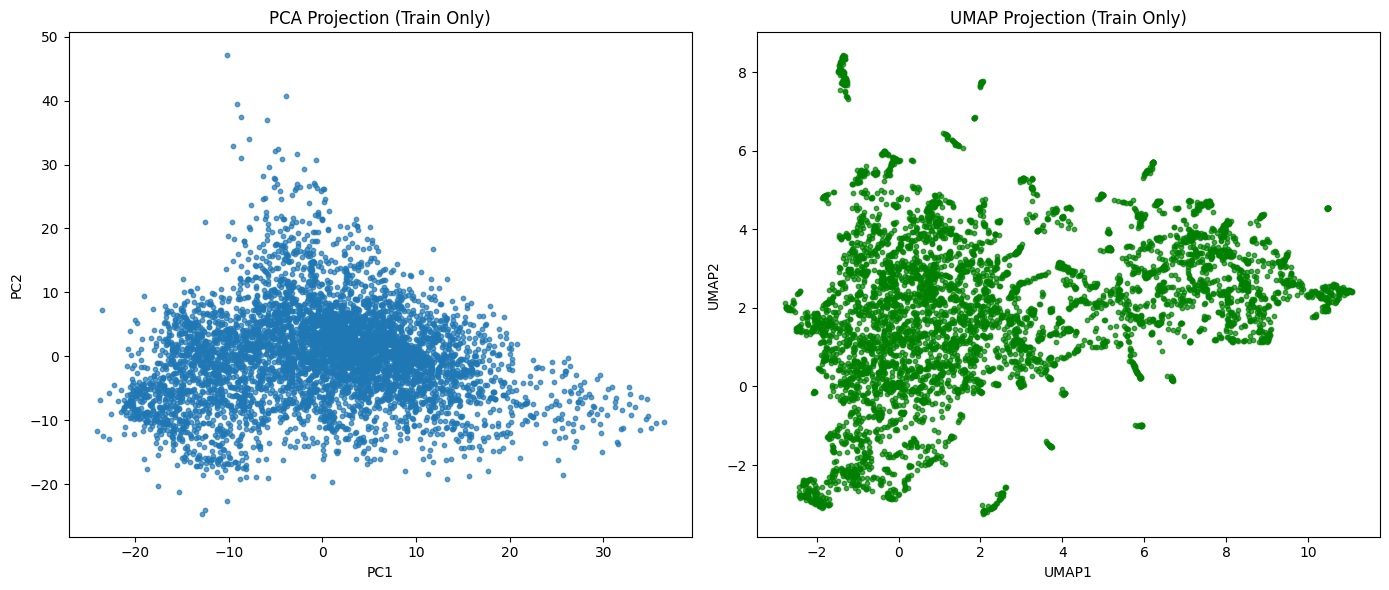

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap.umap_ as umap



# ---------------------------
# PCA on X_train_std
# ---------------------------
pca = PCA(n_components=2)
# fill an values

pca_result = pca.fit_transform(X_train_std)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=X_train.index)

# ---------------------------
# UMAP on X_train_std
# ---------------------------
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(X_train_std)

umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'], index=X_train.index)

# ---------------------------
# Plotting
# ---------------------------
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PCA Plot
axes[0].scatter(pca_df['PC1'], pca_df['PC2'], s=10, alpha=0.7)
axes[0].set_title("PCA Projection (Train Only)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# UMAP Plot
axes[1].scatter(umap_df['UMAP1'], umap_df['UMAP2'], s=10, alpha=0.7, color='green')
axes[1].set_title("UMAP Projection (Train Only)")
axes[1].set_xlabel("UMAP1")
axes[1].set_ylabel("UMAP2")

plt.tight_layout()
plt.show()


## try to do correlation test and see which featrres are corelated with each other to delete the redundunt ones

In [34]:
final_df_filled_train.shape, y_train.shape, final_df_filled_test.shape, y_test.shape, final_df_filled_val.shape, y_val.shape

((5682, 468), (5682,), (790, 140), (790,), (1421, 140), (1421,))

C:\Users\naman\AppData\Local\Temp\ipykernel_30624\3885264177.py:23: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='average')


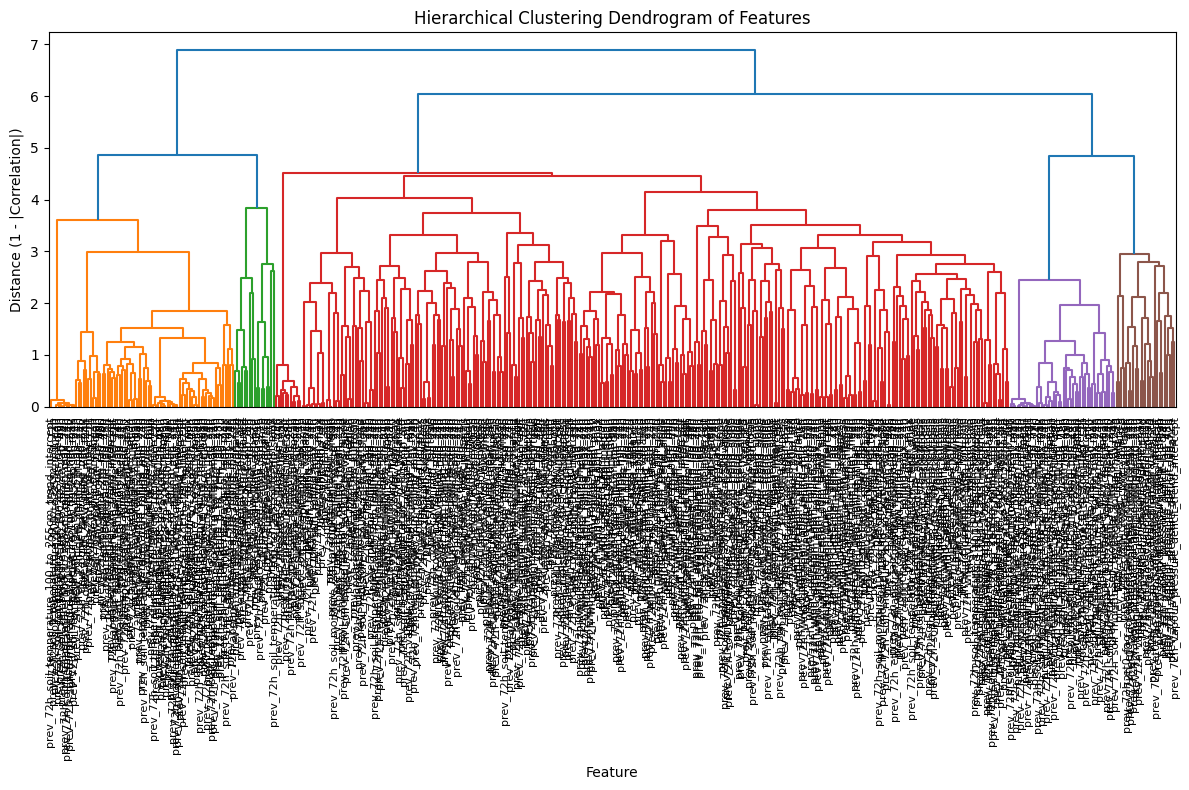

Number of original features: 468
Number of features after dropping highly correlated ones: 140
Dropped features:
['prev_72h_temperature_2m_median', 'prev_72h_temperature_2m_min', 'prev_72h_temperature_2m_max', 'prev_72h_temperature_2m_variance', 'prev_72h_temperature_2m_trend_intercept', 'prev_72h_temperature_2m_lag_24h', 'prev_72h_temperature_2m_lag_48h', 'prev_72h_temperature_2m_lag_72h', 'prev_72h_temperature_2m_rolling_mean_24h', 'prev_72h_temperature_2m_rolling_max_24h', 'prev_72h_temperature_2m_rolling_min_24h', 'prev_72h_temperature_2m_temp_diff', 'prev_72h_relative_humidity_2m_median', 'prev_72h_relative_humidity_2m_min', 'prev_72h_relative_humidity_2m_std', 'prev_72h_relative_humidity_2m_variance', 'prev_72h_relative_humidity_2m_skewness', 'prev_72h_relative_humidity_2m_trend_intercept', 'prev_72h_relative_humidity_2m_rolling_mean_24h', 'prev_72h_relative_humidity_2m_rolling_max_24h', 'prev_72h_relative_humidity_2m_rolling_min_24h', 'prev_72h_relative_humidity_2m_humidity_rang

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Assuming final_df is your DataFrame with shape (35137, 468)
# (Make sure it's numeric and handle missing values if needed)
final_df_filled_train = X_train_std.fillna(0)
final_df_filled_val = X_val_std.fillna(0)
final_df_filled_test = X_test_std.fillna(0)
# --------------------------------------
# Part 1: Visualizing Feature Clusters
# --------------------------------------
# Compute absolute correlation matrix
corr_matrix = final_df_filled_train.corr().abs()

# Compute the distance matrix as (1 - correlation)
# For hierarchical clustering, we need to convert our similarity measure into a distance measure.
distance_matrix = 1 - corr_matrix

# Generate linkage matrix using average linkage method
linkage_matrix = linkage(distance_matrix, method='average')

# Plot dendrogram – note that labels might be overlapped due to a large number of features
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=corr_matrix.columns, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram of Features")
plt.xlabel("Feature")
plt.ylabel("Distance (1 - |Correlation|)")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# Part 2: Automatic Feature Elimination by Correlation
# -------------------------------------------------
def drop_highly_correlated_features(df, correlation_threshold=0.95):
    """
    Drops features that are highly correlated. For each pair of features with a correlation
    above the threshold, one feature is removed.
    
    Args:
        df: DataFrame containing the features.
        correlation_threshold: Threshold above which features are considered redundant.
    
    Returns:
        A tuple (df_reduced, dropped_features) where:
         - df_reduced is the DataFrame after dropping features.
         - dropped_features is a list of feature names that were dropped.
    """
    corr_matrix = df.corr().abs()
    # Select the upper triangle of the correlation matrix
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find features with a correlation greater than the specified threshold
    drop_cols = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]
    
    # Drop these features from the DataFrame
    df_reduced = df.drop(columns=drop_cols)
    return df_reduced, drop_cols

# Apply the function
reduced_df_train, dropped_features = drop_highly_correlated_features(final_df_filled_train, correlation_threshold=0.75)

# drop the dropped features from the validation and test sets as well
final_df_filled_val = final_df_filled_val.drop(columns=dropped_features, errors='ignore')
final_df_filled_test = final_df_filled_test.drop(columns=dropped_features, errors='ignore')

print("Number of original features:", final_df_filled_train.shape[1])
print("Number of features after dropping highly correlated ones:", reduced_df_train.shape[1])
print("Dropped features:")
print(dropped_features)


In [37]:
reduced_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5682 entries, 2526 to 182
Columns: 140 entries, prev_72h_temperature_2m_mean to prev_72h_soil_moisture_100_to_255cm_kurtosis
dtypes: float64(140)
memory usage: 6.1 MB


## Try traditional machine learning with this reduced df

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold
# Enable experimental halving search in scikit-learn
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import LinearSVC
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Optimized Gradient Boosting using LightGBM
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

# -------------------------
# 1. Data Preparation
# -------------------------
# Assume 'reduced_df' is your feature DataFrame and 
# 'merged_df["extreme"]' is your target variable.
X = reduced_df_train.copy()
y = y_train

# Train-test split with stratification (90% training, 10% testing)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

print("Train and test split:")
print(f"Train set shape: {X_train_new.shape}")
print(f"Test set shape: {X_test_new.shape}")

# -------------------------
# 2. Define Cross-validation and Models
# -------------------------
# Use 3-fold CV to speed up tuning
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define models and their hyperparameter grids, including an optimized LightGBM-based Gradient Boosting.
from sklearn.svm import LinearSVC

# Define models and their hyperparameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Optimized Gradient Boosting': {
        'model': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'num_leaves': [31, 50],
            'learning_rate': [0.05, 0.1],
            'n_estimators': [100, 200]
        }
    },
    'Support Vector Machine': {
        'model': LinearSVC(class_weight='balanced', random_state=42, max_iter=10000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'loss': ['hinge']
        }
    }
}


results = {}

# -------------------------
# 3. Subsample Training Data for Fast Tuning
# -------------------------
# Use a subset (e.g., 30%) of the training data for hyperparameter tuning
# Define the sample fraction
sample_fraction = 0.3
X_train_reset = X_train_new.reset_index(drop=True)
# Sample indices
sample_indices = X_train_reset.sample(frac=sample_fraction, random_state=42).index

# Create the sampled datasets
X_train_sample = X_train_reset.loc[sample_indices]
y_train_sample = y_train_new[sample_indices]

print("\nStarting model training and hyperparameter tuning with HalvingRandomSearchCV:")

# -------------------------
# 4. Model Training with HalvingRandomSearchCV
# -------------------------
for model_name, config in tqdm(models.items(), desc="Models", total=len(models)):
    print(f"\n----- Training {model_name} -----")
    
    # Use HalvingRandomSearchCV for efficient hyperparameter tuning
    halving_search = HalvingRandomSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        scoring='roc_auc',  # Using ROC-AUC for imbalanced data.
        cv=cv_strategy,
        n_jobs=-1,
        verbose=1,
        factor=2,          # Controls the aggressive down-selection
        max_resources='auto'
    )
    
    # Fit on the subsampled training data
    halving_search.fit(X_train_sample, y_train_sample)
    best_model = halving_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {halving_search.best_params_}")
    print(f"Best cross validated ROC-AUC for {model_name}: {halving_search.best_score_:.4f}")
    
    # Evaluate on the full test set.
    y_pred = best_model.predict(X_test_new)
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(X_test_new)[:, 1]
        auc = roc_auc_score(y_test_new, y_proba)
    else:
        auc = None
    
    print(f"\nEvaluation metrics for {model_name} on the test set:")
    print(classification_report(y_test_new, y_pred, digits=4))
    if auc is not None:
        print(f"Test ROC-AUC: {auc:.4f}")
    
    cm = confusion_matrix(y_test_new, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    results[model_name] = {
        'best_model': best_model,
        'best_params': halving_search.best_params_,
        'best_cv_score': halving_search.best_score_,
        'classification_report': classification_report(y_test_new, y_pred, digits=4, output_dict=True),
        'confusion_matrix': cm,
        'test_auc': auc
    }

print("\nAll models have been trained and evaluated with optimizations.")


Train and test split:
Train set shape: (5113, 140)
Test set shape: (569, 140)

Starting model training and hyperparameter tuning with HalvingRandomSearchCV:


Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 7
min_resources_: 12
max_resources_: 1534
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 10}
Best cross validated ROC-AUC for Logistic Regression: 0.5677

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.7055    0.6025    0.6499       322
           1     0.5646    0.6721    0.6137       247

    accuracy                         0.6327       569
   macro avg     0.6350    0.6373    0.6318       569
weighted avg     0.

  File "c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1435, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


[LightGBM] [Info] Number of positive: 670, number of negative: 864
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29336
[LightGBM] [Info] Number of data points in the train set: 1534, number of used features: 139
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Best parameters for Optimized Gradient Boosting: {'num_leaves': 50, 'n_estimators': 200, 'learning_rate': 0.1}
Best cross validated ROC-AUC for Optimized Gradient Boosting: 0.5235

Evaluation metrics for Optimized Gradient Boosting on the test set:
              precision    recall  f1-score   support

           0     0.6941    0.7329    0.7130       322
           1     0.6245    0.5789    0.6008       247

    accuracy                         0.6661       569
   macro avg     0.6593    0.6559    0.656

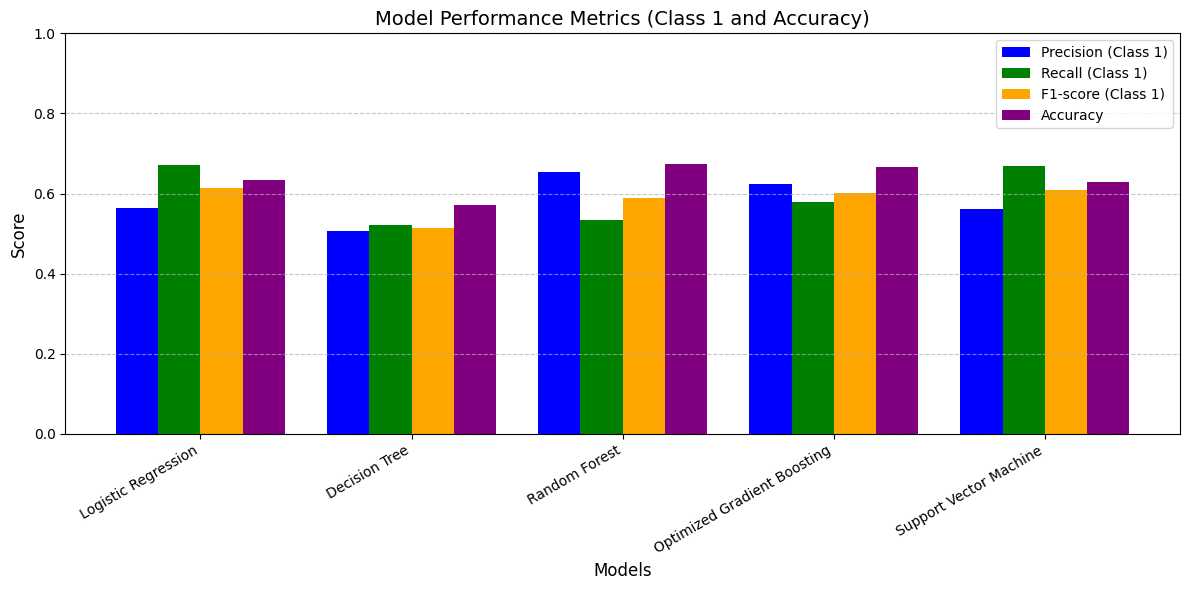

In [7]:
# Update the table to include only Class 1 metrics and accuracy
import pandas as pd
summary_data_class1 = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Optimized Gradient Boosting",
        "Support Vector Machine"
    ],
    "Precision (Class 1)": [0.5646, 0.5059, 0.6535, 0.6245, 0.5612],
    "Recall (Class 1)": [0.6721, 0.5223, 0.5344, 0.5789, 0.6680],
    "F1-score (Class 1)": [0.6137, 0.5139, 0.5880, 0.6008, 0.6100],
    "Accuracy": [0.6327, 0.5712, 0.6749, 0.6661, 0.6292]
}

# Create DataFrame
df_summary_class1 = pd.DataFrame(summary_data_class1)


# Regenerate the plot with explicit color assignments
plt.figure(figsize=(12, 6))
bar_width = 0.2
x = range(len(df_summary_class1))
# Define color mapping
color_map = {
    "Precision (Class 1)": 'blue',
    "Recall (Class 1)": 'green',
    "F1-score (Class 1)": 'orange',
    "Accuracy": 'purple'
}

# Plot bars with assigned colors
for i, metric in enumerate(color_map):
    plt.bar(
        [p + i * bar_width for p in x],
        df_summary_class1[metric],
        width=bar_width,
        label=metric,
        color=color_map[metric]
    )

# Set x-axis labels and ticks
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Model Performance Metrics (Class 1 and Accuracy)", fontsize=14)
plt.xticks([p + 1.5 * bar_width for p in x], df_summary_class1["Model"], rotation=30, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()

# Show plot with grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Train models without dropping highly correlated features and train these models

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold
# Enable experimental halving search in scikit-learn
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import LinearSVC
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Optimized Gradient Boosting using LightGBM
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

# -------------------------
# 1. Data Preparation
# -------------------------
# Assume 'reduced_df' is your feature DataFrame and 
# 'merged_df["extreme"]' is your target variable.
# X = final_df_filled.copy()
# y = df["extreme"].values

# # Train-test split with stratification (90% training, 10% testing)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.10, random_state=42, stratify=y
# )

print("Train and test split:")
print(f"Train set shape: {reduced_df_train.shape}")
print(f"Test set shape: {final_df_filled_test.shape}")

# -------------------------
# 2. Define Cross-validation and Models
# -------------------------
# Use 3-fold CV to speed up tuning
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define models and their hyperparameter grids, including an optimized LightGBM-based Gradient Boosting.
from sklearn.svm import LinearSVC

# Define models and their hyperparameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Optimized Gradient Boosting': {
        'model': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'num_leaves': [31, 50],
            'learning_rate': [0.05, 0.1],
            'n_estimators': [100, 200]
        }
    },
    'Support Vector Machine': {
        'model': LinearSVC(class_weight='balanced', random_state=42, max_iter=10000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'loss': ['hinge']
        }
    }
}


results = {}

# -------------------------
# 3. Subsample Training Data for Fast Tuning
# -------------------------
# Use a subset (e.g., 30%) of the training data for hyperparameter tuning
# Define the sample fraction
sample_fraction = 0.3
X_train_reset = reduced_df_train.reset_index(drop=True)
# Sample indices
sample_indices = X_train_reset.sample(frac=sample_fraction, random_state=42).index

# Create the sampled datasets
X_train_sample = X_train_reset.loc[sample_indices]
y_train_sample = y_train[sample_indices]

print("\nStarting model training and hyperparameter tuning with HalvingRandomSearchCV:")

# -------------------------
# 4. Model Training with HalvingRandomSearchCV
# -------------------------
for model_name, config in tqdm(models.items(), desc="Models", total=len(models)):
    print(f"\n----- Training {model_name} -----")
    
    # Use HalvingRandomSearchCV for efficient hyperparameter tuning
    halving_search = HalvingRandomSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        scoring='roc_auc',  # Using ROC-AUC for imbalanced data.
        cv=cv_strategy,
        n_jobs=-1,
        verbose=1,
        factor=2,          # Controls the aggressive down-selection
        max_resources='auto'
    )
    
    # Fit on the subsampled training data
    halving_search.fit(X_train_sample, y_train_sample)
    best_model = halving_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {halving_search.best_params_}")
    print(f"Best cross validated ROC-AUC for {model_name}: {halving_search.best_score_:.4f}")
    
    # Evaluate on the full test set.
    y_pred = best_model.predict(final_df_filled_test)
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(final_df_filled_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        auc = None
    
    print(f"\nEvaluation metrics for {model_name} on the test set:")
    print(classification_report(y_test, y_pred, digits=4))
    if auc is not None:
        print(f"Test ROC-AUC: {auc:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    results[model_name] = {
        'best_model': best_model,
        'best_params': halving_search.best_params_,
        'best_cv_score': halving_search.best_score_,
        'classification_report': classification_report(y_test, y_pred, digits=4, output_dict=True),
        'confusion_matrix': cm,
        'test_auc': auc
    }

print("\nAll models have been trained and evaluated with optimizations.")


Train and test split:
Train set shape: (5682, 140)
Test set shape: (790, 140)

Starting model training and hyperparameter tuning with HalvingRandomSearchCV:


Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 8
min_resources_: 12
max_resources_: 1705
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 1}
Best cross validated ROC-AUC for Logistic Regression: 0.5602

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.6379    0.5964    0.6165       446
           1     0.5174    0.5610    0.5384       344

    accuracy                         0.5810       790
   macro avg     0.5777    0.5787    0.5774       790
weighted avg     0.5

## Do PCA and umpa with gihher compoenets to see if it can capture more variance and train these classifcal models

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap.umap_ as umap

# Assume normalized_df is your normalized DataFrame of shape (35137, 468)
# If needed, fill or drop any remaining missing values beforehand.
data = X_train_std.copy()

# ---------------------------
# PCA Dimensionality Reduction
# ---------------------------
# We'll reduce the data to 2 principal components.
pca = PCA(n_components=55)
pca_result_train = pca.fit_transform(data)
pca_resulat_val = pca.transform(X_val_std)
pca_result_test = pca.transform(X_test_std)
# Plotting PCA results

print("PCA explained variance ratio:", pca.explained_variance_ratio_)

# Create a DataFrame for PCA results.
# pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'], index=data.index)



PCA explained variance ratio: [0.21199714 0.11706307 0.07102446 0.04503506 0.04237323 0.03123552
 0.02411593 0.02118025 0.02094345 0.01855092 0.01713881 0.01546225
 0.01447264 0.01261748 0.01198875 0.0107941  0.0107786  0.00883572
 0.00857002 0.00809731 0.00800329 0.00754589 0.00717682 0.00670683
 0.00656393 0.00623972 0.0060545  0.0057363  0.00561539 0.00550932
 0.00522024 0.00508577 0.00493504 0.00484996 0.00467891 0.00440251
 0.00420035 0.00408361 0.00397456 0.0037972  0.00368224 0.00355389
 0.00347523 0.00341736 0.00328899 0.00321855 0.00313455 0.00310712
 0.0029464  0.00291144 0.00288015 0.0027808  0.00274081 0.00269294
 0.00256461]


In [31]:
sum(pca.explained_variance_ratio_)  # Check how much variance is explained by the first 50 components

np.float64(0.8790499317504958)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split, StratifiedKFold
# Enable experimental halving search in scikit-learn
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.svm import LinearSVC
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Optimized Gradient Boosting using LightGBM
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

# -------------------------
# 1. Data Preparation
# -------------------------
# Assume 'reduced_df' is your feature DataFrame and 
# 'merged_df["extreme"]' is your target variable.


print("Train and test split:")
print(f"Train set shape: {pca_result_train.shape}")
print(f"Test set shape: {pca_result_test.shape}")

# -------------------------
# 2. Define Cross-validation and Models
# -------------------------
# Use 3-fold CV to speed up tuning
cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Define models and their hyperparameter grids, including an optimized LightGBM-based Gradient Boosting.
from sklearn.svm import LinearSVC

# Define models and their hyperparameter grids
models = {
    'Logistic Regression': {
        'model': LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
        'params': {
            'max_depth': [None, 5, 10, 15],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Optimized Gradient Boosting': {
        'model': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
        'params': {
            'num_leaves': [31, 50],
            'learning_rate': [0.05, 0.1],
            'n_estimators': [100, 200]
        }
    },
    'Support Vector Machine': {
        'model': LinearSVC(class_weight='balanced', random_state=42, max_iter=10000),
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l2'],
            'loss': ['hinge']
        }
    }
}


results = {}


print("\nStarting model training and hyperparameter tuning with HalvingRandomSearchCV:")

# -------------------------
# 4. Model Training with HalvingRandomSearchCV
# -------------------------
for model_name, config in tqdm(models.items(), desc="Models", total=len(models)):
    print(f"\n----- Training {model_name} -----")
    
    # Use HalvingRandomSearchCV for efficient hyperparameter tuning
    halving_search = HalvingRandomSearchCV(
        estimator=config['model'],
        param_distributions=config['params'],
        scoring='roc_auc',  # Using ROC-AUC for imbalanced data.
        cv=cv_strategy,
        n_jobs=-1,
        verbose=1,
        factor=2,          # Controls the aggressive down-selection
        max_resources='auto'
    )
    
    # Fit on the subsampled training data
    halving_search.fit(pca_result_train, y_train)
    best_model = halving_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {halving_search.best_params_}")
    print(f"Best cross validated ROC-AUC for {model_name}: {halving_search.best_score_:.4f}")
    
    # Evaluate on the full test set.
    y_pred = best_model.predict(pca_result_test)
    if hasattr(best_model, "predict_proba"):
        y_proba = best_model.predict_proba(pca_result_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        auc = None
    
    print(f"\nEvaluation metrics for {model_name} on the test set:")
    print(classification_report(y_test, y_pred, digits=4))
    if auc is not None:
        print(f"Test ROC-AUC: {auc:.4f}")
    
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    results[model_name] = {
        'best_model': best_model,
        'best_params': halving_search.best_params_,
        'best_cv_score': halving_search.best_score_,
        'classification_report': classification_report(y_test, y_pred, digits=4, output_dict=True),
        'confusion_matrix': cm,
        'test_auc': auc
    }

print("\nAll models have been trained and evaluated with optimizations.")


Train and test split:
Train set shape: (5682, 55)
Test set shape: (790, 55)

Starting model training and hyperparameter tuning with HalvingRandomSearchCV:


Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 12
max_resources_: 5682
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 1}
Best cross validated ROC-AUC for Logistic Regression: 0.6519

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.6618    0.6099    0.6348       446
           1     0.5409    0.5959    0.5671       344

    accuracy                         0.6038       790
   macro avg     0.6013    0.6029    0.6009       790
weighted avg     0.6

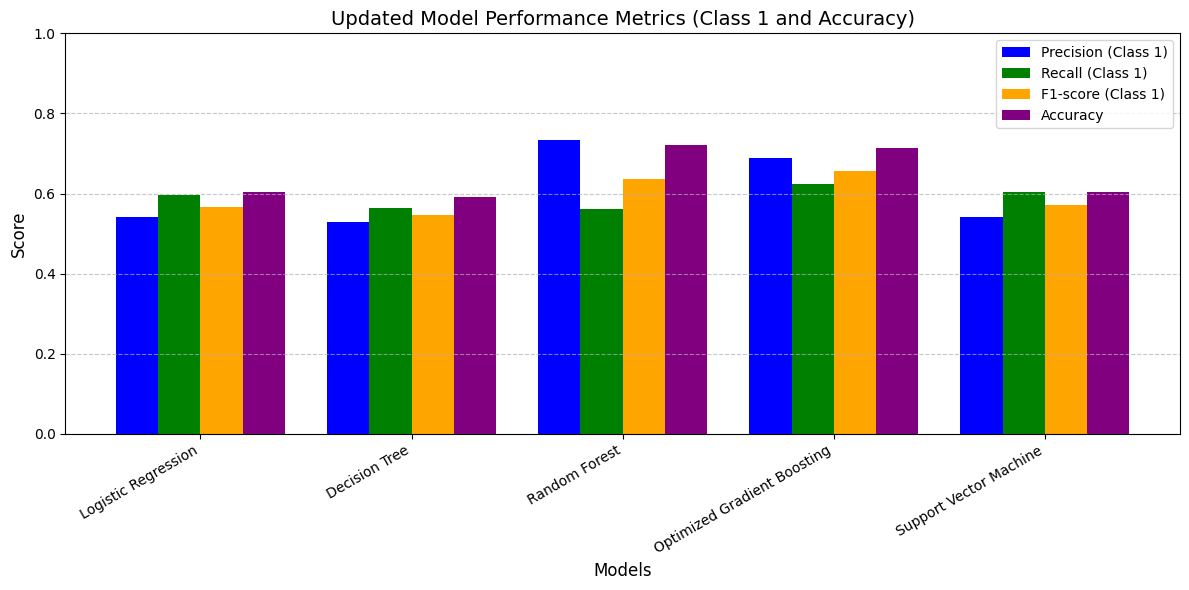

In [8]:
# Construct new summary data from the provided outputs
summary_data_updated = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Optimized Gradient Boosting",
        "Support Vector Machine"
    ],
    "Precision (Class 1)": [0.5409, 0.5301, 0.7338, 0.6891, 0.5403],
    "Recall (Class 1)": [0.5959, 0.5640, 0.5610, 0.6250, 0.6047],
    "F1-score (Class 1)": [0.5671, 0.5465, 0.6359, 0.6555, 0.5706],
    "Accuracy": [0.6038, 0.5924, 0.7203, 0.7139, 0.6038]
}

# Create DataFrame
df_summary_updated = pd.DataFrame(summary_data_updated)

# Display the table to the user

# Generate a new bar chart for the updated performance summary

plt.figure(figsize=(12, 6))
metrics = ["Precision (Class 1)", "Recall (Class 1)", "F1-score (Class 1)", "Accuracy"]
bar_width = 0.2
x = range(len(df_summary_updated))

# Define color mapping
color_map = {
    "Precision (Class 1)": 'blue',
    "Recall (Class 1)": 'green',
    "F1-score (Class 1)": 'orange',
    "Accuracy": 'purple'
}

# Plot bars with assigned colors
for i, metric in enumerate(metrics):
    plt.bar(
        [p + i * bar_width for p in x],
        df_summary_updated[metric],
        width=bar_width,
        label=metric,
        color=color_map[metric]
    )

# Set x-axis labels and ticks
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Updated Model Performance Metrics (Class 1 and Accuracy)", fontsize=14)
plt.xticks([p + 1.5 * bar_width for p in x], df_summary_updated["Model"], rotation=30, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Do features selection using random forest, selectkbest and l1, l2 regiraliztion to select important features

In [47]:
X_train_std

prev_72h_temperature_2m_mean  prev_72h_temperature_2m_median  \
original_index                                                                 
2526                                0.444360                        0.486094   
2105                               -0.104542                       -0.193626   
7251                                1.060883                        1.037228   
5601                                0.336567                        0.266422   
7054                                0.600515                        0.663186   
...                                      ...                             ...   
3533                                1.574888                        1.470973   
858                                 0.509284                        0.483360   
2543                               -1.328660                       -1.337301   
1569                               -1.301162                       -1.236906   
182                                 0.420897                        0.481211   

                prev_72h_temperature_2m_min  prev_72h_temperature_2m_max  \
original_index                                                             
2526                               0.570834                     0.172813   
2105                               0.203140                     0.216861   
7251                               1.311000                     0.784476   
5601                               0.218095                     0.167874   
7054                               0.158725                     1.011723   
...                                     ...                          ...   
3533                               1.485964                     1.953210   
858                                0.357639                     0.780672   
2543                              -1.107738                    -0.658488   
1569                              -0.857999                    -1.830292   
182                                0.187117                     0.344666   

                prev_72h_temperature_2m_std  prev_72h_temperature_2m_variance  \
original_index                                                                  
2526                              -1.127045                         -0.918131   
2105                              -0.261324                         -0.364010   
7251                              -1.041065                         -0.873287   
5601                              -0.573600                         -0.590154   
7054                               1.490349                          1.453991   
...                                     ...                               ...   
3533                               0.575506                          0.388155   
858                                0.458392                          0.270079   
2543                              -0.452189                         -0.505752   
1569                              -1.510857                         -1.090909   
182                                0.429597                          0.241687   

                prev_72h_temperature_2m_skewness  \
original_index                                     
2526                                    0.380108   
2105                                    2.450697   
7251                                    0.926781   
5601                                    0.204243   
7054                                   -0.235071   
...                                          ...   
3533                                    1.268900   
858                                     0.220799   
2543                                    1.419920   
1569                                   -1.153398   
182                                    -1.310430   

                prev_72h_temperature_2m_kurtosis  \
original_index                                     
2526                                    0.744939   
2105                                    2.712242   
7251                                   -0.28066

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_std.select_dtypes(include=["number"]).copy(), y_train)

selector_1 = SelectFromModel(rf, threshold="mean", max_features=55)
X_train_selected_1 = selector_1.fit_transform(X_train_std.select_dtypes(include=["number"]).copy(), y_train)
X_test_selected_1 = selector_1.transform(X_test_std.select_dtypes(include=["number"]).copy().values)

In [34]:
selected_indices_1 = selector_1.get_support(indices=True)
selected_features_1 = X_train_std.columns[selected_indices_1]
print("selected features:")
print(selected_features_1)

selected features:
Index(['prev_72h_temperature_2m_std', 'prev_72h_relative_humidity_2m_mean',
       'prev_72h_relative_humidity_2m_min',
       'prev_72h_relative_humidity_2m_variance',
       'prev_72h_relative_humidity_2m_humidity_range',
       'prev_72h_precipitation_mean', 'prev_72h_precipitation_total_precip',
       'prev_72h_rain_variance', 'prev_72h_pressure_msl_mean',
       'prev_72h_pressure_msl_min', 'prev_72h_pressure_msl_max',
       'prev_72h_pressure_msl_skewness',
       'prev_72h_pressure_msl_rolling_min_24h',
       'prev_72h_surface_pressure_median', 'prev_72h_surface_pressure_lag_24h',
       'prev_72h_surface_pressure_lag_48h',
       'prev_72h_surface_pressure_lag_72h',
       'prev_72h_surface_pressure_rolling_max_24h',
       'prev_72h_surface_pressure_rolling_min_24h',
       'prev_72h_wind_speed_10m_max',
       'prev_72h_wind_speed_10m_rolling_mean_24h',
       'prev_72h_wind_speed_10m_rolling_max_24h',
       'prev_72h_wind_speed_100m_skewness', 'prev_72

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=35)
X_train_selected = selector.fit_transform(X_train_std.select_dtypes(include=["number"]).copy(), y_train)
X_test_selected = selector.transform((X_test_std.select_dtypes(include=["number"]).copy().values))

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = data.columns[selected_indices]
print(f"Selected features: {selected_features}")

Selected features: Index(['prev_72h_relative_humidity_2m_std', 'prev_72h_precipitation_mean',
       'prev_72h_precipitation_median', 'prev_72h_precipitation_std',
       'prev_72h_precipitation_rolling_mean_24h',
       'prev_72h_precipitation_total_precip', 'prev_72h_rain_mean',
       'prev_72h_rain_median', 'prev_72h_rain_std',
       'prev_72h_rain_rolling_mean_24h', 'prev_72h_pressure_msl_min',
       'prev_72h_pressure_msl_rolling_mean_24h',
       'prev_72h_pressure_msl_rolling_max_24h',
       'prev_72h_pressure_msl_rolling_min_24h', 'prev_72h_wind_speed_10m_mean',
       'prev_72h_wind_speed_10m_median', 'prev_72h_wind_speed_10m_max',
       'prev_72h_wind_speed_10m_std', 'prev_72h_wind_speed_10m_lag_24h',
       'prev_72h_wind_speed_10m_rolling_mean_24h',
       'prev_72h_wind_speed_10m_rolling_std_24h',
       'prev_72h_wind_speed_10m_rolling_max_24h',
       'prev_72h_wind_speed_100m_mean', 'prev_72h_wind_speed_100m_median',
       'prev_72h_wind_speed_100m_max', 'prev_72h

In [36]:
def tain_models(df,y):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm.auto import tqdm
    from sklearn.model_selection import train_test_split, StratifiedKFold
    # Enable experimental halving search in scikit-learn
    from sklearn.experimental import enable_halving_search_cv  # noqa
    from sklearn.model_selection import HalvingRandomSearchCV
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
    from sklearn.svm import LinearSVC
    # Import classifiers
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC

    # Optimized Gradient Boosting using LightGBM
    import lightgbm as lgb

    import warnings
    warnings.filterwarnings('ignore')

    # -------------------------
    # 1. Data Preparation
    # -------------------------
    # Assume 'reduced_df' is your feature DataFrame and 
    # 'merged_df["extreme"]' is your target variable.
    X = df.copy()
   

    # Train-test split with stratification (90% training, 10% testing)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.10, random_state=42, stratify=y
    )

    print("Train and test split:")
    print(f"Train set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")

    # -------------------------
    # 2. Define Cross-validation and Models
    # -------------------------
    # Use 3-fold CV to speed up tuning
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Define models and their hyperparameter grids, including an optimized LightGBM-based Gradient Boosting.
    from sklearn.svm import LinearSVC

    # Define models and their hyperparameter grids
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
            'params': {
                'C': [0.01, 0.1, 1, 10],
                'penalty': ['l2']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(class_weight='balanced', random_state=42),
            'params': {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
            'params': {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Optimized Gradient Boosting': {
            'model': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
            'params': {
                'num_leaves': [31, 50],
                'learning_rate': [0.05, 0.1],
                'n_estimators': [100, 200]
            }
        },
        'Support Vector Machine': {
            'model': LinearSVC(class_weight='balanced', random_state=42, max_iter=10000),
            'params': {
                'C': [0.1, 1, 10],
                'penalty': ['l2'],
                'loss': ['hinge']
            }
        }
    }


    results = {}


    print("\nStarting model training and hyperparameter tuning with HalvingRandomSearchCV:")

    # -------------------------
    # 4. Model Training with HalvingRandomSearchCV
    # -------------------------
    for model_name, config in tqdm(models.items(), desc="Models", total=len(models)):
        print(f"\n----- Training {model_name} -----")
        
        # Use HalvingRandomSearchCV for efficient hyperparameter tuning
        halving_search = HalvingRandomSearchCV(
            estimator=config['model'],
            param_distributions=config['params'],
            scoring='roc_auc',  # Using ROC-AUC for imbalanced data.
            cv=cv_strategy,
            n_jobs=-1,
            verbose=1,
            factor=2,          # Controls the aggressive down-selection
            max_resources='auto'
        )
        
        # Fit on the subsampled training data
        halving_search.fit(X_train, y_train)
        best_model = halving_search.best_estimator_
        
        print(f"Best parameters for {model_name}: {halving_search.best_params_}")
        print(f"Best cross validated ROC-AUC for {model_name}: {halving_search.best_score_:.4f}")
        
        # Evaluate on the full test set.
        y_pred = best_model.predict(X_test)
        if hasattr(best_model, "predict_proba"):
            y_proba = best_model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        else:
            auc = None
        
        print(f"\nEvaluation metrics for {model_name} on the test set:")
        print(classification_report(y_test, y_pred, digits=4))
        if auc is not None:
            print(f"Test ROC-AUC: {auc:.4f}")
        
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        results[model_name] = {
            'best_model': best_model,
            'best_params': halving_search.best_params_,
            'best_cv_score': halving_search.best_score_,
            'classification_report': classification_report(y_test, y_pred, digits=4, output_dict=True),
            'confusion_matrix': cm,
            'test_auc': auc
        }

    print("\nAll models have been trained and evaluated with optimizations.")
    return results

selectd_features_result_1 = tain_models(X_train_std[selected_features_1], y_train)
selected_features_result_2 = tain_models(X_train_std[selected_features], y_train)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Initialize Logistic Regression with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_std.select_dtypes(include=["number"]).copy(), y_train)

# Select features based on L1 regularization
selector = SelectFromModel(model, threshold="mean", max_features=55)
X_train_selected = selector.transform(X_test_std.select_dtypes(include=["number"]).copy())
X_test_selected = selector.transform(X_test_std)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X_train_std.columns[selected_indices]
print(f"Selected features: {selected_features}")
selected_features_result_3 = tain_models(X_train_std[selected_features], y_train)
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

# Initialize Ridge Regression with L2 penalty
model = Ridge(alpha=1.0)
model.fit(X_train_std.select_dtypes(include=["number"]).copy(), y_train)

# Select features based on feature importance
selector = SelectFromModel(model, threshold="mean", max_features=55)
# X_train_selected = selector.transform(X_train_std)
# X_test_selected = selector.transform(X_test_std)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = X_train_std.columns[selected_indices]
print(f"Selected features: {selected_features}")
selected_features_result_3 = tain_models(X_train_std[selected_features], y_train)


Train and test split:
Train set shape: (5113, 55)
Test set shape: (569, 55)

Starting model training and hyperparameter tuning with HalvingRandomSearchCV:


Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 12
max_resources_: 5113
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 10}
Best cross validated ROC-AUC for Logistic Regression: 0.4741

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.6864    0.6118    0.6470       322
           1     0.5567    0.6356    0.5936       247

    accuracy                         0.6221       569
   macro avg     0.6216    0.6237    0.6203       569
weighted avg     0.

Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 12
max_resources_: 5113
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 1}
Best cross validated ROC-AUC for Logistic Regression: 0.5588

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.6422    0.6242    0.6331       322
           1     0.5273    0.5466    0.5368       247

    accuracy                         0.5905       569
   macro avg     0.5848    0.5854    0.5849       569
weighted avg     0.5

Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 12
max_resources_: 5113
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 1}
Best cross validated ROC-AUC for Logistic Regression: 0.4323

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.6851    0.6149    0.6481       322
           1     0.5571    0.6316    0.5920       247

    accuracy                         0.6221       569
   macro avg     0.6211    0.6232    0.6201       569
weighted avg     0.6

Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 12
max_resources_: 5113
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 10}
Best cross validated ROC-AUC for Logistic Regression: 0.4925

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.6928    0.6304    0.6602       322
           1     0.5688    0.6356    0.6004       247

    accuracy                         0.6327       569
   macro avg     0.6308    0.6330    0.6303       569
weighted avg     0.

#### Do feature selectoin on normal data

In [64]:
final_df_filled_test.shape

(790, 140)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris



rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(final_df_train.select_dtypes(include=["number"]).copy(), y_train)

selector = SelectFromModel(rf, threshold="mean", max_features=55)
# X_train_selected = selector.fit_transform(final_df_train.select_dtypes(include=["number"]).copy(), y_train)
# X_test_selected = selector.transform(final_df_test.select_dtypes(include=["number"]).copy().values)
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize SelectKBest with ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=35)
X_train_selected = selector.fit_transform(final_df_train.select_dtypes(include=["number"]).copy(), y_train)
X_test_selected = selector.transform(final_df_test.select_dtypes(include=["number"]).copy().values)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = final_df_train.columns[selected_indices]
print(f"Selected features: {selected_features}")

selected_features_standadrized_results = tain_models(final_df_train[selected_features], y_train)

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Initialize Logistic Regression with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(final_df_train.select_dtypes(include=["number"]).copy(), y_train)

# Select features based on L1 regularization
selector = SelectFromModel(model, threshold="mean", max_features=35)
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = final_df_train.columns[selected_indices]
print(f"Selected features: {selected_features}")

from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

# Initialize Ridge Regression with L2 penalty
model = Ridge(alpha=1.0)
model.fit(final_df_train.select_dtypes(include=["number"]).copy(), y_train)

# Select features based on feature importance
selector = SelectFromModel(model, threshold="mean", max_features=35)
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
selected_features = final_df_train.columns[selected_indices]
print(f"Selected features: {selected_features}")
selected_features_standadrized_results_e = tain_models(final_df_train[selected_features], y_train)

Selected features: Index(['prev_72h_relative_humidity_2m_std', 'prev_72h_precipitation_mean',
       'prev_72h_precipitation_median', 'prev_72h_precipitation_std',
       'prev_72h_precipitation_rolling_mean_24h',
       'prev_72h_precipitation_total_precip', 'prev_72h_rain_mean',
       'prev_72h_rain_median', 'prev_72h_rain_std',
       'prev_72h_rain_rolling_mean_24h', 'prev_72h_pressure_msl_min',
       'prev_72h_pressure_msl_rolling_mean_24h',
       'prev_72h_pressure_msl_rolling_max_24h',
       'prev_72h_pressure_msl_rolling_min_24h', 'prev_72h_wind_speed_10m_mean',
       'prev_72h_wind_speed_10m_median', 'prev_72h_wind_speed_10m_max',
       'prev_72h_wind_speed_10m_std', 'prev_72h_wind_speed_10m_lag_24h',
       'prev_72h_wind_speed_10m_rolling_mean_24h',
       'prev_72h_wind_speed_10m_rolling_std_24h',
       'prev_72h_wind_speed_10m_rolling_max_24h',
       'prev_72h_wind_speed_100m_mean', 'prev_72h_wind_speed_100m_median',
       'prev_72h_wind_speed_100m_max', 'prev_72h

Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 12
max_resources_: 5113
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 10}
Best cross validated ROC-AUC for Logistic Regression: 0.6049

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.6278    0.6025    0.6149       322
           1     0.5077    0.5344    0.5207       247

    accuracy                         0.5729       569
   macro avg     0.5678    0.5684    0.5678       569
weighted avg     0.

Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 12
max_resources_: 5113
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 10}
Best cross validated ROC-AUC for Logistic Regression: 0.5099

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.6318    0.5807    0.6052       322
           1     0.5055    0.5587    0.5308       247

    accuracy                         0.5712       569
   macro avg     0.5686    0.5697    0.5680       569
weighted avg     0.

## Try wihtout engineered features, just scaled raw data

In [38]:
def train_models_original(X_train, y_train, X_test, y_test):

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from tqdm.auto import tqdm
    from sklearn.model_selection import train_test_split, StratifiedKFold
    # Enable experimental halving search in scikit-learn
    from sklearn.experimental import enable_halving_search_cv  # noqa
    from sklearn.model_selection import HalvingRandomSearchCV
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
    from sklearn.svm import LinearSVC
    # Import classifiers
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.svm import SVC

    # Optimized Gradient Boosting using LightGBM
    import lightgbm as lgb

    import warnings
    warnings.filterwarnings('ignore')

    # -------------------------
    # 1. Data Preparation
    # -------------------------
    # Assume 'reduced_df' is your feature DataFrame and 
    # 'merged_df["extreme"]' is your target variable.



    print("Train and test split:")
    print(f"Train set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")

    # -------------------------
    # 2. Define Cross-validation and Models
    # -------------------------
    # Use 3-fold CV to speed up tuning
    cv_strategy = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Define models and their hyperparameter grids, including an optimized LightGBM-based Gradient Boosting.
    from sklearn.svm import LinearSVC

    # Define models and their hyperparameter grids
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
            'params': {
                'C': [0.01, 0.1, 1, 10],
                'penalty': ['l2']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(class_weight='balanced', random_state=42),
            'params': {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42),
            'params': {
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10]
            }
        },
        'Optimized Gradient Boosting': {
            'model': lgb.LGBMClassifier(class_weight='balanced', random_state=42),
            'params': {
                'num_leaves': [31, 50],
                'learning_rate': [0.05, 0.1],
                'n_estimators': [100, 200]
            }
        },
        'Support Vector Machine': {
            'model': LinearSVC(class_weight='balanced', random_state=42, max_iter=10000),
            'params': {
                'C': [0.1, 1, 10],
                'penalty': ['l2'],
                'loss': ['hinge']
            }
        }
    }


    results = {}


    print("\nStarting model training and hyperparameter tuning with HalvingRandomSearchCV:")

    # -------------------------
    # 4. Model Training with HalvingRandomSearchCV
    # -------------------------
    for model_name, config in tqdm(models.items(), desc="Models", total=len(models)):
        print(f"\n----- Training {model_name} -----")
        
        # Use HalvingRandomSearchCV for efficient hyperparameter tuning
        halving_search = HalvingRandomSearchCV(
            estimator=config['model'],
            param_distributions=config['params'],
            scoring='roc_auc',  # Using ROC-AUC for imbalanced data.
            cv=cv_strategy,
            n_jobs=-1,
            verbose=1,
            factor=2,          # Controls the aggressive down-selection
            max_resources='auto'
        )
        
        # Fit on the subsampled training data
        halving_search.fit(X_train, y_train)
        best_model = halving_search.best_estimator_
        
        print(f"Best parameters for {model_name}: {halving_search.best_params_}")
        print(f"Best cross validated ROC-AUC for {model_name}: {halving_search.best_score_:.4f}")
        
        # Evaluate on the full test set.
        y_pred = best_model.predict(X_test)
        if hasattr(best_model, "predict_proba"):
            y_proba = best_model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, y_proba)
        else:
            auc = None
        
        print(f"\nEvaluation metrics for {model_name} on the test set:")
        print(classification_report(y_test, y_pred, digits=4))
        if auc is not None:
            print(f"Test ROC-AUC: {auc:.4f}")
        
        cm = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(cm)
        
        results[model_name] = {
            'best_model': best_model,
            'best_params': halving_search.best_params_,
            'best_cv_score': halving_search.best_score_,
            'classification_report': classification_report(y_test, y_pred, digits=4, output_dict=True),
            'confusion_matrix': cm,
            'test_auc': auc
        }

    print("\nAll models have been trained and evaluated with optimizations.")
    return results

# Train-test split with stratification (90% training, 10% testing)
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#     df[prev_cols], df["extreme"].values, test_size=0.10, random_state=42, stratify=df["extreme"].values
# )
data_3d_X_train = np.stack(X_train[prev_cols].values.tolist(), axis=0)
data_3d_X_test = np.stack(X_test[prev_cols].values.tolist(), axis=0)
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Reshape for scaling: (35000 * 27, 72)
reshaped_data_X_train = data_3d_X_train.reshape(-1, data_3d_X_train.shape[-1])
reshaped_data_X_test = data_3d_X_test.reshape(-1, data_3d_X_test.shape[-1])
# Fit and transform
standardized_data_X_train = scaler.fit_transform(reshaped_data_X_train)
standardized_data_X_test = scaler.transform(reshaped_data_X_test)

# Reshape back to (35000, 27, 72)
standardized_data_3d_train = standardized_data_X_train.reshape(data_3d_X_train.shape)
standardized_data_3d_test = standardized_data_X_test.reshape(data_3d_X_test.shape)
standardized_data_3d_train_flattened = standardized_data_3d_train.reshape(standardized_data_3d_train.shape[0], -1)
standardized_data_3d_test_flattened = standardized_data_3d_test.reshape(standardized_data_3d_test.shape[0], -1)


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import umap.umap_ as umap

# Assume normalized_df is your normalized DataFrame of shape (35137, 468)
# If needed, fill or drop any remaining missing values beforehand.

# ---------------------------
# PCA Dimensionality Reduction
# ---------------------------
# We'll reduce the data to 2 principal components.
pca = PCA(n_components=15)
pca_result_train = pca.fit_transform(standardized_data_3d_train_flattened)
pca_result_test = pca.transform(standardized_data_3d_test_flattened)
print("PCA explained variance ratio:", pca.explained_variance_ratio_)
print("Total variance explained: ", sum(pca.explained_variance_ratio_))

results_original = train_models_original(pca_result_train, y_train, pca_result_test, y_test)

PCA explained variance ratio: [0.20440664 0.08617838 0.07609916 0.05571093 0.0550731  0.03703069
 0.02467076 0.02354677 0.02181918 0.02032231 0.01812483 0.01393867
 0.01208331 0.01058717 0.01002018]
Total variance explained:  0.6696120567971346
Train and test split:
Train set shape: (5682, 15)
Test set shape: (790, 15)

Starting model training and hyperparameter tuning with HalvingRandomSearchCV:


Models:   0%|          | 0/5 [00:00<?, ?it/s]


----- Training Logistic Regression -----
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 9
min_resources_: 12
max_resources_: 5682
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 4
n_resources: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 1
n_candidates: 2
n_resources: 24
Fitting 3 folds for each of 2 candidates, totalling 6 fits
----------
iter: 2
n_candidates: 1
n_resources: 48
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Logistic Regression: {'penalty': 'l2', 'C': 1}
Best cross validated ROC-AUC for Logistic Regression: 0.5143

Evaluation metrics for Logistic Regression on the test set:
              precision    recall  f1-score   support

           0     0.6020    0.5426    0.5708       446
           1     0.4742    0.5349    0.5027       344

    accuracy                         0.5392       790
   macro avg     0.5381    0.5387    0.5367       790
weighted avg     0.5

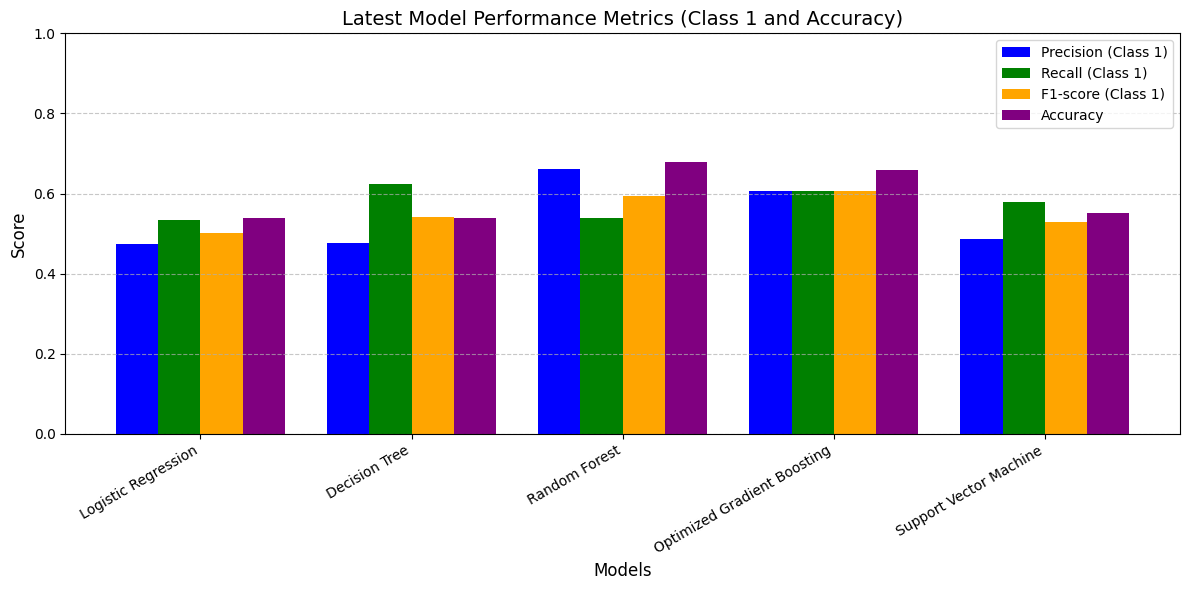

In [ ]:
# Construct summary data based strictly on the new output
summary_data_latest = {
    "Model": [
        "Logistic Regression",
        "Decision Tree",
        "Random Forest",
        "Optimized Gradient Boosting",
        "Support Vector Machine"
    ],
    "Precision (Class 1)": [0.4742, 0.4767, 0.6607, 0.6076, 0.4877],
    "Recall (Class 1)": [0.5349, 0.6250, 0.5378, 0.6076, 0.5785],
    "F1-score (Class 1)": [0.5027, 0.5409, 0.5929, 0.6076, 0.5293],
    "Accuracy": [0.5392, 0.5380, 0.6785, 0.6582, 0.5519]
}

# Create DataFrame
df_summary_latest = pd.DataFrame(summary_data_latest)

# Generate the bar chart for the latest performance summary

plt.figure(figsize=(12, 6))
metrics = ["Precision (Class 1)", "Recall (Class 1)", "F1-score (Class 1)", "Accuracy"]
bar_width = 0.2
x = range(len(df_summary_latest))

# Define color mapping
color_map = {
    "Precision (Class 1)": 'blue',
    "Recall (Class 1)": 'green',
    "F1-score (Class 1)": 'orange',
    "Accuracy": 'purple'
}

# Plot bars with assigned colors
for i, metric in enumerate(metrics):
    plt.bar(
        [p + i * bar_width for p in x],
        df_summary_latest[metric],
        width=bar_width,
        label=metric,
        color=color_map[metric]
    )

# Customize chart
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Latest Model Performance Metrics (Class 1 and Accuracy)", fontsize=14)
plt.xticks([p + 1.5 * bar_width for p in x], df_summary_latest["Model"], rotation=30, ha='right')
plt.ylim(0, 1)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()



## Do undersampling, oversampling, smote, Adaysn and train these models

In [68]:
X_train.shape

(5682, 27)

In [39]:
import numpy as np
import pandas as pd
import importlib
# from sklearn.neighbors import NearestNeighbors # No longer needed directly here
import random
# import math # Not directly needed here
from tqdm import tqdm # For progress bar

# --- IMPORTANT: Make sure tSmote.py is in the same directory ---
# --- or that its path is added to your Python environment ---
try:
    import tSmote as ts
    print("Successfully imported tSmote.py")
except ImportError:
    print("ERROR: Could not import tSmote.py. Make sure it's in the correct directory or Python path.")
    exit()
importlib.reload(ts)
# --- Configuration ---
RANDOM_SEED = 42
N_NEIGHBORS = 5 # K value for SMOTE, ensure N_NEIGHBORS < number of minority samples

# Seed setting - tSmote.py already sets np.random.seed(0) internally
# We might want to control the standard random module seed as well.
random.seed(RANDOM_SEED)
# Note: ts.generateTimePoints uses np.random internally, which is seeded to 0 in tSmote.py
# If you need different seeding for numpy within ts.generateTimePoints, you'd modify tSmote.py
# or re-seed numpy *just before* calling it, knowing it might affect reproducibility if
# other parts of your code rely on numpy's random state. For simplicity, we'll rely
# on the internal seed(0) for now, but be aware of this.
# np.random.seed(RANDOM_SEED) # Overridden by tSmote.py if imported after

# --- Load Your Data ---
# Placeholder - Replace with your actual data loading
print("Creating dummy data...")
n_samples = X_train.shape[0] # Use 35000 for your actual data
n_features = 27
n_timesteps = 72

minority_fraction = sum(y_train)/len(y_train)
n_minority = int(n_samples * minority_fraction)
n_majority = n_samples - n_minority

weather_data = standardized_data_3d_train
labels = y_train
np.random.shuffle(labels)

print(f"Dummy data shape: {weather_data.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Minority samples: {n_minority}, Majority samples: {n_majority}")
print("-" * 30)

# --- Separate Data by Class ---
minority_data = weather_data[labels == 1]
majority_data = weather_data[labels == 0]

n_min_samples = minority_data.shape[0]

if n_min_samples <= N_NEIGHBORS:
    # generateTimePoints might handle this by reducing k, but let's check upfront
    print(f"Warning: Number of minority samples ({n_min_samples}) is less than or equal to N_NEIGHBORS ({N_NEIGHBORS}). SMOTE behavior might be affected (k might be reduced internally).")
    if n_min_samples <= 1:
         raise ValueError(f"Cannot perform SMOTE with {n_min_samples} minority sample(s). Need at least 2.")


# --- Calculate Number of Synthetic Samples Needed ---
n_synthetic_needed = n_majority - n_min_samples
if n_synthetic_needed <= 0:
    print("Minority class is already balanced or larger. No oversampling needed.")
    synthetic_data_final = np.zeros((0, n_features, n_timesteps)) # Empty array
else:
    print(f"Need to generate {n_synthetic_needed} synthetic minority samples.")

print("-" * 30)


# --- Prepare Input Data Structure for generateTimePoints ---
# We need a list of lists, where each inner list contains the feature vectors
# for all minority samples at a specific time step.
minority_time_slices = []
print("Structuring minority data into time slices...")
for t in tqdm(range(n_timesteps), desc="Preparing Time Slices"):
    # Extract data for time step t: shape (n_minority_samples, n_features)
    data_slice_at_t = minority_data[:, :, t]
    # Convert to list of lists (as expected by generateTimePoints)
    minority_time_slices.append(data_slice_at_t.tolist())

print(f"Created {len(minority_time_slices)} time slices for minority data.")
print("-" * 30)


# --- Generate Synthetic Data using tSmote.generateTimePoints ---
if n_synthetic_needed > 0:
    print(f"Generating {n_synthetic_needed} synthetic samples per time step using ts.generateTimePoints...")
    # nPoints parameter is the number of synthetic samples PER time slice.
    # Since we want n_synthetic_needed *new series*, we generate this many per slice.
    # Note: generateTimePoints doesn't have a built-in progress bar for its internal loops.
    tSliceSyn = ts.generateTimePoints(minority_time_slices, nPoints=n_synthetic_needed, nNeighbors=N_NEIGHBORS)
    print("Synthetic data generation complete (using tSmote.py function).")
    print("-" * 30)

    # --- Reassemble Synthetic Data ---
    # Output tSliceSyn is List[List[List[float]]], specifically List_timeslice[List_synthetic_sample[List_features]]
    # Shape of tSliceSyn[t] is (n_synthetic_needed, n_features)
    print("Reassembling synthetic data...")
    synthetic_data_final = np.zeros((n_synthetic_needed, n_features, n_timesteps))

    for t in tqdm(range(n_timesteps), desc="Reassembling Data"):
        # Convert the inner list of lists to a numpy array and assign
        synthetic_data_final[:, :, t] = np.array(tSliceSyn[t])

    print(f"Shape of final synthetic data: {synthetic_data_final.shape}")
    print("-" * 30)

else: # Case where no synthetic samples were needed
    synthetic_data_final = np.zeros((0, n_features, n_timesteps))

# --- Combine Original Minority and Synthetic Data ---
oversampled_minority_data = np.concatenate((minority_data, synthetic_data_final), axis=0)
oversampled_minority_labels = np.ones(oversampled_minority_data.shape[0], dtype=int)

print(f"Shape of oversampled minority data: {oversampled_minority_data.shape}")

# --- (Optional) Combine with Majority Data ---
final_weather_data = np.concatenate((majority_data, oversampled_minority_data), axis=0)
final_labels = np.concatenate((labels[labels == 0], oversampled_minority_labels), axis=0)

# Optionally shuffle the final combined dataset
shuffle_indices = np.random.permutation(len(final_labels))
final_weather_data_2 = final_weather_data[shuffle_indices]
final_labels_2 = final_labels[shuffle_indices]

print(f"Shape of final balanced data: {final_weather_data_2.shape}")
print(f"Shape of final balanced labels: {final_labels_2.shape}")
print(f"Final class distribution: {np.bincount(final_labels_2)}")

# --- Now you can use 'final_weather_data' and 'final_labels' for your model training ---

Successfully imported tSmote.py
Creating dummy data...
Dummy data shape: (5682, 27, 72)
Labels shape: (5682,)
Minority samples: 2470, Majority samples: 3212
------------------------------
Need to generate 742 synthetic minority samples.
------------------------------
Structuring minority data into time slices...


Preparing Time Slices: 100%|██████████| 72/72 [00:00<00:00, 312.38it/s]


Created 72 time slices for minority data.
------------------------------
Generating 742 synthetic samples per time step using ts.generateTimePoints...
Using 12 worker processes.
Processing time slices in parallel...


Generating Synthetic Points:   0%|          | 0/72 [00:26<?, ?it/s]


KeyboardInterrupt: 

## Advanced deep learning models

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7893 entries, 0 to 7892
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   event_type                              7893 non-null   object 
 1   begin_date_time                         7893 non-null   object 
 2   cz_timezone                             7893 non-null   object 
 3   end_date_time                           7893 non-null   object 
 4   begin_lat                               7893 non-null   float64
 5   begin_lon                               7893 non-null   float64
 6   end_lat                                 7893 non-null   float64
 7   end_lon                                 7893 non-null   float64
 8   extreme                                 7893 non-null   int64  
 9   begin_date_utc                          7893 non-null   object 
 10  begin_time_utc                          7893 non-null   obje

In [41]:
X_full = df.copy()
X_train = X_full.loc[X_train.index]
X_val   = X_full.loc[X_val.index]
X_test  = X_full.loc[X_test.index]
X_train_new = X_train[X_train["event_type"].isin(["Flash Flood", "Flood","Heavy Rain"])].copy()
X_test_new = X_test[X_test["event_type"].isin(["Flash Flood", "Flood","Heavy Rain"])].copy()
X_val_new = X_val[X_val["event_type"].isin(["Flash Flood", "Flood","Heavy Rain"])].copy()

In [42]:
X_train_new.shape

(5590, 50)

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Dropout,
                                     LSTM, Dense, Input)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall, AUC
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model # Import Model for Functional API
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, BatchNormalization, Activation,
    LSTM, Bidirectional, Dropout, Dense, LeakyReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Import relevant metrics for classification, especially if data is imbalanced
from tensorflow.keras.metrics import Precision, Recall, AUC
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# --- Data Preparation ---
# Assume merged_df and meteo_cols are defined earlier in your code.
# For multi-class, we now use the "event_type" column.

# Encode the categorical labels to integer values
le = LabelEncoder()
y_encoded_train = le.fit_transform(X_train_new["event_type"].values)
y_encoded_val   = le.transform(X_val_new["event_type"].values)
y_encoded_test  = le.transform(X_test_new["event_type"].values)
# Number of classes (should be 10 based on provided counts)
num_classes = len(le.classes_)
print("numver of classes:", num_classes)
# Convert integer labels to one-hot encoded format
y_encoded_train = tf.keras.utils.to_categorical(y_encoded_train, num_classes=num_classes)
y_encoded_val   = tf.keras.utils.to_categorical(y_encoded_val, num_classes=num_classes)
y_encoded_test  = tf.keras.utils.to_categorical(y_encoded_test, num_classes=num_classes)

# Prepare features (assuming meteo_cols contains your meteorological data)
# Here we simulate stacking the data; adjust if your actual data preprocessing is different.
# X = np.stack(df[prev_cols].values.tolist(), axis=0)

X_train_new = np.stack(X_train_new[prev_cols].values.tolist(), axis=0)
X_val_new   = np.stack(X_val_new[prev_cols].values.tolist(), axis=0)
X_test_new  = np.stack(X_test_new[prev_cols].values.tolist(), axis=0)

# Scale the data
scaler = StandardScaler()

# Reshape for scaling: combine timesteps and features
X_train_new = X_train_new.reshape(-1, X_train_new.shape[-1])
X_test_new = X_test_new.reshape(-1, X_test_new.shape[-1])
X_val_new = X_val_new.reshape(-1, X_val_new.shape[-1])
# Fit and transform
X_train_new = scaler.fit_transform(X_train_new)
X_test_new = scaler.transform(X_test_new)
X_val_new = scaler.transform(X_val_new)
# Reshape back to original structure: (samples, num_features, num_timesteps)
# Note: Here we assume the original shape was (samples, num_features, num_timesteps).
# Adjust reshaping if your data dimensions differ.
X_train_new = X_train_new.reshape(-1, 27, 72)
X_test_new = X_test_new.reshape(-1, 27, 72)
X_val_new = X_val_new.reshape(-1, 27, 72)
# Print shapes to verify correctness (should print something like (samples, 27, 72) and (samples, num_classes))
print("X_train shape:", X_train_new.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val_new.shape)
# --- Reshape Input for Model ---
# Rearranging shape to (samples, timesteps, features), here timesteps=72 and features=27.
X_train_new = X_train_new.transpose(0, 2, 1)
X_test_new  = X_test_new.transpose(0, 2, 1)
X_val_new   = X_val_new.transpose(0, 2, 1)
num_timesteps = X_train_new.shape[1]  # should be 72
num_features  = X_train_new.shape[2]  # should be 27
input_layer = Input(shape=(num_timesteps, num_features))
# --- CNN Feature Extraction Block ---
# Conv Block 1
x = Conv1D(filters=64, kernel_size=3, padding='same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.01)(x) # Using LeakyReLU instead of ReLU
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x) # Increased dropout slightly

# Conv Block 2
x = Conv1D(filters=128, kernel_size=5, padding='same')(x) # Larger kernel, more filters
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.01)(x)
# Optional: Add another MaxPooling here if needed, depends on sequence length
# x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.3)(x)

# Conv Block 3
x = Conv1D(filters=128, kernel_size=7, padding='same')(x) # Even larger kernel
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.01)(x)
x = Dropout(0.3)(x)

# --- LSTM Sequence Processing Block ---
# Using Bidirectional LSTM adds complexity and captures dependencies in both directions
# Stacked BiLSTM layers
x = Bidirectional(LSTM(128, return_sequences=True))(x) # return_sequences=True for stacking
x = Dropout(0.4)(x) # Higher dropout for recurrent layers

x = Bidirectional(LSTM(64))(x) # Last LSTM layer doesn't need return_sequences=True
x = Dropout(0.4)(x)

# --- Dense Classification Block ---
# Intermediate Dense layer
x = Dense(64)(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.01)(x)
x = Dropout(0.5)(x) # Higher dropout before final layer

# Output layer
output_layer = Dense(3, activation='softmax')(x)

# Create the Model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model with potentially more informative metrics
# Consider a lower learning rate for potentially more complex models
optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       Precision(name='precision'),
                       Recall(name='recall')]) # AUC is good for binary classification

model.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# --- Class Weights ---
# To be added with more data
# Calculate class weights using the original integer labels (y_encoded)
# counts = np.bincount(y_encoded[train_test_split(range(len(y_encoded)), 
#                                                  test_size=0.2, random_state=42, stratify=y_encoded)[0]])
# # Ensure we compute weights for all classes
# if len(counts) == num_classes:
#     class_weight = {i: (1 / count) * (len(y_train)) / num_classes for i, count in enumerate(counts)}
#     print("Calculated Class Weights:", class_weight)
# else:
#     class_weight = None
#     print("Mismatch in class counts; skipping class weight computation.")

# --- Train the Model ---
epochs = 20
batch_size = 32

history = model.fit(X_train_new, y_encoded_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_new, y_encoded_val),
                    callbacks=[early_stopping, reduce_lr],
                    # class_weight=class_weight,To be added with more data
                    verbose=1)




numver of classes: 3
X_train shape: (5590, 27, 72)
y_train shape: (5682,)
X_val shape: (1395, 27, 72)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 72, 27)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 72, 64)         │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 72, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 36, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 36, 128)        │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 36, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 36, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 36, 256)        │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 36, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           19

 Total params: 598,659 (2.28 MB)

 Trainable params: 597,891 (2.28 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.4104 - loss: 1.4284 - precision: 0.4188 - recall: 0.3482 - val_accuracy: 0.4767 - val_loss: 1.1097 - val_precision: 0.5684 - val_recall: 0.4079 - learning_rate: 1.0000e-04
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.5240 - loss: 1.1282 - precision: 0.5425 - recall: 0.4687 - val_accuracy: 0.5520 - val_loss: 1.0673 - val_precision: 0.5882 - val_recall: 0.4853 - learning_rate: 1.0000e-04
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.5496 - loss: 1.0413 - precision: 0.5680 - recall: 0.4860 - val_accuracy: 0.6172 - val_loss: 0.9327 - val_precision: 0.6395 - val_recall: 0.5670 - learning_rate: 1.0000e-04
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - accuracy: 0.5935 - loss: 0.9630 - precision: 0.6176 - recall: 0.5272 - val_accuracy: 0.5921 - val_loss: 0.9889 - val_precision: 0.6234 - val_recall: 0.5505 - learning_rate: 1.0000e-04
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 

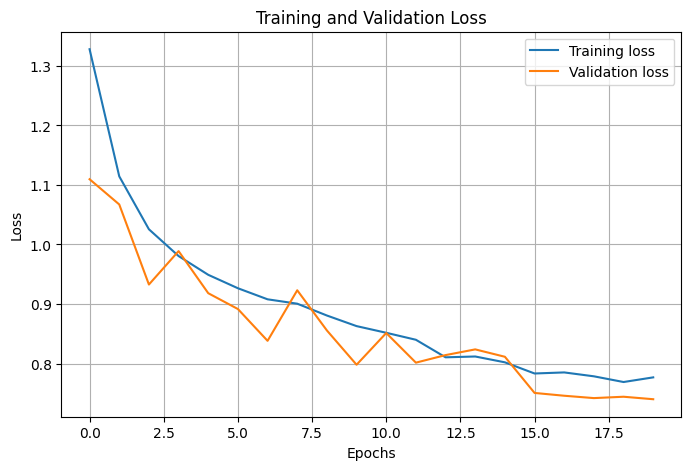

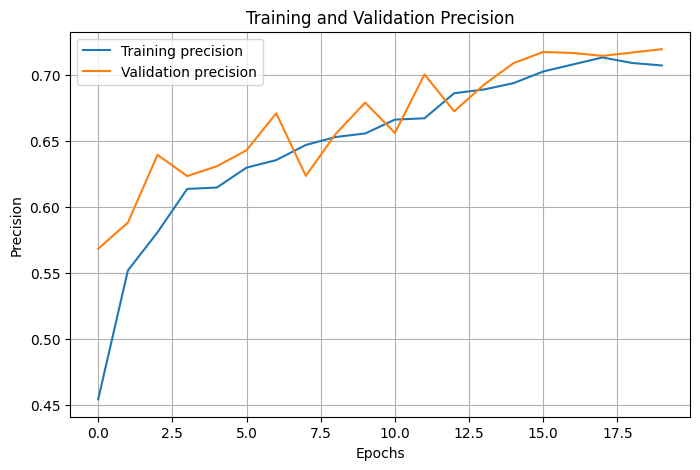

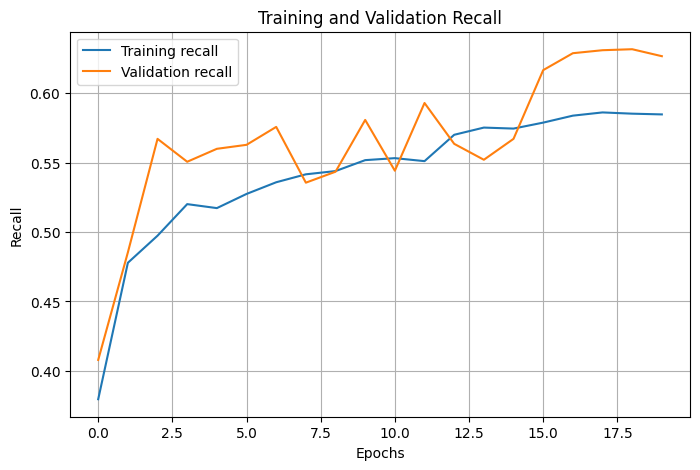

In [44]:
history.history.keys()
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_metric(history, 'loss')
plot_metric(history, 'precision')
plot_metric(history, 'recall')


In [45]:
# --- Evaluate the Model ---
print("\nEvaluating model on test set:")
results = model.evaluate(X_test_new, y_encoded_test, batch_size=batch_size, verbose=1)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Evaluating model on test set:
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6720 - loss: 0.7193 - precision: 0.6915 - recall: 0.6131
Test Loss: 0.7231
Test Accuracy: 0.6803
Test Precision: 0.7026
Test Recall: 0.6253


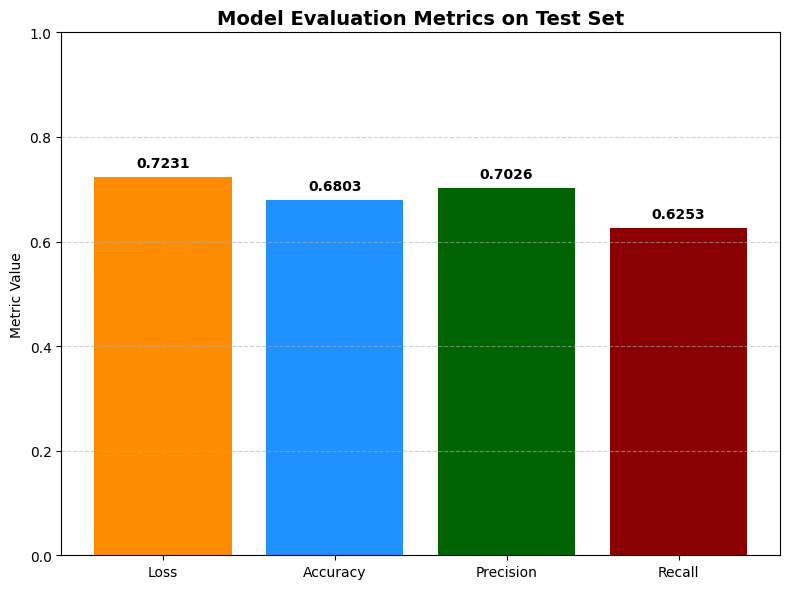

In [16]:
import matplotlib.pyplot as plt

# Test evaluation metrics
metrics = {
    "Loss": 0.7231,
    "Accuracy": 0.6803,
    "Precision": 0.7026,
    "Recall": 0.6253
}

# Use darker colors for better visibility
colors = ["#FF8C00", "#1E90FF", "#006400", "#8B0000"]  # dark orange, dodger blue, dark green, dark red

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics.keys(), metrics.values(), color=colors)

# Add metric values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add titles and labels
plt.title("Model Evaluation Metrics on Test Set", fontsize=14, fontweight='bold')
plt.ylabel("Metric Value")
plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


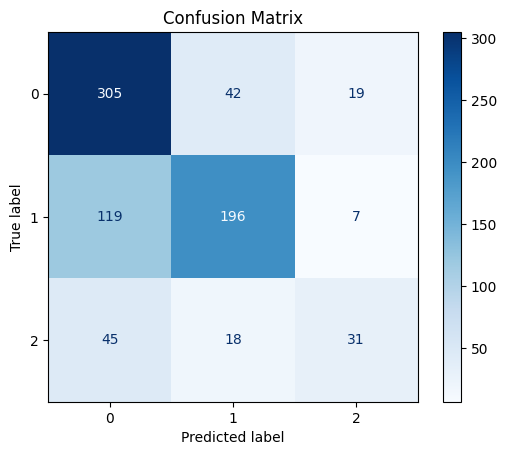

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict class labels
y_pred_probs = model.predict(X_test_new)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_encoded_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


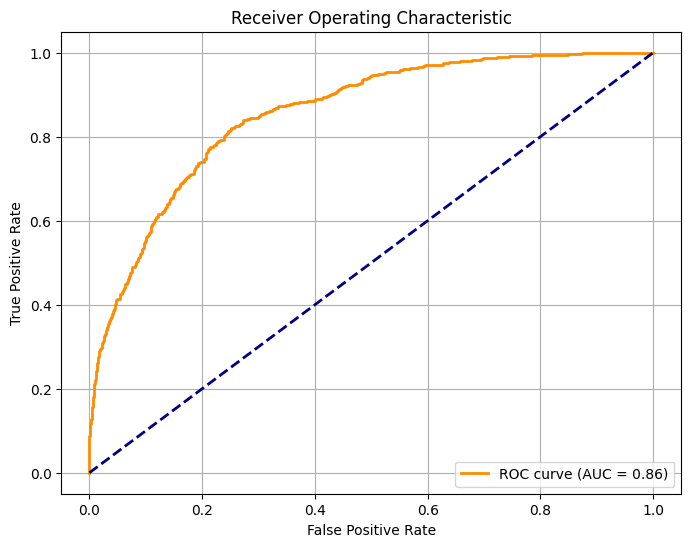

In [47]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_probs = model.predict(X_test_new).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_encoded_test.ravel(), y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### model with residual connections and more CNN layers

In [48]:

# --- CNN Feature Extraction Block ---
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, LeakyReLU, MaxPooling1D, Dropout, Add, Dense, Bidirectional, LSTM, GlobalAveragePooling1D, Attention
from tensorflow.keras.optimizers import Adam



# --- Conv Block 1 ---
conv1 = Conv1D(filters=64, kernel_size=3, padding='same')(input_layer)
conv1 = BatchNormalization()(conv1)
conv1 = LeakyReLU(alpha=0.01)(conv1)  # using LeakyReLU instead of ReLU
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Dropout(0.3)(conv1)

# --- Conv Block 2 ---
conv2 = Conv1D(filters=128, kernel_size=5, padding='same')(conv1)  # larger kernel, more filters
conv2 = BatchNormalization()(conv2)
conv2 = LeakyReLU(alpha=0.01)(conv2)
conv2 = Dropout(0.3)(conv2)

# --- Residual Connection ---
# Adjust conv1 dimensions to match conv2 via 1x1 convolution
shortcut = Conv1D(filters=128, kernel_size=1, padding='same')(conv1)
shortcut = BatchNormalization()(shortcut)
res = Add()([conv2, shortcut])

# --- Conv Block 3 ---
conv3 = Conv1D(filters=128, kernel_size=7, padding='same')(res)  # even larger kernel
conv3 = BatchNormalization()(conv3)
conv3 = LeakyReLU(alpha=0.01)(conv3)
conv3 = Dropout(0.3)(conv3)

# --- LSTM Sequence Processing Block ---
# Stacked Bidirectional LSTM with return_sequences=True to retain the full sequence output
x = Bidirectional(LSTM(128, return_sequences=True))(conv3)
x = Dropout(0.4)(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Dropout(0.4)(x)

# --- Attention Mechanism ---
# Using Keras built-in Attention layer for self-attention over the LSTM outputs.
# It takes [query, value] where both are the same in self-attention.
attn_out = Attention()([x, x])
# Global average pooling aggregates the attended sequence into a fixed-size vector.
x = GlobalAveragePooling1D()(attn_out)

# --- Dense Classification Block ---
x = Dense(64)(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.01)(x)
x = Dropout(0.5)(x)

# --- Output Layer ---
output_layer = Dense(3, activation='softmax')(x)

# --- Build and Compile the Model ---
model_1 = Model(inputs=input_layer, outputs=output_layer)

optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
model_1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

model_1.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# --- Class Weights ---
# Calculate class weights using the original integer labels (y_encoded)
# counts = np.bincount(y_encoded[train_test_split(range(len(y_encoded)), 
#                                                  test_size=0.2, random_state=42, stratify=y_encoded)[0]])
# # Ensure we compute weights for all classes
# if len(counts) == num_classes:
#     class_weight = {i: (1 / count) * (len(y_train)) / num_classes for i, count in enumerate(counts)}
#     print("Calculated Class Weights:", class_weight)
# else:
#     class_weight = None
#     print("Mismatch in class counts; skipping class weight computation.")

# --- Train the Model ---
epochs = 20
batch_size = 32





Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 72, 27)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 72, 64)    │      5,248 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 64)    │        256 │ conv1d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_4       │ (None, 72, 64)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 36, 64)    │          0 │ leaky_re_lu_4[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 36, 64)    │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 36, 128)   │     41,088 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 128)   │        512 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 36, 128)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 36, 128)   │      8,320 │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 36, 128)   │          0 │ leaky_re_lu_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 128)   │        512 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 36, 128)   │          0 │ dropout_7[0][0],  │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 36, 128)   │    114,816 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 128)   │        512 │ conv1d_6[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 36, 128)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 36, 128)   │          0 │ leaky_re_lu_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 36, 256)   │    263,168 │ dropout_8[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 36, 256)   │          0 │ bidirectional_2[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 607,491 (2.32 MB)

 Trainable params: 606,467 (2.31 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [49]:

history_1 = model_1.fit(X_train_new, y_encoded_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_new, y_encoded_val),
                    callbacks=[early_stopping, reduce_lr],
                    # class_weight=class_weight,
                    verbose=1)

Epoch 1/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 178s 986ms/step - accuracy: 0.3938 - loss: 1.4393 - precision: 0.4035 - recall: 0.3273 - val_accuracy: 0.4889 - val_loss: 1.0213 - val_precision: 0.6617 - val_recall: 0.0953 - learning_rate: 1.0000e-04
Epoch 2/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - accuracy: 0.5155 - loss: 1.1471 - precision: 0.5490 - recall: 0.4425 - val_accuracy: 0.5656 - val_loss: 0.9673 - val_precision: 0.5898 - val_recall: 0.4968 - learning_rate: 1.0000e-04
Epoch 3/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.5680 - loss: 1.0261 - precision: 0.6046 - recall: 0.4896 - val_accuracy: 0.6022 - val_loss: 0.9125 - val_precision: 0.6277 - val_recall: 0.5319 - learning_rate: 1.0000e-04
Epoch 4/20
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 71ms/step - accuracy: 0.5789 - loss: 0.9833 - precision: 0.6136 - recall: 0.4978 - val_accuracy: 0.6194 - val_loss: 0.9384 - val_precision: 0.6518 - val_recall: 0.5663 - learning_rate: 1.0000e-04
Epoch 5/20
175/175 ━━━━━━━━━━━━━━━━━━━

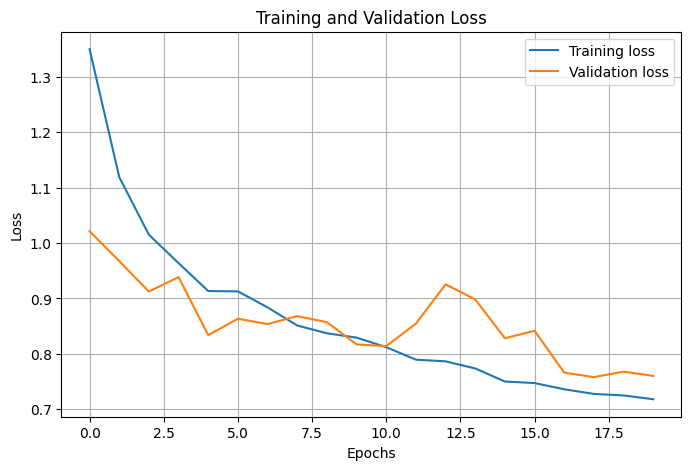

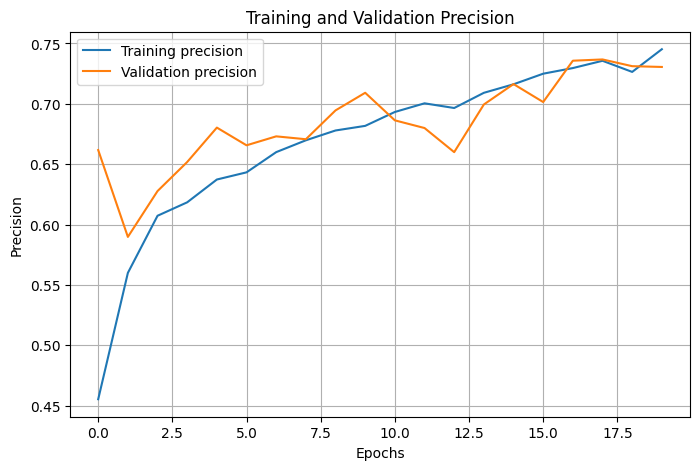

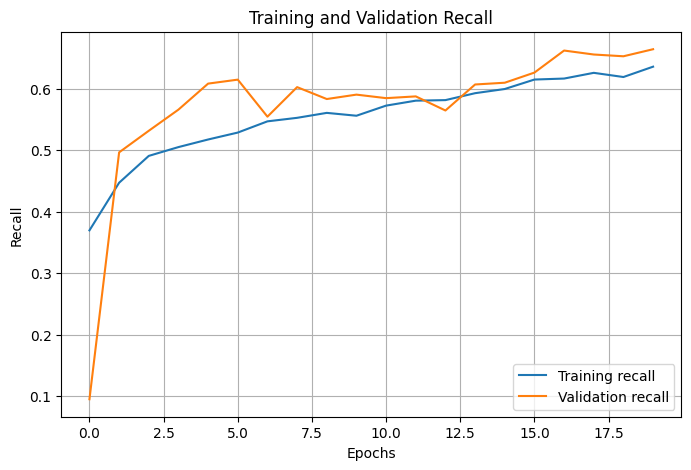

In [50]:
# Example usage:
plot_metric(history_1, 'loss')
plot_metric(history_1, 'precision')
plot_metric(history_1, 'recall')

In [52]:
# --- Evaluate the Model ---
print("\nEvaluating model on test set:")
results = model_1.evaluate(X_test_new, y_encoded_test, batch_size=batch_size, verbose=1)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Evaluating model on test set:
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6870 - loss: 0.7003 - precision: 0.7119 - recall: 0.6294
Test Loss: 0.6969
Test Accuracy: 0.7110
Test Precision: 0.7457
Test Recall: 0.6598


In [21]:
def calculate_f1(precision, recall):
    if precision + recall == 0:
        return 0  # Avoid division by zero
    return 2 * (precision * recall) / (precision + recall)

# Example usage
precision = 0.7457
recall = 0.6598

f1_score = calculate_f1(precision, recall)
print(f"F1-Score: {f1_score:.4f}")


F1-Score: 0.7001


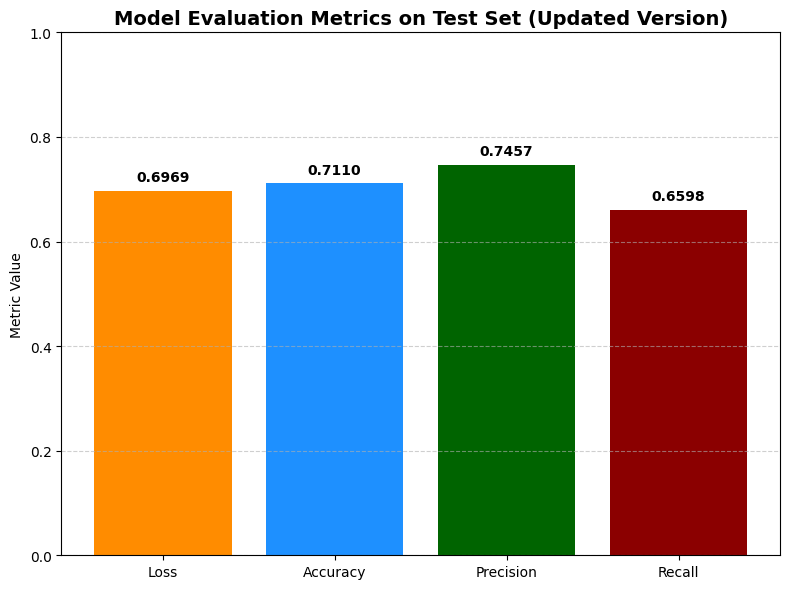

In [17]:
import matplotlib.pyplot as plt

# Updated test evaluation metrics
metrics_v2 = {
    "Loss": 0.6969,
    "Accuracy": 0.7110,
    "Precision": 0.7457,
    "Recall": 0.6598
}

# Use the same dark colors
colors_v2 = ["#FF8C00", "#1E90FF", "#006400", "#8B0000"]  # dark orange, dodger blue, dark green, dark red

# Create the bar chart
plt.figure(figsize=(8, 6))
bars_v2 = plt.bar(metrics_v2.keys(), metrics_v2.values(), color=colors_v2)

# Add metric values on top of the bars
for bar in bars_v2:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add titles and labels
plt.title("Model Evaluation Metrics on Test Set (Updated Version)", fontsize=14, fontweight='bold')
plt.ylabel("Metric Value")
plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


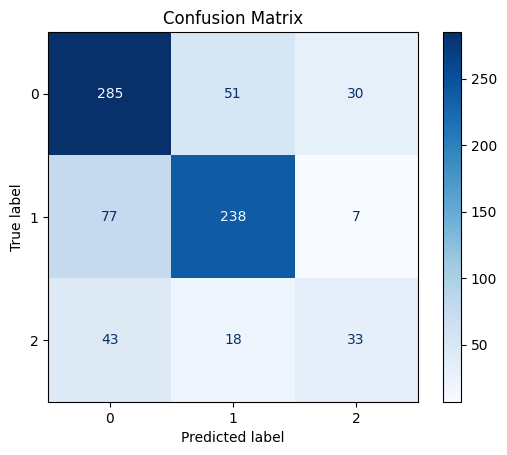

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict class labels
y_pred_probs = model_1.predict(X_test_new)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_encoded_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


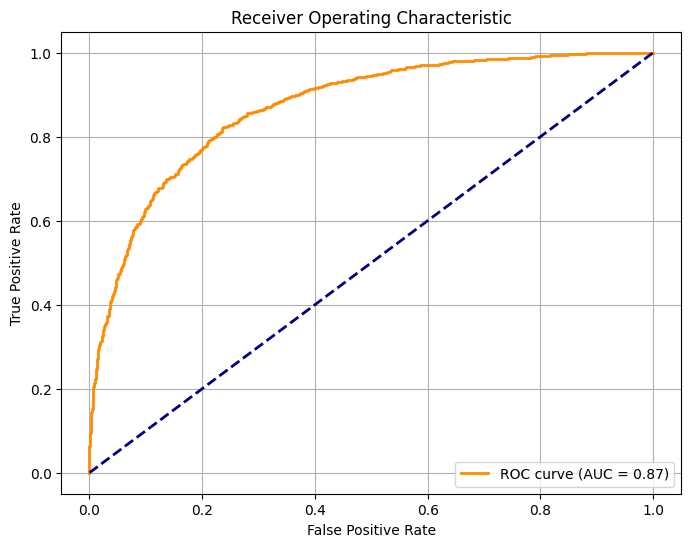

In [54]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_pred_probs = model_1.predict(X_test_new).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_encoded_test.ravel(), y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


#### Trying random over sampler

In [55]:
X_full = df.copy()
X_train = X_full.loc[X_train.index]
X_val   = X_full.loc[X_val.index]
X_test  = X_full.loc[X_test.index]
X_train_new = X_train[X_train["event_type"].isin(["Flash Flood", "Flood","Heavy Rain"])].copy()
X_test_new = X_test[X_test["event_type"].isin(["Flash Flood", "Flood","Heavy Rain"])].copy()
X_val_new = X_val[X_val["event_type"].isin(["Flash Flood", "Flood","Heavy Rain"])].copy()

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Dropout,
                                     LSTM, Dense, Input)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall, AUC
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model # Import Model for Functional API
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, BatchNormalization, Activation,
    LSTM, Bidirectional, Dropout, Dense, LeakyReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Import relevant metrics for classification, especially if data is imbalanced
from tensorflow.keras.metrics import Precision, Recall, AUC
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)



y_bin_train = X_full.loc[X_train_new.index]["extreme"].values
y_bin_test  = X_full.loc[X_test_new.index]["extreme"].values
y_bin_val   = X_full.loc[X_val_new.index]["extreme"].values
# Prepare features (assuming meteo_cols contains your meteorological data)

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Apply the oversampling to the dataset
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversample.fit_resample(X_train_new,y_bin_train)


X_resampled = np.stack(X_resampled[prev_cols].values.tolist(), axis=0)
X_test_new = np.stack(X_test_new[prev_cols].values.tolist(), axis=0)
X_val_new = np.stack(X_val_new[prev_cols].values.tolist(), axis=0)
# Initialize the RandomOverSampler

print("peecentage of positice instance in training data: ", sum(y_resampled)/len(y_resampled))
print("percentage of positice instance in test data: ", sum(y_bin_test)/len(y_bin_test))
print("percentage of positice instance in validation data: ", sum(y_bin_val)/len(y_bin_val))

print("y resampled shape:", y_resampled.shape)
# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))
# Scale the data
scaler = StandardScaler()

# Reshape for scaling: combine timesteps and features
X_resampled = X_resampled.reshape(-1, X_resampled.shape[-1])
X_test_new = X_test_new.reshape(-1, X_test_new.shape[-1])
X_val_new = X_val_new.reshape(-1, X_val_new.shape[-1])
# Fit and transform
print("X resampled shape before scaling:", X_resampled.shape)
X_resampled = scaler.fit_transform(X_resampled)
X_test_new = scaler.transform(X_test_new)
X_val_new = scaler.transform(X_val_new)
# Reshape back to original structure: (samples, num_features, num_timesteps)
# Note: Here we assume the original shape was (samples, num_features, num_timesteps).
# Adjust reshaping if your data dimensions differ.
X_resampled = X_resampled.reshape(-1, 27, 72)
X_test_new = X_test_new.reshape(-1, 27, 72)
X_val_new = X_val_new.reshape(-1, 27, 72)
# Print shapes to verify correctness (should print something like (samples, 27, 72) and (samples, num_classes))
print("X_train shape:", X_resampled.shape)
print("y_train shape:", y_resampled.shape)

# --- Reshape Input for Model ---
# Rearranging shape to (samples, timesteps, features), here timesteps=72 and features=27.
X_resampled = X_resampled.transpose(0, 2, 1)
X_test_new  = X_test_new.transpose(0, 2, 1)
X_val_new = X_val_new.transpose(0, 2, 1)
num_timesteps = X_resampled.shape[1]  # should be 72
num_features  = X_resampled.shape[2]  # should be 27
input_layer = Input(shape=(num_timesteps, num_features))
# --- CNN Feature Extraction Block ---
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, LeakyReLU, MaxPooling1D, Dropout, Add, Dense, Bidirectional, LSTM, GlobalAveragePooling1D, Attention
from tensorflow.keras.optimizers import Adam






# --- Shared Conv Block 1 ---
conv1 = Conv1D(filters=64, kernel_size=3, padding='same')(input_layer)
conv1 = BatchNormalization()(conv1)
conv1 = LeakyReLU(alpha=0.01)(conv1)
conv1 = MaxPooling1D(pool_size=2)(conv1)
conv1 = Dropout(0.3)(conv1)

# --- Shared Conv Block 2 ---
conv2 = Conv1D(filters=128, kernel_size=5, padding='same')(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = LeakyReLU(alpha=0.01)(conv2)
conv2 = Dropout(0.3)(conv2)

# --- Residual Connection from Conv Block 1 ---
shortcut = Conv1D(filters=128, kernel_size=1, padding='same')(conv1)
shortcut = BatchNormalization()(shortcut)
res = Add()([conv2, shortcut])

# --- Shared Conv Block 3 ---
conv3 = Conv1D(filters=128, kernel_size=7, padding='same')(res)
conv3 = BatchNormalization()(conv3)
conv3 = LeakyReLU(alpha=0.01)(conv3)
conv3 = Dropout(0.3)(conv3)

# --- Shared LSTM Sequence Processing Block ---
x = Bidirectional(LSTM(128, return_sequences=True))(conv3)
x = Dropout(0.4)(x)
x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = Dropout(0.4)(x)

# --- Shared Attention Mechanism ---
# Using built-in Keras Attention layer (self-attention)
attn_out = Attention()([x, x])
# Aggregate attended features into a fixed-size vector
shared_features = GlobalAveragePooling1D()(attn_out)

# --- Event Type Classification Head ---
event_branch = Dense(64)(shared_features)
event_branch = BatchNormalization()(event_branch)
event_branch = LeakyReLU(alpha=0.01)(event_branch)
event_branch = Dropout(0.5)(event_branch)
event_output = Dense(3, activation='softmax', name='event_type')(event_branch)

# --- Extreme Event Classification Head ---
extreme_branch = Dense(64)(shared_features)
extreme_branch = BatchNormalization()(extreme_branch)
extreme_branch = LeakyReLU(alpha=0.01)(extreme_branch)
extreme_branch = Dropout(0.5)(extreme_branch)
extreme_output = Dense(1, activation='sigmoid', name='extreme')(extreme_branch)

# --- Create and Compile the Multi-task Model ---
model = Model(inputs=input_layer, outputs=extreme_output)

optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
# model.compile(optimizer=optimizer,
#               loss={'event_type': 'categorical_crossentropy', 'extreme': 'binary_crossentropy'},
#               metrics={'event_type': ['accuracy'], 'extreme': [tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]})

model.compile(optimizer=optimizer,
              loss={'extreme': 'binary_crossentropy'},
              metrics={'extreme': [tf.keras.metrics.Accuracy(name='accuracy'), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),  tf.keras.metrics.AUC(name='roc_auc'), tf.keras.metrics.AUC(curve='PR', name='pr_auc') ]})

model.summary()

# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# --- Class Weights ---
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    'balanced',   # This option adjusts weights inversely proportional to class frequencies in the input data
    classes=np.unique(y_resampled),  # List of unique class labels
    y=y_resampled  # Your target variable (e.g., labels)
)

# Convert class_weights to a dictionary format
class_weight = dict(zip(np.unique(y_resampled), class_weights))
# --- Train the Model ---
epochs = 20
batch_size = 32
print("y resampe shape", y_resampled.shape)





peecentage of positice instance in training data:  0.5
percentage of positice instance in test data:  0.4322250639386189
percentage of positice instance in validation data:  0.43082437275985663
y resampled shape: (6384,)
Class distribution after oversampling: Counter({np.int64(1): 3192, np.int64(0): 3192})
X resampled shape before scaling: (172368, 72)
X_train shape: (6384, 27, 72)
y_train shape: (6384,)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 72, 27)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 72, 64)    │      5,248 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 64)    │        256 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_8       │ (None, 72, 64)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 36, 64)    │          0 │ leaky_re_lu_8[0]… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 36, 64)    │          0 │ max_pooling1d_2[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 36, 128)   │     41,088 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 128)   │        512 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_9       │ (None, 36, 128)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 36, 128)   │      8,320 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 36, 128)   │          0 │ leaky_re_lu_9[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 128)   │        512 │ conv1d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 36, 128)   │          0 │ dropout_13[0][0], │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 36, 128)   │    114,816 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 128)   │        512 │ conv1d_10[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_10      │ (None, 36, 128)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 36, 128)   │          0 │ leaky_re_lu_10[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_4     │ (None, 36, 256)   │    263,168 │ dropout_14[0][0]  │
│ (Bidirectional)     │                   │            │                 

 Total params: 607,361 (2.32 MB)

 Trainable params: 606,337 (2.31 MB)

 Non-trainable params: 1,024 (4.00 KB)

y resampe shape (6384,)


In [57]:

history_2 = model.fit(X_resampled, y_resampled,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_new, y_bin_val),
                    callbacks=[early_stopping, reduce_lr],
                    # class_weight=class_weight,
                    verbose=1)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 74ms/step - accuracy: 0.0000e+00 - loss: 0.9343 - pr_auc: 0.5203 - precision: 0.5564 - recall: 0.2035 - roc_auc: 0.5438 - val_accuracy: 0.0000e+00 - val_loss: 0.6786 - val_pr_auc: 0.5040 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_roc_auc: 0.5856 - learning_rate: 1.0000e-04
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 68ms/step - accuracy: 0.0000e+00 - loss: 0.8224 - pr_auc: 0.5440 - precision: 0.5499 - recall: 0.3203 - roc_auc: 0.5706 - val_accuracy: 0.0000e+00 - val_loss: 0.6825 - val_pr_auc: 0.5279 - val_precision: 0.6269 - val_recall: 0.0699 - val_roc_auc: 0.6097 - learning_rate: 1.0000e-04
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 71ms/step - accuracy: 0.0000e+00 - loss: 0.7592 - pr_auc: 0.5671 - precision: 0.5712 - recall: 0.4285 - roc_auc: 0.5935 - val_accuracy: 0.0000e+00 - val_loss: 0.7312 - val_pr_auc: 0.5874 - val_precision: 0.7350 - val_recall: 0.1431 - val_roc_auc: 0.6626 - learning_rate: 1.0000e-04
Epoch 4/20
200

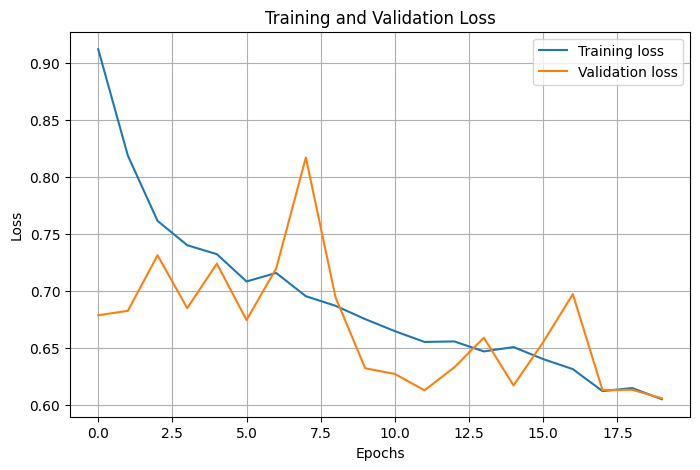

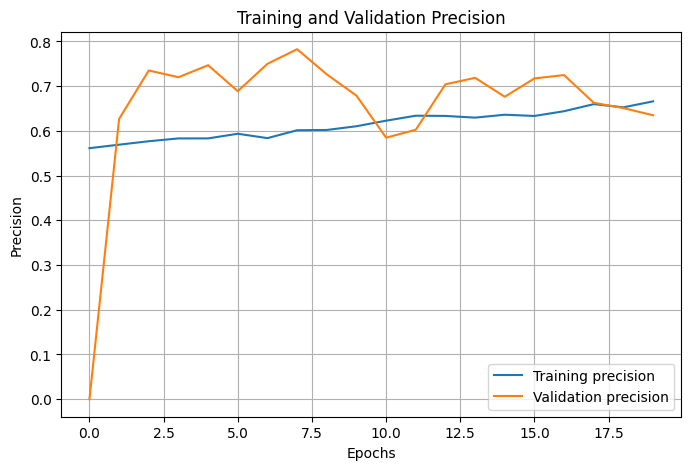

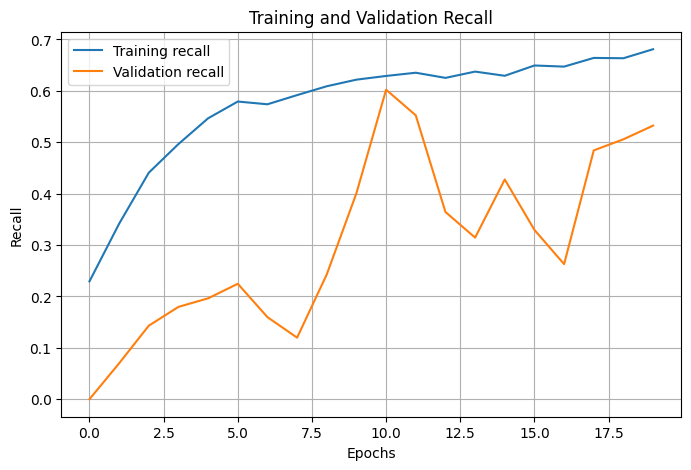

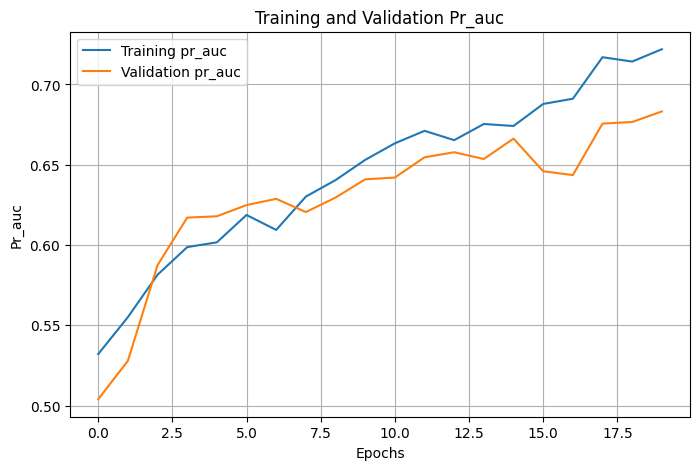

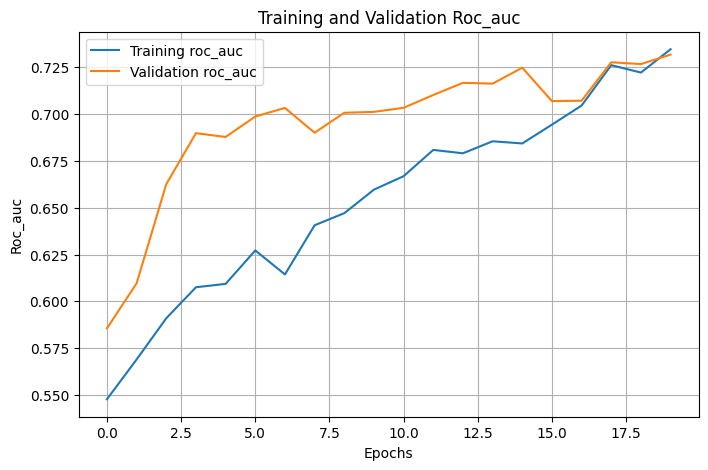

In [59]:
# Example usage:
plot_metric(history_2, 'loss')
plot_metric(history_2, 'precision')
plot_metric(history_2, 'recall')
plot_metric(history_2, 'pr_auc')
plot_metric(history_2, 'roc_auc')


In [60]:
# --- Evaluate the Model ---
print("\nEvaluating model on test set:")
results = model.evaluate(X_test_new, y_bin_test, batch_size=batch_size, verbose=1)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Evaluating model on test set:
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.0000e+00 - loss: 0.6085 - pr_auc: 0.6548 - precision: 0.6170 - recall: 0.5754 - roc_auc: 0.7266
Test Loss: 0.6182
Test Accuracy: 0.0000
Test Precision: 0.6250
Test Recall: 0.5473


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


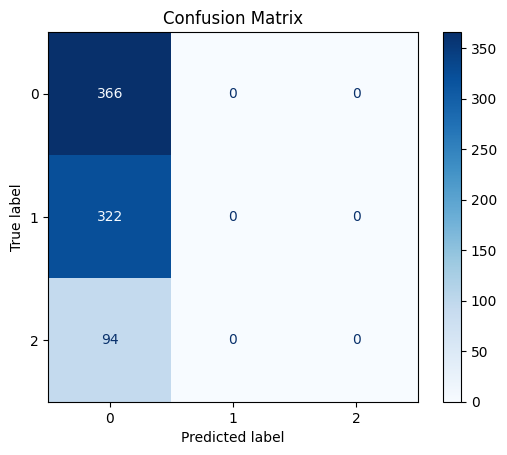

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict class labels
y_pred_probs = model.predict(X_test_new)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_encoded_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


#### Finding optmial threshold

In [85]:

from sklearn.metrics import (precision_score, recall_score, f1_score,
                             roc_auc_score, accuracy_score, roc_curve,)
# After training, find optimal threshold for F1 score instead of default 0.5
def find_optimal_threshold(model, x_val, y_val):
    y_pred_prob = model.predict(x_val)
    
    best_f1 = 0
    best_threshold = 0.5
    
    for threshold in np.arange(0.1, 0.9, 0.01):
        y_pred = (y_pred_prob > threshold).astype(int)
        precision = tf.keras.metrics.Precision()(y_val, y_pred).numpy()
        recall = tf.keras.metrics.Recall()(y_val, y_pred).numpy()
        
        if precision + recall > 0:  # Avoid division by zero
            f1 = 2 * (precision * recall) / (precision + recall)
            if f1 > best_f1:
                best_f1 = f1
                best_threshold = threshold
    
    print(f"Optimal threshold: {best_threshold}, F1 score: {best_f1:.4f}")
    return best_threshold

# Use the optimal threshold for final predictions
optimal_threshold = find_optimal_threshold(model_1, X_val_new, y_bin_val)
y_pred = (model.predict(X_test_new) > optimal_threshold).astype(int)

precision = precision_score(y_bin_test, y_pred)
recall = recall_score(y_bin_test, y_pred)
f1 = f1_score(y_bin_test, y_pred)
roc_auc = roc_auc_score(y_bin_test, y_pred)
accuracy = accuracy_score(y_bin_test, y_pred)

# 4. Display the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")

# 5. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_bin_test, y_pred)

# 6. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 7. Compute confusion matrix
cm = confusion_matrix(y_bin_test, y_pred)

# 8. Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


InvalidArgumentError: {{function_node __wrapped__LogicalAnd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [1,1395] vs. [1,4185] [Op:LogicalAnd] name: 

## Trying Transformer with TCN block

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv1D, BatchNormalization, LeakyReLU, ReLU, Add, Dropout,
                                     Dense, GlobalAveragePooling1D, LayerNormalization, MultiHeadAttention,
                                     Layer, Embedding, Input, SpatialDropout1D)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import math
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv1D, BatchNormalization, LeakyReLU, ReLU, Add, Dropout,
                                     Dense, GlobalAveragePooling1D, LayerNormalization, MultiHeadAttention,
                                     Layer, Embedding, Input, SpatialDropout1D)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import math

# --- Shared Configuration ---
INPUT_SHAPE = (72, 27) # (time_steps, num_features)
NUM_CLASSES = 1        # Binary classification for 'extreme'
LEARNING_RATE = 1e-4
CLIPNORM = 1.0

# --- Metrics (same as your last model) ---
METRICS = [
    tf.keras.metrics.Accuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='roc_auc'),
    tf.keras.metrics.AUC(curve='PR', name='pr_auc')
]
# --- TCN Residual Block ---
def TCNBlock(input_tensor, filters, kernel_size, dilation_rate, dropout_rate=0.2, activation='relu'):
    """A single TCN residual block."""
    # Ensure causal padding
    conv1 = Conv1D(filters=filters, kernel_size=kernel_size, dilation_rate=dilation_rate,
                   padding='causal', kernel_initializer='he_normal')(input_tensor)
    # Using LayerNorm instead of BatchNorm is sometimes preferred in sequence models
    norm1 = LayerNormalization()(conv1)
    # Using ReLU is more common in TCN literature than LeakyReLU
    act1 = ReLU()(norm1) if activation == 'relu' else LeakyReLU(alpha=0.01)(norm1)
    drop1 = SpatialDropout1D(dropout_rate)(act1) # SpatialDropout drops entire feature maps

    conv2 = Conv1D(filters=filters, kernel_size=kernel_size, dilation_rate=dilation_rate,
                   padding='causal', kernel_initializer='he_normal')(drop1)
    norm2 = LayerNormalization()(conv2)
    act2 = ReLU()(norm2) if activation == 'relu' else LeakyReLU(alpha=0.01)(norm2)
    drop2 = SpatialDropout1D(dropout_rate)(act2)

    # Residual connection (project input if number of filters differs)
    if input_tensor.shape[-1] != filters:
        shortcut = Conv1D(filters=filters, kernel_size=1, padding='same', kernel_initializer='he_normal')(input_tensor)
    else:
        shortcut = input_tensor

    res = Add()([shortcut, drop2])
    # Optional: Activation after Add (some TCN versions do, some don't)
    # res = ReLU()(res) if activation == 'relu' else LeakyReLU(alpha=0.01)(res)
    return res

# --- Build the TCN Model ---
def build_tcn_model(input_shape, num_classes, num_tcn_blocks=4, filters=64,
                      kernel_size=3, dropout_rate=0.2, final_dropout=0.5):
    """Builds the TCN model."""
    input_layer = Input(shape=input_shape)
    x = input_layer

    # Stack TCN Blocks with increasing dilation
    for i in range(num_tcn_blocks):
        dilation_rate = 2**i
        # Increase filters in deeper layers (optional)
        current_filters = filters * (2**(i // 2)) # e.g., 64, 64, 128, 128
        x = TCNBlock(x, filters=current_filters, kernel_size=kernel_size,
                     dilation_rate=dilation_rate, dropout_rate=dropout_rate)

    # Aggregate features over time
    x = GlobalAveragePooling1D()(x) # Or use x = x[:, -1, :] to take the last time step output

    # Classification Head
    x = Dense(64)(x)
    x = LayerNormalization()(x) # Using LayerNorm here too
    x = LeakyReLU(alpha=0.01)(x)
    x = Dropout(final_dropout)(x)
    output_layer = Dense(num_classes, activation='sigmoid', name='extreme')(x) # Sigmoid for binary

    model = Model(inputs=input_layer, outputs=output_layer)
    return model

# --- Create and Compile TCN Model ---
print("--- Building TCN Model ---")
tcn_model = build_tcn_model(
    input_shape=INPUT_SHAPE,
    num_classes=NUM_CLASSES,
    num_tcn_blocks=4, # Adjust number of blocks
    filters=64,       # Starting filters
    kernel_size=3,    # Kernel size for TCN blocks
    dropout_rate=0.2, # Dropout within TCN blocks
    final_dropout=0.5 # Dropout in the final classification head
)

optimizer_tcn = Adam(learning_rate=LEARNING_RATE, clipnorm=CLIPNORM)
tcn_model.compile(optimizer=optimizer_tcn,
                  loss='binary_crossentropy',
                  metrics=METRICS)

tcn_model.summary()
# --- Positional Encoding ---
# Necessary for Transformers to understand sequence order
class PositionalEncoding(Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'position': self.pos_encoding.shape[1],
             'd_model': self.pos_encoding.shape[2],
         })
        return config

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(np.arange(position)[:, np.newaxis],
                                     np.arange(d_model)[np.newaxis, :],
                                     d_model)
        # apply sin to even indices in the array; 2i
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        # apply cos to odd indices in the array; 2i+1
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def get_angles(self, pos, i, d_model):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        return pos * angle_rates

    def call(self, inputs):
        seq_len = tf.shape(inputs)[1]
        # Ensure positional encoding is not longer than the input sequence
        return inputs + self.pos_encoding[:, :seq_len, :]


# --- Transformer Encoder Block ---
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim // num_heads) # Adjusted key_dim
        # Feed Forward Network
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim),] # Use ReLU common in Transformers
        )
        # Layer Normalization
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        # Dropout
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
             'embed_dim': self.ffn.layers[1].units, # Get embed_dim from dense layer output
             'num_heads': self.att.num_heads,
             'ff_dim': self.ffn.layers[0].units, # Get ff_dim from dense layer units
             'dropout_rate': self.dropout1.rate # Assuming dropout rates are the same
         })
        return config

    def call(self, inputs, training=False):
        # Multi-Head Attention
        attn_output = self.att(inputs, inputs) # Self-attention
        # Dropout and Residual Connection
        out1 = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + out1)
        # Feed Forward Network
        ffn_output = self.ffn(out1)
        # Dropout and Residual Connection
        out2 = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + out2)
        return out2


# --- Build the Transformer Model ---
def build_transformer_model(input_shape, num_classes, num_transformer_blocks,
                             embed_dim, num_heads, ff_dim, dropout_rate=0.1,
                             final_dropout=0.5, mlp_units=64):
    """Builds the Transformer Encoder model."""
    time_steps = input_shape[0]
    num_features = input_shape[1]
    inputs = Input(shape=input_shape)

    # 1. Input Embedding/Projection
    # Project input features (27) to the embedding dimension (e.g., 128)
    # Using Conv1D allows mixing features across channels at each time step
    x = Conv1D(filters=embed_dim, kernel_size=1, activation='relu')(inputs)
    # Or use TimeDistributed Dense:
    # x = TimeDistributed(Dense(embed_dim, activation='relu'))(inputs)

    # 2. Add Positional Encoding
    x = PositionalEncoding(position=time_steps, d_model=embed_dim)(x)
    x = Dropout(dropout_rate)(x) # Dropout after embedding + pos encoding

    # 3. Stack Transformer Blocks
    for _ in range(num_transformer_blocks):
        x = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)(x)

    # 4. Pooling / Aggregation
    # Global Average Pooling aggregates across the time dimension
    x = GlobalAveragePooling1D()(x)
    # Optional: Use the output of the first token ([CLS] token style) if you design it that way

    # 5. Classification Head
    x = Dense(mlp_units)(x)
    x = LayerNormalization()(x) # Normalize before activation
    x = LeakyReLU(alpha=0.01)(x) # Or ReLU
    x = Dropout(final_dropout)(x)
    outputs = Dense(num_classes, activation="sigmoid", name="extreme")(x) # Sigmoid for binary

    model = Model(inputs=inputs, outputs=outputs)
    return model

# --- Create and Compile Transformer Model ---
print("\n--- Building Transformer Model ---")
transformer_model = build_transformer_model(
    input_shape=INPUT_SHAPE,
    num_classes=NUM_CLASSES,
    num_transformer_blocks=3, # Number of stacked encoder blocks (tune this)
    embed_dim=128,            # Embedding dimension (vector size for each time step)
    num_heads=8,              # Number of attention heads (must divide embed_dim)
    ff_dim=128,               # Hidden layer size in feed forward network (e.g., 4*embed_dim or smaller)
    dropout_rate=0.1,         # Dropout rate within Transformer blocks
    final_dropout=0.5,        # Dropout in the final classification head
    mlp_units=64              # Units in the classification head's hidden layer
)

optimizer_transformer = Adam(learning_rate=LEARNING_RATE, clipnorm=CLIPNORM)
transformer_model.compile(optimizer=optimizer_transformer,
                          loss='binary_crossentropy',
                          metrics=METRICS)

transformer_model.summary()

--- Building TCN Model ---


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 72, 27)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 72, 64)    │      5,248 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 72, 64)    │        128 │ conv1d_11[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 72, 64)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d   │ (None, 72, 64)    │          0 │ re_lu[0][0]       │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 72, 64)    │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 72, 64)    │        128 │ conv1d_12[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 72, 64)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 72, 64)    │      1,792 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_1 │ (None, 72, 64)    │          0 │ re_lu_1[0][0]     │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 72, 64)    │          0 │ conv1d_13[0][0],  │
│                     │                   │            │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 72, 64)    │     12,352 │ add_2[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 72, 64)    │        128 │ conv1d_14[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 72, 64)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_2 │ (None, 72, 64)    │          0 │ re_lu_2[0][0]     │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_15 (Conv1D)  │ (None, 72, 64)    │     12,352 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 72, 64)    │        128 │ conv1d_15[0][0]   │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 72, 64)    │          0 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_3 │ (None, 72, 64)    │          0 │ re_lu_3[0][0]     │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 72, 64)    │          0 │ add_2[0][0],    

 Total params: 234,945 (917.75 KB)

 Trainable params: 234,945 (917.75 KB)

 Non-trainable params: 0 (0.00 B)


--- Building Transformer Model ---



Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 72, 27)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 72, 128)        │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_encoding             │ (None, 72, 128)        │             0 │
│ (PositionalEncoding)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 72, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 72, 128)        │        99,584 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ (None, 72, 128)        │        99,584 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_2             │ (None, 72, 128)        │        99,584 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_15          │ (None, 64)             │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ extreme (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 310,785 (1.19 MB)

 Trainable params: 310,785 (1.19 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:

history_3 = tcn_model.fit(X_resampled, y_resampled,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_new, y_bin_val),
                    callbacks=[early_stopping, reduce_lr],
                    # class_weight=class_weight,
                    verbose=1)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.0000e+00 - loss: 0.7623 - pr_auc: 0.4808 - precision: 0.4950 - recall: 0.4889 - roc_auc: 0.4971 - val_accuracy: 0.0000e+00 - val_loss: 0.6960 - val_pr_auc: 0.4631 - val_precision: 0.4297 - val_recall: 0.9767 - val_roc_auc: 0.5129 - learning_rate: 1.0000e-04
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.0000e+00 - loss: 0.7114 - pr_auc: 0.4922 - precision: 0.4981 - recall: 0.4857 - roc_auc: 0.5072 - val_accuracy: 0.0000e+00 - val_loss: 0.6947 - val_pr_auc: 0.4721 - val_precision: 0.4322 - val_recall: 0.9967 - val_roc_auc: 0.5363 - learning_rate: 1.0000e-04
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.0000e+00 - loss: 0.7011 - pr_auc: 0.5043 - precision: 0.4953 - recall: 0.4950 - roc_auc: 0.5125 - val_accuracy: 0.0000e+00 - val_loss: 0.6930 - val_pr_auc: 0.4857 - val_precision: 0.4418 - val_recall: 0.7205 - val_roc_auc: 0.5371 - learning_rate: 1.0000e-04
Epoch 4/20
200/200 ━━━

In [64]:
# --- Evaluate the Model ---
print("\nEvaluating model on test set:")
results = tcn_model.evaluate(X_test_new, y_bin_test, batch_size=batch_size, verbose=1)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Evaluating model on test set:
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0000e+00 - loss: 0.6887 - pr_auc: 0.4495 - precision: 0.0000e+00 - recall: 0.0000e+00 - roc_auc: 0.5334
Test Loss: 0.6893
Test Accuracy: 0.0000
Test Precision: 0.0000
Test Recall: 0.0000


In [65]:

history_4 = transformer_model.fit(X_resampled, y_resampled,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_new, y_bin_val),
                    callbacks=[early_stopping, reduce_lr],
                    # class_weight=class_weight,
                    verbose=1)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 129ms/step - accuracy: 0.0000e+00 - loss: 0.7571 - pr_auc: 0.4758 - precision: 0.4788 - recall: 0.3479 - roc_auc: 0.5002 - val_accuracy: 0.0000e+00 - val_loss: 0.6885 - val_pr_auc: 0.4371 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_roc_auc: 0.5052 - learning_rate: 1.0000e-04
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.0000e+00 - loss: 0.6997 - pr_auc: 0.5070 - precision: 0.5043 - recall: 0.4778 - roc_auc: 0.5177 - val_accuracy: 0.0000e+00 - val_loss: 0.6929 - val_pr_auc: 0.4473 - val_precision: 0.4401 - val_recall: 0.3727 - val_roc_auc: 0.5068 - learning_rate: 1.0000e-04
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.0000e+00 - loss: 0.6979 - pr_auc: 0.5008 - precision: 0.4968 - recall: 0.4998 - roc_auc: 0.5095 - val_accuracy: 0.0000e+00 - val_loss: 0.6924 - val_pr_auc: 0.4533 - val_precision: 0.4481 - val_recall: 0.2013 - val_roc_auc: 0.5313 - learning_rate: 1.0000e-04
Epoch 4/20
2

KeyboardInterrupt: 

In [66]:
# --- Evaluate the Model ---
print("\nEvaluating model on test set:")
results = transformer_model.evaluate(X_test_new, y_bin_test, batch_size=batch_size, verbose=1)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Evaluating model on test set:
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0000e+00 - loss: 0.6963 - pr_auc: 0.4512 - precision: 0.4224 - recall: 0.9891 - roc_auc: 0.5246
Test Loss: 0.6960
Test Accuracy: 0.0000
Test Precision: 0.4321
Test Recall: 0.9882


#### Trying simple transformer

In [67]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, LayerNormalization, MultiHeadAttention, Dense,
                                     Dropout, GlobalAveragePooling1D, Layer, Conv1D, Add)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import math

# --- Configuration ---
INPUT_SHAPE = (72, 27) # (time_steps, num_features)
NUM_CLASSES = 1        # Binary classification for 'extreme'
LEARNING_RATE = 1e-4
CLIPNORM = 1.0

# --- Transformer Hyperparameters (Tune these!) ---
EMBED_DIM = 64          # Dimension of the transformer embeddings (feature vector per time step)
NUM_HEADS = 4           # Number of attention heads (must divide EMBED_DIM)
FF_DIM = 64            # Hidden layer size in the Feed Forward network inside the block
NUM_TRANSFORMER_BLOCKS = 2 # How many blocks to stack
DROPOUT_RATE = 0.1      # Dropout rate within transformer blocks
FINAL_DROPOUT = 0.2     # Dropout rate in the final classification head
MLP_UNITS = 64          # Units in the final classification head's hidden layer

# --- Metrics ---
METRICS = [
    tf.keras.metrics.Accuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='roc_auc'),
    tf.keras.metrics.AUC(curve='PR', name='pr_auc')
]

# --- Positional Encoding Layer ---
class PositionalEncoding(Layer):
    def __init__(self, position, d_model, **kwargs):
        super(PositionalEncoding, self).__init__(**kwargs)
        self.position = position
        self.d_model = d_model
        self.pos_encoding = self.build_positional_encoding(position, d_model)

    def get_config(self):
        config = super().get_config()
        config.update({
            'position': self.position,
            'd_model': self.d_model,
        })
        return config

    def build_positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(np.arange(position)[:, np.newaxis],
                                     np.arange(d_model)[np.newaxis, :],
                                     d_model)
        # apply sin to even indices in the array; 2i
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
        # apply cos to odd indices in the array; 2i+1
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def get_angles(self, pos, i, d_model):
        angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
        return pos * angle_rates

    def call(self, inputs):
        seq_len = tf.shape(inputs)[1]
        # Add positional encoding (make sure it's not longer than input seq)
        return inputs + self.pos_encoding[:, :seq_len, :]

# --- Transformer Encoder Block Layer ---
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, dropout_rate=0.1, **kwargs):
        super(TransformerBlock, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.dropout_rate = dropout_rate

        # Ensure key_dim is calculated appropriately if not default
        # key_dim = embed_dim // num_heads
        # if embed_dim % num_heads != 0:
        #     raise ValueError(f"embed_dim ({embed_dim}) must be divisible by num_heads ({num_heads})")

        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim) # Using embed_dim as key_dim is common
        self.ffn = tf.keras.Sequential(
            [Dense(ff_dim, activation="relu"), Dense(embed_dim),]
        )
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(dropout_rate)
        self.dropout2 = Dropout(dropout_rate)

    def get_config(self):
        config = super().get_config()
        config.update({
            'embed_dim': self.embed_dim,
            'num_heads': self.num_heads,
            'ff_dim': self.ff_dim,
            'dropout_rate': self.dropout_rate
        })
        return config

    def call(self, inputs, training=False):
        # Multi-Head Self-Attention
        attn_output = self.att(query=inputs, value=inputs, key=inputs, training=training) # Self-attention
        # Dropout & Residual Connection 1
        out1 = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + out1) # Add & Norm
        # Feed Forward Network
        ffn_output = self.ffn(out1, training=training)
        # Dropout & Residual Connection 2
        out2 = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + out2) # Add & Norm
        return out2

# --- Build the Simple Transformer Model ---
def build_simple_transformer(input_shape, num_classes, num_transformer_blocks,
                             embed_dim, num_heads, ff_dim, dropout_rate,
                             final_dropout, mlp_units):
    """Builds a simple stacked Transformer Encoder model."""
    time_steps = input_shape[0]
    num_features = input_shape[1]
    inputs = Input(shape=input_shape)

    # 1. Input Projection
    # Use a Conv1D layer to project the 27 features to the embedding dimension (embed_dim)
    # This allows the model to learn a representation for each time step.
    x = Conv1D(filters=embed_dim, kernel_size=1, padding='same', activation='relu')(inputs)
    # Alternatively, use a Dense layer applied to each time step:
    # from tensorflow.keras.layers import TimeDistributed
    # x = TimeDistributed(Dense(embed_dim, activation='relu'))(inputs)
    x = LayerNormalization(epsilon=1e-6)(x) # Normalize after projection
    x = Dropout(dropout_rate)(x)

    # 2. Add Positional Encoding
    x = PositionalEncoding(position=time_steps, d_model=embed_dim)(x)

    # 3. Stack Transformer Blocks
    for _ in range(num_transformer_blocks):
        x = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)(x)

    # 4. Pooling / Aggregation
    # Global Average Pooling aggregates the output sequence across time
    x = GlobalAveragePooling1D()(x)

    # 5. Final Classification Head
    x = Dropout(final_dropout)(x)
    x = Dense(mlp_units, activation='relu')(x) # Hidden dense layer
    x = Dropout(final_dropout)(x)
    outputs = Dense(num_classes, activation="sigmoid", name="extreme")(x) # Output layer (Sigmoid for binary)

    model = Model(inputs=inputs, outputs=outputs)
    return model

In [69]:
# --- Create and Compile the Model ---
print("--- Building Simple Transformer Model ---")
simple_transformer_model = build_simple_transformer(
    input_shape=INPUT_SHAPE,
    num_classes=NUM_CLASSES,
    num_transformer_blocks=NUM_TRANSFORMER_BLOCKS,
    embed_dim=EMBED_DIM,
    num_heads=NUM_HEADS,
    ff_dim=FF_DIM,
    dropout_rate=DROPOUT_RATE,
    final_dropout=FINAL_DROPOUT,
    mlp_units=MLP_UNITS
)

optimizer = Adam(learning_rate=LEARNING_RATE, clipnorm=CLIPNORM)
simple_transformer_model.compile(optimizer=optimizer,
                                 loss='binary_crossentropy',
                                 metrics=METRICS)

simple_transformer_model.summary()

# --- Train the Model ---
epochs = 20
batch_size = 32

history_simple_transformer = simple_transformer_model.fit(X_resampled, y_resampled,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_new, y_bin_val),
                    callbacks=[early_stopping, reduce_lr],
                    # class_weight=class_weight,
                    verbose=1)

--- Building Simple Transformer Model ---


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 72, 27)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 72, 64)         │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_21          │ (None, 72, 64)         │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ positional_encoding_2           │ (None, 72, 64)         │             0 │
│ (PositionalEncoding)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_5             │ (None, 72, 64)         │        74,944 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_6             │ (None, 72, 64)         │        74,944 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_5      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ extreme (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 156,033 (609.50 KB)

 Trainable params: 156,033 (609.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.0000e+00 - loss: 0.7485 - pr_auc: 0.5062 - precision: 0.5130 - recall: 0.5076 - roc_auc: 0.5118 - val_accuracy: 0.0000e+00 - val_loss: 0.6956 - val_pr_auc: 0.4913 - val_precision: 0.4380 - val_recall: 0.9101 - val_roc_auc: 0.5444 - learning_rate: 1.0000e-04
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.0000e+00 - loss: 0.7040 - pr_auc: 0.5078 - precision: 0.4941 - recall: 0.4826 - roc_auc: 0.5112 - val_accuracy: 0.0000e+00 - val_loss: 0.6928 - val_pr_auc: 0.4857 - val_precision: 0.4545 - val_recall: 0.7471 - val_roc_auc: 0.5489 - learning_rate: 1.0000e-04
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.0000e+00 - loss: 0.7020 - pr_auc: 0.4964 - precision: 0.4889 - recall: 0.4670 - roc_auc: 0.5059 - val_accuracy: 0.0000e+00 - val_loss: 0.6890 - val_pr_auc: 0.4686 - val_precision: 0.4754 - val_recall: 0.2895 - val_roc_auc: 0.5454 - learning_rate: 1.0000e-04
Epoch 4/20
200/200 ━━━

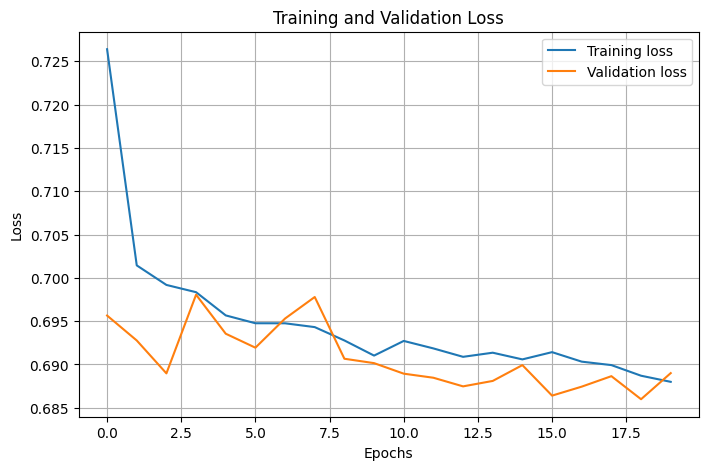

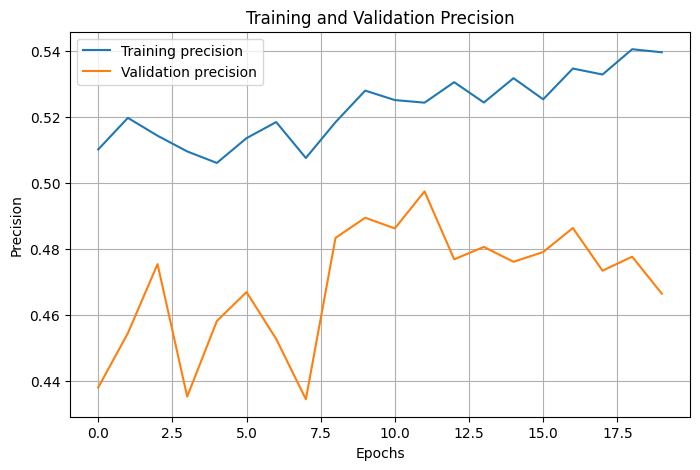

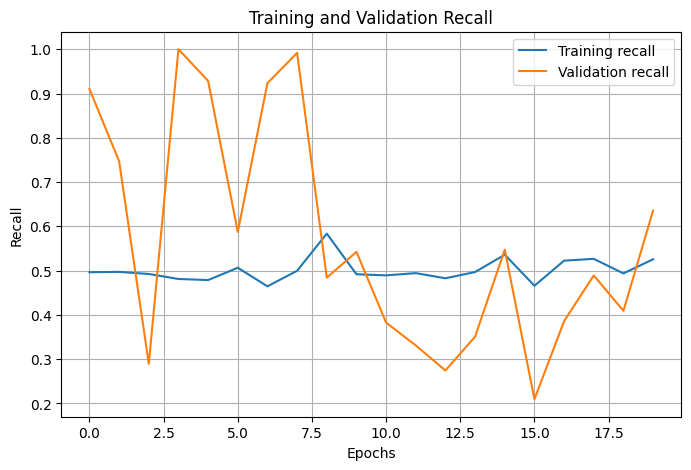

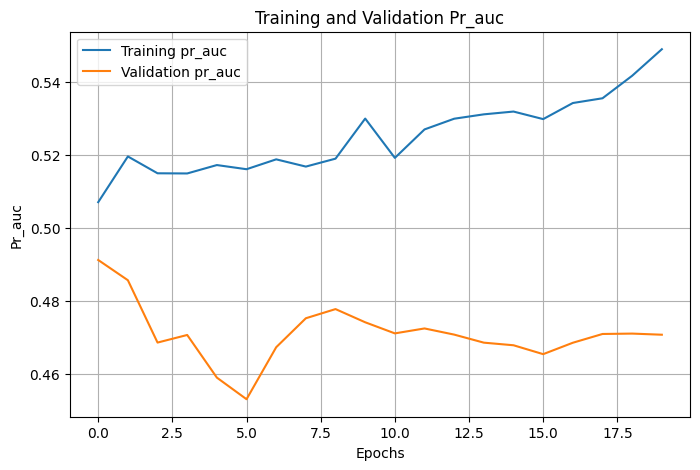

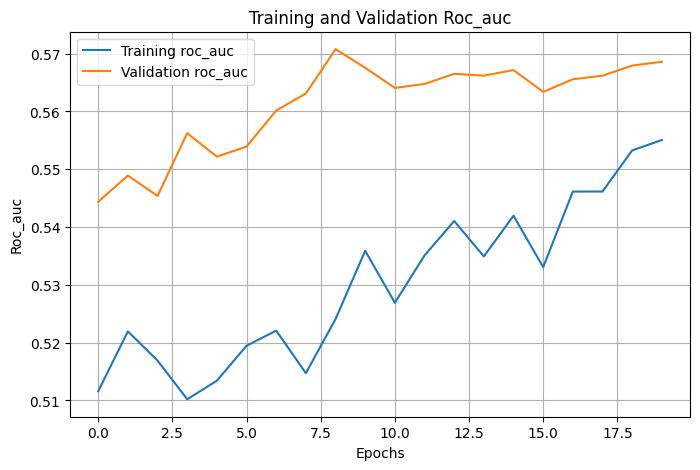

In [70]:
# Example usage:
plot_metric(history_simple_transformer, 'loss')
plot_metric(history_simple_transformer, 'precision')
plot_metric(history_simple_transformer, 'recall')
plot_metric(history_simple_transformer, 'pr_auc')
plot_metric(history_simple_transformer, 'roc_auc')


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


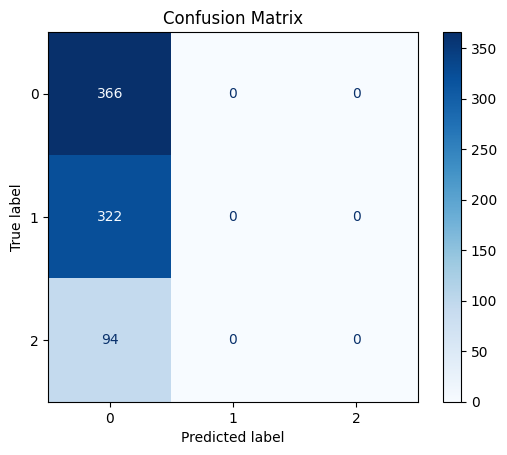

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict class labels
y_pred_probs = simple_transformer_model.predict(X_test_new)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_encoded_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [73]:
# --- Evaluate the Model ---
print("\nEvaluating model on test set:")
results = simple_transformer_model.evaluate(X_test_new, y_bin_test, batch_size=batch_size, verbose=1)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")


Evaluating model on test set:
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.0000e+00 - loss: 0.6841 - pr_auc: 0.4946 - precision: 0.5064 - recall: 0.4556 - roc_auc: 0.5852
Test Loss: 0.6842
Test Accuracy: 0.0000
Test Precision: 0.4966
Test Recall: 0.4379


## adding location and time information

In [75]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, BatchNormalization, LeakyReLU,
    Dropout, Add, Bidirectional, LSTM, GlobalAveragePooling1D,
    Attention, Dense, Concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# ========================
# --- Data Preparation ---
# ========================

# Assume merged_df and meteo_cols are defined.
# merged_df should have:
#   - meteo_cols: Your meteorological sequence data (each row: a list structure that you stack later)
#   - "lat" and "lon": Location features.
#   - "begin_datetime": A datetime string column (e.g., "2012-10-29 12:30:00").
#   - "event_type": A categorical event column.
#   - "extreme": A binary target indicating extreme events.

# Convert begin_datetime to datetime and extract time features
df['begin_datetime'] = pd.to_datetime(df['begin_date_time'])
df['hour'] = df['begin_datetime'].dt.hour
# Cyclical encoding for hour (24-hour periodicity)
df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)
df['dayofweek'] = df['begin_datetime'].dt.dayofweek  # 0=Mon, ... 6=Sun

# List of extra features (time & location)
extra_cols = ['sin_hour', 'cos_hour', 'dayofweek', 'begin_lat', 'begin_lon']
extra_data = df[extra_cols]

# --- Prepare Targets ---
# For the multi-class event type (if needed)
le = LabelEncoder()
y_encoded = le.fit_transform(df["event_type"].values)
num_classes = len(le.classes_)
y_cat = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

# For extreme event (binary target)
y_bin = df["extreme"].values

# --- Prepare Meteorological Sequence Data ---
# meteo_cols is assumed to be a list of column names in merged_df with your sequence information.
# Each row in merged_df[meteo_cols] is expected to be a list (or similar structure) that will later be stacked.
X_seq_raw = df[prev_cols]

# ----------------------
# --- Data Splitting ---
# ----------------------
# Split based on indices; here we use the extreme label for stratification.
X_seq_train, X_seq_test, y_train_cat, y_test_cat, y_train_bin, y_test_bin = train_test_split(
    X_seq_raw, y_cat, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)

X_seq_train, X_seq_val, y_train_bin, y_val_bin = train_test_split(
    X_seq_train, y_train_bin, test_size=0.2, random_state=42, stratify=y_train_bin
)

# Also split extra features using the same indices as for the sequence data
X_extra_train = extra_data.loc[X_seq_train.index].copy()
X_extra_test  = extra_data.loc[X_seq_test.index].copy()
X_extra_val   = extra_data.loc[X_seq_val.index].copy()

# ---------------------------------------------------
# --- Combine Sequence and Extra Data for Oversample ---
# ---------------------------------------------------
# To ensure that oversampling picks the same rows for both branches,
# combine them into one DataFrame. We assume here that X_seq_train contains
# each row as a list (e.g., stored as an object in the DataFrame), so we will not modify it.
# Instead, add the extra features as additional columns.
X_train_combined = X_seq_train.copy()
for col in extra_cols:
    X_train_combined[col] = X_extra_train[col].values

# Apply oversampling on the combined DataFrame based on y_train_bin.
oversample = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train_comb_res, y_train_bin_res = oversample.fit_resample(X_train_combined, y_train_bin)

print("Percentage of positive instances in training data: ", np.mean(y_train_bin_res))
print("Percentage of positive instances in test data: ", np.mean(y_test_bin))
print("Percentage of positive instances in validation data: ", np.mean(y_val_bin))
print("Class distribution after oversampling:", Counter(y_train_bin_res))

# ---------------------------------------------------
# --- Separate Combined Data Back into Two Parts ---
# ---------------------------------------------------
# For the sequence part, we retrieve the original meteo_cols that are stored as lists.
X_seq_train_res = X_train_comb_res[prev_cols]

# For the extra features, retrieve the extra_cols.
X_extra_train_res = X_train_comb_res[extra_cols]

# -----------------------------------------------
# --- Process Sequence Data (Stack & Scale) ---
# -----------------------------------------------
# Stack the sequence data: each element in X_seq_train_res is assumed to be a list.
X_train_seq_arr = np.stack(X_seq_train_res.values.tolist(), axis=0)
X_test_seq_arr = np.stack(X_seq_test[prev_cols].values.tolist(), axis=0)
X_val_seq_arr = np.stack(X_seq_val[prev_cols].values.tolist(), axis=0)

# For scaling, reshape so each timestep is treated independently.
train_shape = X_train_seq_arr.shape  # (samples, num_features, timesteps)
X_train_seq_flat = X_train_seq_arr.reshape(-1, train_shape[-1])
X_test_seq_flat = X_test_seq_arr.reshape(-1, X_test_seq_arr.shape[-1])
X_val_seq_flat = X_val_seq_arr.reshape(-1, X_val_seq_arr.shape[-1])

scaler_seq = StandardScaler()
X_train_seq_flat = scaler_seq.fit_transform(X_train_seq_flat)
X_test_seq_flat = scaler_seq.transform(X_test_seq_flat)
X_val_seq_flat = scaler_seq.transform(X_val_seq_flat)

# Reshape back to original structure and transpose to (samples, timesteps, features)
X_train_seq_arr = X_train_seq_flat.reshape(train_shape).transpose(0, 2, 1)
X_test_seq_arr = X_test_seq_flat.reshape(X_test_seq_arr.shape).transpose(0, 2, 1)
X_val_seq_arr = X_val_seq_flat.reshape(X_val_seq_arr.shape).transpose(0, 2, 1)

num_timesteps = X_train_seq_arr.shape[1]      # e.g., 72 timesteps
num_sequence_features = X_train_seq_arr.shape[2]  # e.g., 27 features

# -----------------------------------------
# --- Process Extra Features (Scale) ---
# -----------------------------------------
scaler_extra = StandardScaler()
X_train_extra_arr = scaler_extra.fit_transform(X_extra_train_res.values)
X_test_extra_arr  = scaler_extra.transform(X_extra_test.values)
X_val_extra_arr   = scaler_extra.transform(X_extra_val.values)
num_extra_features = X_train_extra_arr.shape[1]  # Should be 5 here

print("X_train_seq shape:", X_train_seq_arr.shape)
print("X_train_extra shape:", X_train_extra_arr.shape)
print("y_train_bin shape:", np.array(y_train_bin_res).shape)


Percentage of positive instances in training data:  0.5
Percentage of positive instances in test data:  0.435085497150095
Percentage of positive instances in validation data:  0.4346793349168646
Class distribution after oversampling: Counter({np.int64(0): 2855, np.int64(1): 2855})
X_train_seq shape: (5710, 72, 27)
X_train_extra shape: (5710, 5)
y_train_bin shape: (5710,)


In [76]:
def build_model_with_time():
    #  Sequence Input (meteorological time series)
    seq_input = Input(shape=(num_timesteps, num_sequence_features), name='timeseries_input')

    # --- CNN Feature Extraction for Sequence Data ---
    # Shared Conv Block 1
    conv1 = Conv1D(filters=64, kernel_size=3, padding='same')(seq_input)
    conv1 = BatchNormalization()(conv1)
    conv1 = LeakyReLU(negative_slope=0.01)(conv1)
    conv1 = MaxPooling1D(pool_size=2)(conv1)
    conv1 = Dropout(0.3)(conv1)

    # Shared Conv Block 2
    conv2 = Conv1D(filters=128, kernel_size=5, padding='same')(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = LeakyReLU(negative_slope=0.01)(conv2)
    conv2 = Dropout(0.3)(conv2)

    # Residual Connection from Conv Block 1
    shortcut = Conv1D(filters=128, kernel_size=1, padding='same')(conv1)
    shortcut = BatchNormalization()(shortcut)
    res = Add()([conv2, shortcut])

    # Shared Conv Block 3
    conv3 = Conv1D(filters=128, kernel_size=7, padding='same')(res)
    conv3 = BatchNormalization()(conv3)
    conv3 = LeakyReLU(negative_slope=0.01)(conv3)
    conv3 = Dropout(0.3)(conv3)

    # Shared LSTM Sequence Processing Block
    x = Bidirectional(LSTM(128, return_sequences=True))(conv3)
    x = Dropout(0.4)(x)
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Dropout(0.4)(x)

    # Shared Attention Mechanism
    attn_out = Attention()([x, x])
    shared_features = GlobalAveragePooling1D()(attn_out)

    # --- Extra Features Branch (Time & Location) ---
    extra_input = Input(shape=(num_extra_features,), name='extra_input')
    extra_branch = Dense(32, activation='relu')(extra_input)
    extra_branch = BatchNormalization()(extra_branch)
    extra_branch = Dropout(0.3)(extra_branch)

    # --- Concatenate Both Branches ---
    combined_features = Concatenate()([shared_features, extra_branch])

    # --- Classification Head for Extreme Event Classification ---
    extreme_branch = Dense(64)(combined_features)
    extreme_branch = BatchNormalization()(extreme_branch)
    extreme_branch = LeakyReLU(negative_slope=0.01)(extreme_branch)
    extreme_branch = Dropout(0.5)(extreme_branch)
    extreme_output = Dense(1, activation='sigmoid', name='extreme')(extreme_branch)

    # --- Create and Compile the Model ---
    model = Model(inputs=[seq_input, extra_input], outputs=extreme_output)
    optimizer = Adam(learning_rate=1e-4, clipnorm=1.0)
    model.compile(
        optimizer=optimizer,
        loss={'extreme': 'binary_crossentropy'},
        metrics={'extreme': [
            Accuracy(name='accuracy'),
            Precision(),
            Recall(),
            AUC(name='roc_auc'),
            AUC(curve='PR', name='pr_auc')
        ]}
    )
    model.summary()
    return model
    

In [77]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
time_info_model = build_model_with_time()
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train_bin_res),
    y=y_train_bin_res
)
class_weight_dict = dict(zip(np.unique(y_train_bin_res), class_weights))

# ------------------------
# --- Train the Model ---
# ------------------------
epochs = 20
batch_size = 32
history = time_info_model.fit(
    [X_train_seq_arr, X_train_extra_arr], y_train_bin_res,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=([X_val_seq_arr, X_val_extra_arr], y_val_bin),
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weight_dict,
    verbose=1
)


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ timeseries_input    │ (None, 72, 27)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 72, 64)    │      5,248 │ timeseries_input… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 64)    │        256 │ conv1d_24[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_15      │ (None, 72, 64)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 36, 64)    │          0 │ leaky_re_lu_15[0… │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_49          │ (None, 36, 64)    │          0 │ max_pooling1d_3[… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 36, 128)   │     41,088 │ dropout_49[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 128)   │        512 │ conv1d_25[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_16      │ (None, 36, 128)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_26 (Conv1D)  │ (None, 36, 128)   │      8,320 │ dropout_49[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_50          │ (None, 36, 128)   │          0 │ leaky_re_lu_16[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 128)   │        512 │ conv1d_26[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 36, 128)   │          0 │ dropout_50[0][0], │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_27 (Conv1D)  │ (None, 36, 128)   │    114,816 │ add_6[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 36, 128)   │        512 │ conv1d_27[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_17      │ (None, 36, 128)   │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_51          │ (None, 36, 128)   │          0 │ leaky_re_lu_17[0… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_6     │ (None, 36, 256)   │    263,168 │ dropout_51[0][0]  │
│ (Bidirectional)     │                   │            │                 

 Total params: 609,729 (2.33 MB)

 Trainable params: 608,641 (2.32 MB)

 Non-trainable params: 1,088 (4.25 KB)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 85ms/step - accuracy: 0.0000e+00 - loss: 0.8295 - pr_auc: 0.5150 - precision_1: 0.5128 - recall_1: 0.5375 - roc_auc: 0.5220 - val_accuracy: 0.0000e+00 - val_loss: 0.7095 - val_pr_auc: 0.4786 - val_precision_1: 0.5763 - val_recall_1: 0.0619 - val_roc_auc: 0.5455 - learning_rate: 1.0000e-04
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.0000e+00 - loss: 0.7716 - pr_auc: 0.5653 - precision_1: 0.5526 - recall_1: 0.5656 - roc_auc: 0.5741 - val_accuracy: 0.0000e+00 - val_loss: 0.6791 - val_pr_auc: 0.5393 - val_precision_1: 0.5804 - val_recall_1: 0.3024 - val_roc_auc: 0.6087 - learning_rate: 1.0000e-04
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 15s 86ms/step - accuracy: 0.0000e+00 - loss: 0.7441 - pr_auc: 0.5837 - precision_1: 0.5670 - recall_1: 0.5567 - roc_auc: 0.6001 - val_accuracy: 0.0000e+00 - val_loss: 0.6876 - val_pr_auc: 0.5981 - val_precision_1: 0.5111 - val_recall_1: 0.7960 - val_roc_auc: 0.6669 - learning_rate: 1.0000e-0

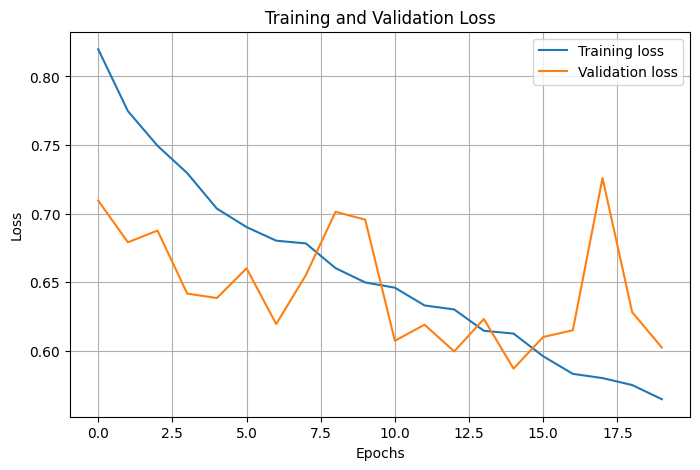

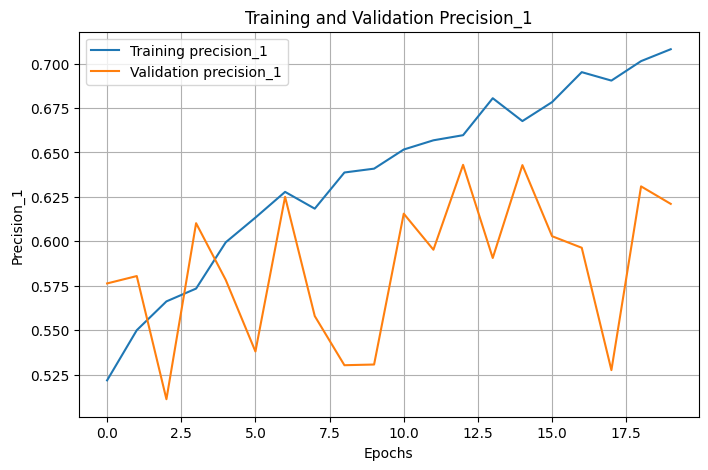

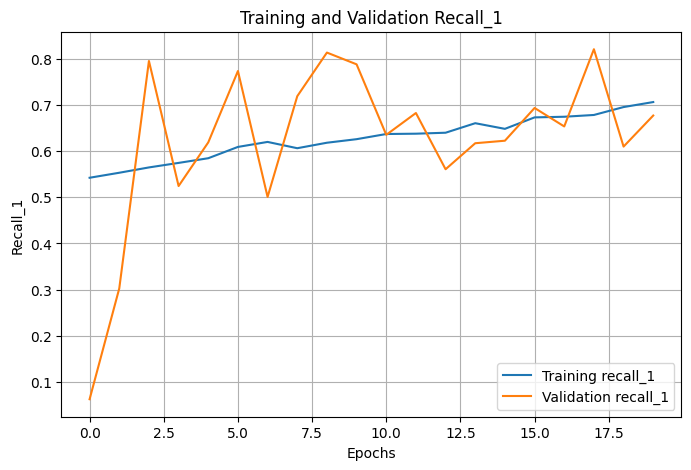

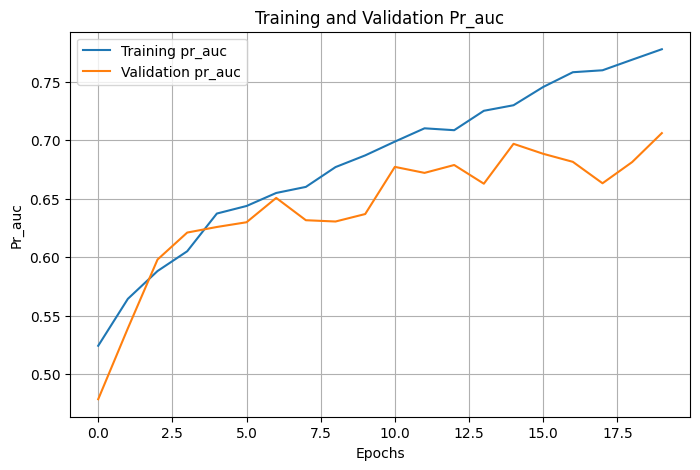

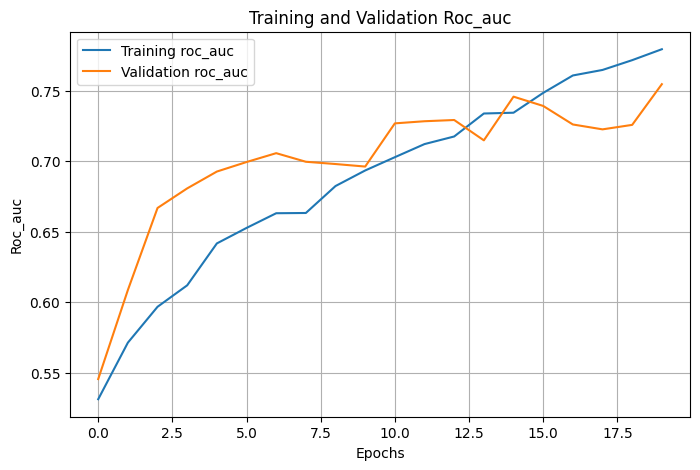

In [78]:
# Example usage:
plot_metric(history, 'loss')
plot_metric(history, 'precision_1')
plot_metric(history, 'recall_1')
plot_metric(history, 'pr_auc')
plot_metric(history, 'roc_auc')


50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
Test Accuracy: 0.4345
Test Precision: 0.4347
Test Recall: 0.9985
Test F1-Score: 0.6057
Test ROC AUC: 0.6448


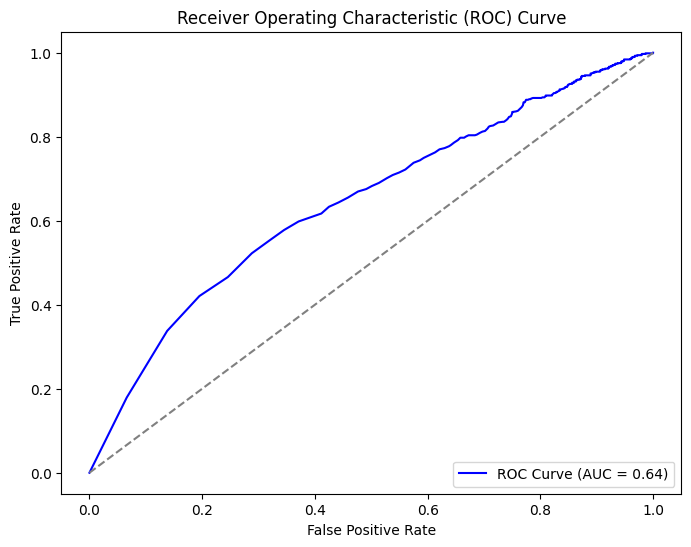

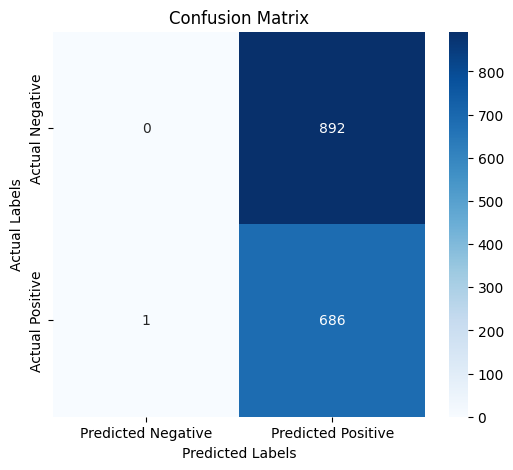

In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score,
                             roc_curve, confusion_matrix, accuracy_score)
from sklearn.preprocessing import LabelBinarizer

# Assuming 'model' is your trained model and 'X_test', 'y_test' are your test data and labels

# 1. Obtain predicted probabilities for the positive class
y_probs = time_info_model.predict([X_test_seq_arr, X_extra_test]).flatten() # Adjust indexing if your model has multiple outputs

# 2. Binarize the true labels if they are not already in binary forma

# 3. Compute evaluation metrics
y_pred = (y_probs > 0.5).astype(int)
precision = precision_score(y_test_bin, y_pred)
recall = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)
roc_auc = roc_auc_score(y_test_bin, y_probs)
accuracy = accuracy_score(y_test_bin, y_pred)

# 4. Display the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")

# 5. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_probs)

# 6. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 7. Compute confusion matrix
cm = confusion_matrix(y_test_bin, y_pred)

# 8. Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


## Trying deep learning model with image data

In [80]:
df["filenames"] =  df["filenames"].apply(lambda x: [f for f in x if "MODIS_Terra_CorrectedReflectance_TrueColor" in f])

In [85]:
import ast
import tensorflow as tf
import pandas as pd


# Base directory where your images are stored
# base_image_path = [r"C:\Personal\Capstone\satellite_images\\", r"C:\Personal\Capstone project\Capstone project\satellite_images\satellite_images\\"]
base_image_path = [r"C:\Personal\Capstone project\Capstone project\satellite_images\\satellite_images\\",r"C:\Personal\Capstone\satellite_images\\"]

# Function to convert the string representation to a Python list of filenames.
def parse_filenames(filenames_str):
    # Safely evaluate the string to get the list.
    return filenames_str

# Function to load and preprocess a single image.
def load_and_preprocess_image(filename, folder_paths, image_size=(128, 128)):
    # Read the image from disk.
    for path in folder_paths:
        try:
            final_path = path + filename
            # print(final_path)
            image = tf.io.read_file(final_path)

            # Decode PNG (or use tf.image.decode_jpeg for jpg).
            image = tf.image.decode_png(image, channels=3)
            # Convert image to floats in range [0, 1].
            image = tf.image.convert_image_dtype(image, tf.float32)
            # Resize the image to the desired dimensions.
            image = tf.image.resize(image, image_size)
            return image
        except Exception as e:
            # print(f"Error loading image {filename} from {path}: {e}")
            continue
    # Function to load all images from the list of filenames and stack them.
def load_images_from_list(filenames_str, base_path=base_image_path, image_size=(128, 128)):
    # Convert string list into actual list of filenames.
    filenames = parse_filenames(filenames_str)
    # Construct full paths and load each image.
    images = []
    for fname in filenames:
    
        img = load_and_preprocess_image(fname, base_path, image_size)
        images.append(img)
    # Stack into a single tensor with shape (num_images, height, width, channels)
    # print(images)
    images_tensor = tf.stack(images)
    return images_tensor

# Test the image loading function on the first row.
example_filenames_str = merged_df["filenames"].iloc[0]
images_tensor = load_images_from_list(example_filenames_str)
print("Shape of loaded images tensor:", images_tensor.shape)



Shape of loaded images tensor: (9, 128, 128, 3)


In [86]:
from tqdm import tqdm
tqdm.pandas(desc="Loading images")
df["images_loaded"] = df["filenames"].progress_apply(load_images_from_list)

Loading images: 100%|██████████| 7893/7893 [05:26<00:00, 24.16it/s]


In [93]:
# Basic data manipulation libraries
import numpy as np
import pandas as pd
import ast
import math
from tqdm import tqdm

# Scikit-learn utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification
from collections import Counter

# Imbalanced learning tools
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Input, Conv1D, Conv2D, BatchNormalization, 
    MaxPooling1D, MaxPooling2D, Dropout, Add,
    LSTM, Bidirectional, Attention, TimeDistributed,
    LeakyReLU, Activation, Dense,
    GlobalAveragePooling1D, GlobalAveragePooling2D,
    concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall, AUC

def model_with_image_data_build():
        # ---------------------------
    # Weather Data Branch (Simplified)
    # ---------------------------
    weather_input = Input(shape=(72, 27), name='weather_input')

    # Single Conv Block with moderate complexity
    w = Conv1D(filters=64, kernel_size=5, padding='same')(weather_input)
    w = BatchNormalization()(w)
    w = LeakyReLU(alpha=0.01)(w)
    w = MaxPooling1D(pool_size=2)(w)
    w = Dropout(0.3)(w)

    # Single Bidirectional LSTM layer with attention
    w = Bidirectional(LSTM(64, return_sequences=True))(w)
    w = Dropout(0.3)(w)
    weather_features = GlobalAveragePooling1D()(w)

    # ---------------------------
    # Image Data Branch (Simplified)
    # ---------------------------
    image_input = Input(shape=(3, 128, 128, 3), name='image_input')

    # Simplified CNN with fewer layers
    i = TimeDistributed(Conv2D(32, kernel_size=(3, 3), padding='same'))(image_input)
    i = TimeDistributed(BatchNormalization())(i)
    i = TimeDistributed(LeakyReLU(alpha=0.01))(i)
    i = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(i)
    i = TimeDistributed(Dropout(0.3))(i)

    i = TimeDistributed(Conv2D(64, kernel_size=(3, 3), padding='same'))(i)
    i = TimeDistributed(BatchNormalization())(i)
    i = TimeDistributed(LeakyReLU(alpha=0.01))(i)
    i = TimeDistributed(MaxPooling2D(pool_size=(2, 2)))(i)
    i = TimeDistributed(Dropout(0.3))(i)

    # Global pooling to reduce each image to a feature vector
    i = TimeDistributed(GlobalAveragePooling2D())(i)

    # Single LSTM instead of two
    i = Bidirectional(LSTM(64, return_sequences=False))(i)
    i = Dropout(0.3)(i)
    img_features = Dense(64)(i)
    i = BatchNormalization()(img_features)

    # ---------------------------
    # Merge Branches and Classification Head (Simplified)
    # ---------------------------
    combined_features = concatenate([weather_features, img_features])

    # Simple classification head
    x = Dense(32)(combined_features)
    x = BatchNormalization()(x)
    x = LeakyReLU(alpha=0.01)(x)
    x = Dropout(0.4)(x)
    extreme_output = Dense(1, activation='sigmoid', name='extreme')(x)

    # Define and compile the model
    model = Model(inputs=[weather_input, image_input], outputs=extreme_output)
    optimizer = Adam(learning_rate=1e-4)
    model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy', Precision(), Recall(), AUC(name='roc_auc')])
    return model

In [95]:
X_full = df.copy()
X_train = X_full.loc[X_train.index]
X_val   = X_full.loc[X_val.index]
X_test  = X_full.loc[X_test.index]


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, MaxPooling1D, Dropout,
                                     LSTM, Dense, Input)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall, AUC
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, Model # Import Model for Functional API
from tensorflow.keras.layers import (
    Input, Conv1D, MaxPooling1D, BatchNormalization, Activation,
    LSTM, Bidirectional, Dropout, Dense, LeakyReLU
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
# Import relevant metrics for classification, especially if data is imbalanced
from tensorflow.keras.metrics import Precision, Recall, AUC
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# Apply the oversampling to the dataset
X_images = X_train["images_loaded"].values
X_test_images = X_test["images_loaded"].values
X_validation_images = X_val["images_loaded"].values


X_train = np.stack(X_train[prev_cols].values.tolist(), axis=0)
X_test = np.stack(X_test[prev_cols].values.tolist(), axis=0)
X_validation = np.stack(X_val[prev_cols].values.tolist(), axis=0)
# Initialize the RandomOverSampler

print("peecentage of positice instance in training data: ", sum(y_train_bin)/len(y_train_bin))
print("percentage of positice instance in test data: ", sum(y_test_bin)/len(y_test_bin))
print("percentage of positice instance in validation data: ", sum(y_val)/len(y_val))

print("y resampled shape:", y_train_bin.shape)
# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_bin))
# Scale the y_train_bin
scaler = StandardScaler()

# Reshape for scaling: combine timesteps and features
X_train = X_train.reshape(-1, X_train.shape[-1])
X_test = X_test.reshape(-1, X_test.shape[-1])
X_validation = X_validation.reshape(-1, X_validation.shape[-1])
# Fit and transform
print("X resampled shape before scaling:", X_train.shape)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)
# Reshape back to original structure: (samples, num_features, num_timesteps)
# Note: Here we assume the original shape was (samples, num_features, num_timesteps).
# Adjust reshaping if your data dimensions differ.
X_train = X_train.reshape(-1, 27, 72)
X_test = X_test.reshape(-1, 27, 72)
X_validation = X_validation.reshape(-1, 27, 72)
# Print shapes to verify correctness (should print something like (samples, 27, 72) and (samples, num_classes))
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train_bin.shape)

# --- Reshape Input for Model ---
# Rearranging shape to (samples, timesteps, features), here timesteps=72 and features=27.
X_train = X_train.transpose(0, 2, 1)
X_test  = X_test.transpose(0, 2, 1)
X_validation = X_validation.transpose(0, 2, 1)
num_timesteps = X_train.shape[1]  # should be 72
num_features  = X_train.shape[2]  # should be 27
input_layer = Input(shape=(num_timesteps, num_features))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [90]:
import tensorflow as tf
import numpy as np

# Assuming these variables are already defined from your preprocessing:
# X_train        : numpy array of weather data, shape (num_samples, 72, 27) [or (num_samples, timesteps, features)]
# X_validation   : same for validation weather data
# y_train_bin    : binary labels for training, shape (num_samples,)
# y_validation_bin: binary labels for validation
# X_images       : a list or 1D numpy array of image tensors (each of shape (3, 224, 224, 3)) for the training set
# X_validation_images: same for validation set
def is_valid_batch(weather, images, labels):
    # Check shapes of weather data
    weather_shape = tf.shape(weather)
    valid_weather = tf.reduce_all(tf.equal(weather_shape[1:], [72, 27]))

    # Check shapes of image data
    images_shape = tf.shape(images)
    valid_images = tf.reduce_all(tf.equal(images_shape[1:], [3, 128, 128, 3]))

    # Check shapes of labels
    labels_shape = tf.shape(labels)
    valid_labels = tf.equal(tf.rank(labels), 1)  # Assuming labels are 1D

    return tf.logical_and(tf.logical_and(valid_weather, valid_images), valid_labels)

batch_size = 16

def image_generator_fn(images_list):
    for img in images_list:

        if img.shape == (3, 128, 128, 3):
            yield img
        else:
            print("jhe")
            continue  # Skip images with incorrect shape


# Use tf.data.Dataset.from_generator for training images.
ds_images_train = tf.data.Dataset.from_generator(
    lambda: image_generator_fn(X_images),
    output_types=tf.float32,
    output_shapes=(3, 128, 128, 3)
)

ds_images_val = tf.data.Dataset.from_generator(
    lambda: image_generator_fn(X_validation_images),
    output_types=tf.float32,
    output_shapes=(3, 128, 128, 3)
)

ds_images_test = tf.data.Dataset.from_generator(
    lambda: image_generator_fn(X_test_images),
    output_types=tf.float32,
    output_shapes=(3, 128, 128, 3)
)

# Create a dataset for the weather input
ds_weather_train = tf.data.Dataset.from_tensor_slices(X_train)  # shape: (num_samples, 72, 27)
ds_weather_val   = tf.data.Dataset.from_tensor_slices(X_validation)
df_weather_test = tf.data.Dataset.from_tensor_slices(X_test)

# Create a dataset for the labels
ds_labels_train = tf.data.Dataset.from_tensor_slices(y_train)
ds_labels_val   = tf.data.Dataset.from_tensor_slices(y_val)
ds_labels_test  = tf.data.Dataset.from_tensor_slices(y_test)

# Zip the weather data, image data, and labels together.
# The model expects inputs as a tuple: ([weather_input, image_input], label)
ds_train = tf.data.Dataset.zip(((ds_weather_train, ds_images_train), ds_labels_train))
ds_train = ds_train.batch(batch_size)

# Apply the filter
ds_train = ds_train.filter(lambda inputs, labels: is_valid_batch(inputs[0], inputs[1], labels))

# Prefetch for performance
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)
ds_val   = tf.data.Dataset.zip(((ds_weather_val, ds_images_val), ds_labels_val))
ds_val = ds_val.batch(batch_size)

# Apply the filter
ds_val = ds_val.filter(lambda inputs, labels: is_valid_batch(inputs[0], inputs[1], labels))

# Prefetch for performance
ds_val = ds_val.prefetch(tf.data.AUTOTUNE)
ds_test = tf.data.Dataset.zip(((df_weather_test, ds_images_test), ds_labels_test))
# Batch and prefetch for performance

ds_test = ds_test.batch(batch_size)

# Apply the filter
ds_test = ds_test.filter(lambda inputs, labels: is_valid_batch(inputs[0], inputs[1], labels))

# Prefetch for performance
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


In [91]:
import math

num_samples = len(X_train)  # Replace with the actual number of training samples
batch_size = 16  # Replace with your batch size

steps_per_epoch = math.ceil(num_samples / batch_size)

In [98]:
# --- Callbacks ---
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


# --- Train the Model ---
epochs = 20
batch_size = 32


image_model = model_with_image_data_build()
# Now, train your model using the datasets:
history_1 = image_model.fit(
    ds_train,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=ds_val,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/10
 23/356 ━━━━━━━━━━━━━━━━━━━━ 7:03 1s/step - accuracy: 0.4690 - loss: 0.7736 - precision_4: 0.3429 - recall_4: 0.2938 - roc_auc: 0.4908

KeyboardInterrupt: 

2025-04-24 15:21:31,400 - WARNING - 6 out of the last 10 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000015E41D0F520> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 760ms/step
Test Accuracy: 0.6667
Test Precision: 0.8000
Test Recall: 0.4444
Test F1-Score: 0.5714
Test ROC AUC: 0.8519


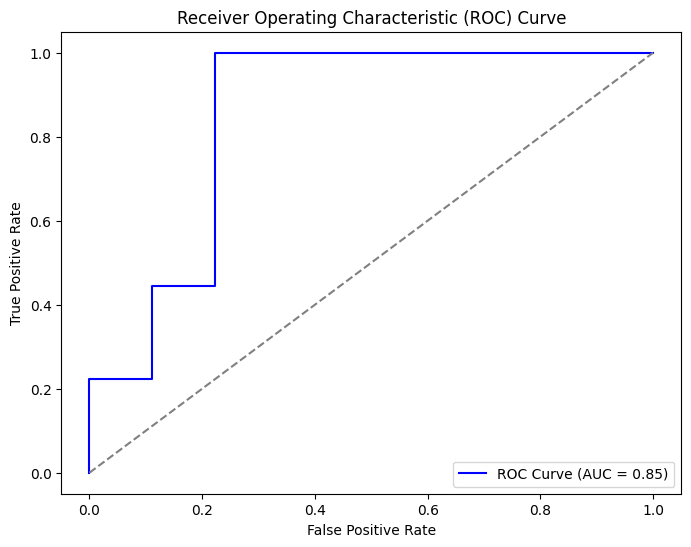

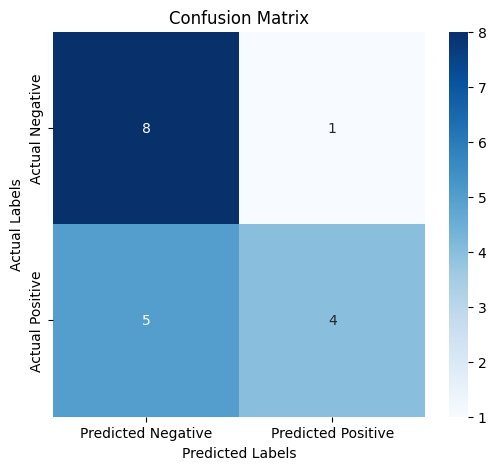

In [116]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (precision_score, recall_score, f1_score, roc_auc_score,
                             roc_curve, confusion_matrix, accuracy_score)
from sklearn.preprocessing import LabelBinarizer

# Assuming 'model' is your trained model and 'X_test', 'y_test' are your test data and labels

# 1. Obtain predicted probabilities for the positive class
y_probs = image_model.predict(ds_test).flatten() # Adjust indexing if your model has multiple outputs

# 2. Binarize the true labels if they are not already in binary forma

# 3. Compute evaluation metrics
y_pred = (y_probs > 0.5).astype(int)
precision = precision_score(y_test_bin, y_pred)
recall = recall_score(y_test_bin, y_pred)
f1 = f1_score(y_test_bin, y_pred)
roc_auc = roc_auc_score(y_test_bin, y_probs)
accuracy = accuracy_score(y_test_bin, y_pred)

# 4. Display the metrics
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1-Score: {f1:.4f}")
print(f"Test ROC AUC: {roc_auc:.4f}")

# 5. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_probs)

# 6. Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 7. Compute confusion matrix
cm = confusion_matrix(y_test_bin, y_pred)

# 8. Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


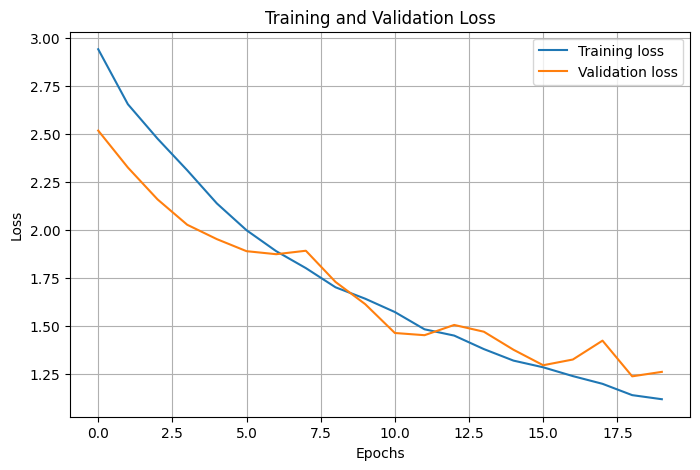

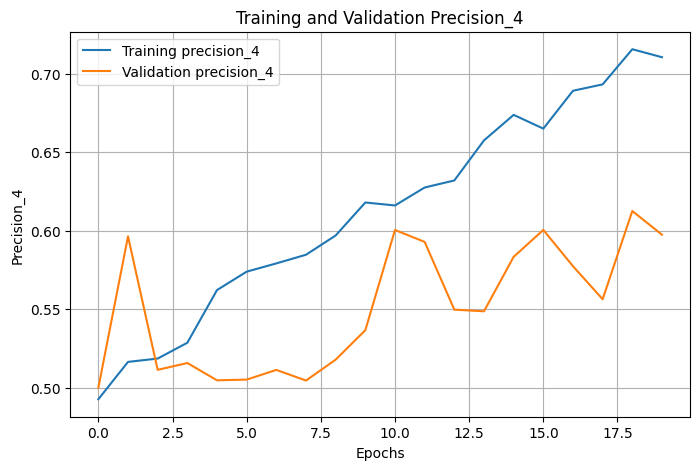

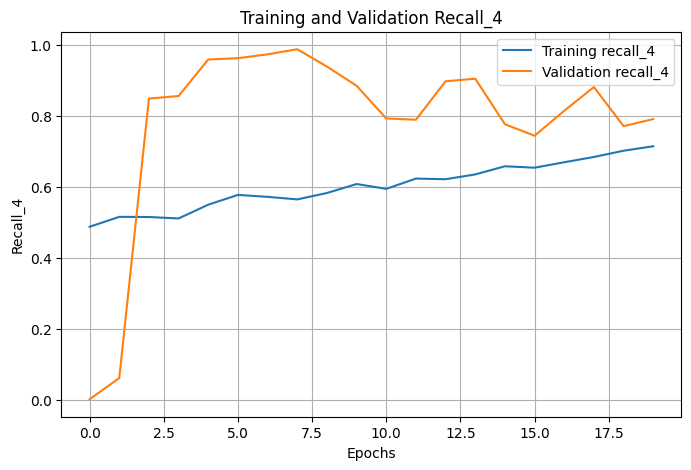

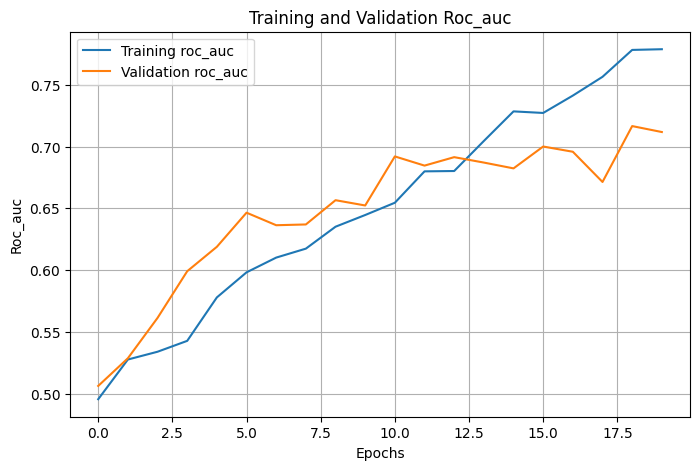

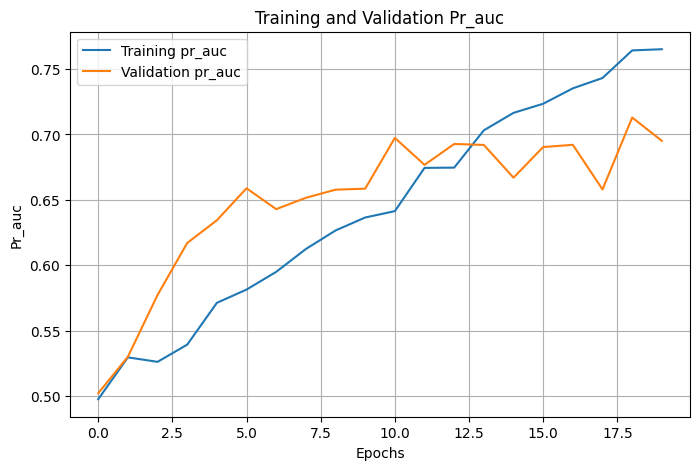

In [23]:
import pickle
# for model with 1.1 millin para
with open(r"C:\Personal\Capstone final\Thirsd_model_history.pkl", "rb") as f:
    history = pickle.load(f)
import matplotlib.pyplot as plt

def plot_metric(history, metric):
    plt.figure(figsize=(8, 5))
    plt.plot(history[metric], label=f'Training {metric}')
    plt.plot(history[f'val_{metric}'], label=f'Validation {metric}')
    plt.title(f'Training and Validation {metric.capitalize()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
plot_metric(history, 'loss')
plot_metric(history, 'precision_4')
plot_metric(history, 'recall_4')
plot_metric(history, 'roc_auc')
plot_metric(history, 'pr_auc')


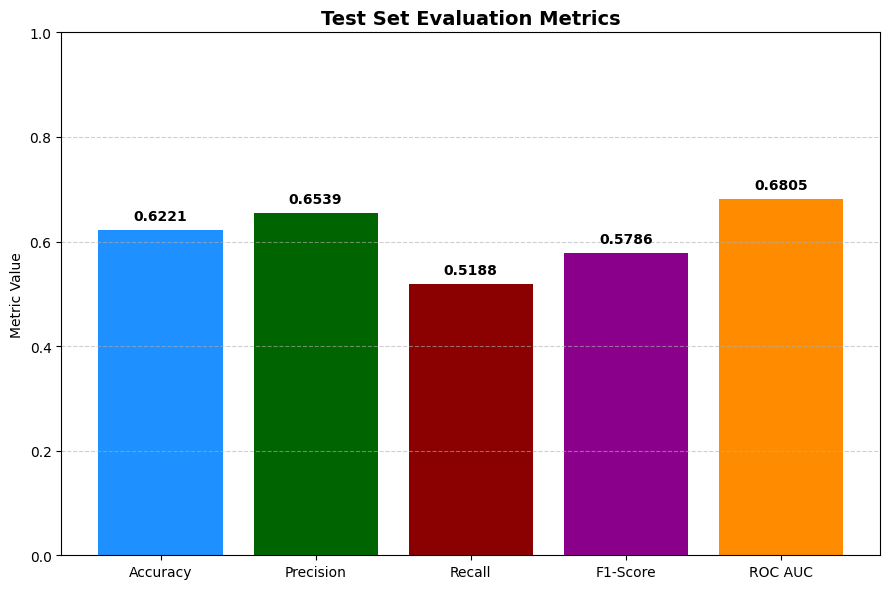

In [18]:
# Latest test evaluation metrics
metrics_v3 = {
    "Accuracy": 0.6221,
    "Precision": 0.6539,
    "Recall": 0.5188,
    "F1-Score": 0.5786,
    "ROC AUC": 0.6805
}

# Define dark colors for the bars
colors_v3 = ["#1E90FF", "#006400", "#8B0000", "#8B008B", "#FF8C00"]  # blue, dark green, dark red, dark magenta, dark orange

# Create the bar chart
plt.figure(figsize=(9, 6))
bars_v3 = plt.bar(metrics_v3.keys(), metrics_v3.values(), color=colors_v3)

# Add metric values on top of the bars
for bar in bars_v3:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add titles and labels
plt.title("Test Set Evaluation Metrics", fontsize=14, fontweight='bold')
plt.ylabel("Metric Value")
plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Same model with additional time and location information

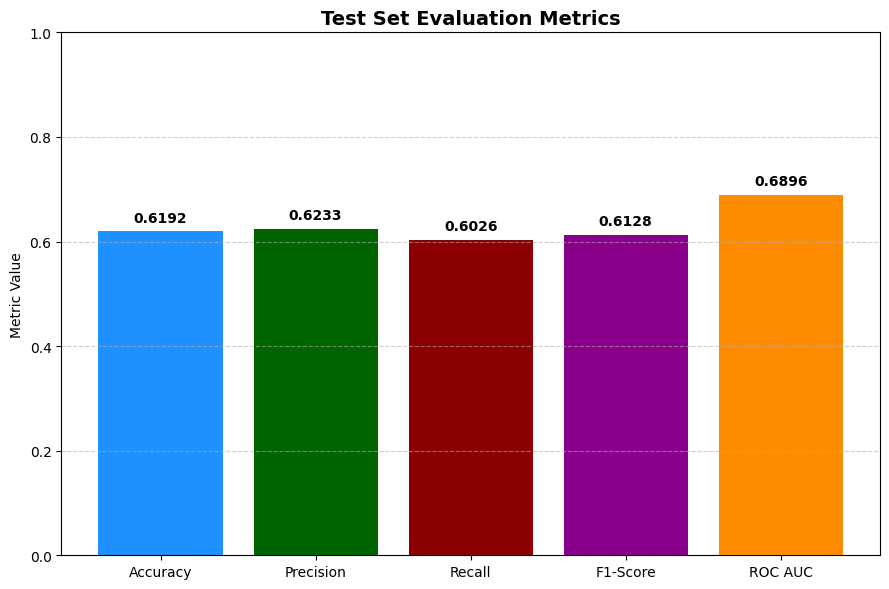

In [19]:
# Another set of evaluation metrics
metrics_v4 = {
    "Accuracy": 0.6192,
    "Precision": 0.6233,
    "Recall": 0.6026,
    "F1-Score": 0.6128,
    "ROC AUC": 0.6896
}

# Define dark colors again for consistency
colors_v4 = ["#1E90FF", "#006400", "#8B0000", "#8B008B", "#FF8C00"]

# Create the bar chart
plt.figure(figsize=(9, 6))
bars_v4 = plt.bar(metrics_v4.keys(), metrics_v4.values(), color=colors_v4)

# Add metric values on top of the bars
for bar in bars_v4:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add titles and labels
plt.title("Test Set Evaluation Metrics", fontsize=14, fontweight='bold')
plt.ylabel("Metric Value")
plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## model with temporal attention

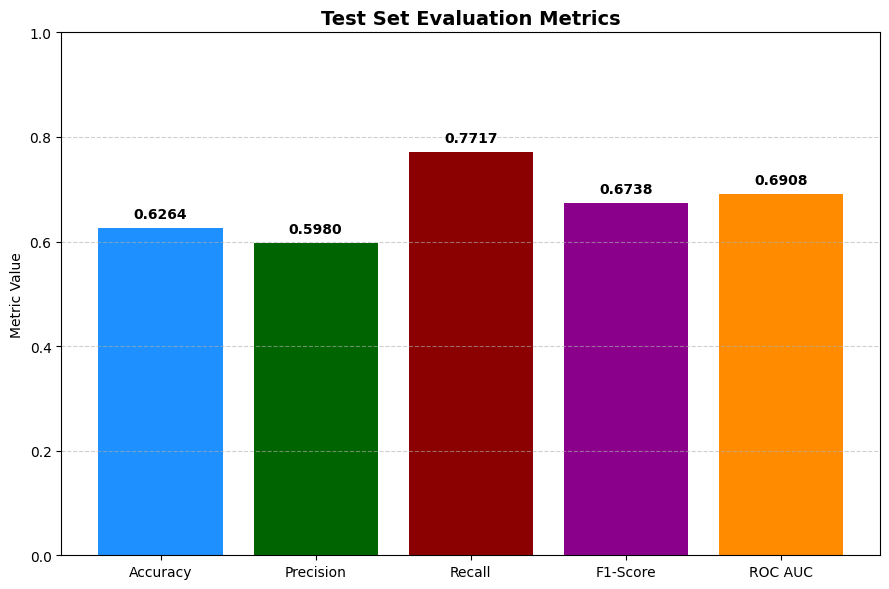

In [20]:
# Latest evaluation metrics
metrics_v5 = {
    "Accuracy": 0.6264,
    "Precision": 0.5980,
    "Recall": 0.7717,
    "F1-Score": 0.6738,
    "ROC AUC": 0.6908
}

# Consistent dark color palette
colors_v5 = ["#1E90FF", "#006400", "#8B0000", "#8B008B", "#FF8C00"]

# Create the bar chart
plt.figure(figsize=(9, 6))
bars_v5 = plt.bar(metrics_v5.keys(), metrics_v5.values(), color=colors_v5)

# Add metric values on top of the bars
for bar in bars_v5:
    height = bar.get_height()
    plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add titles and labels
plt.title("Test Set Evaluation Metrics", fontsize=14, fontweight='bold')
plt.ylabel("Metric Value")
plt.ylim(0, 1)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
